# Import

In [1]:
import numpy as np
import scipy.integrate as integ
import scipy.interpolate as i2
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
from astropy import units as u
from astropy import constants as c

from shooting import *
import shootingres as shr
import shooting as sho

import scipy.optimize as o
try:
    import cPickle as pickle
except ImportError:
    import pickle
    
import seaborn as sns
sns.set_theme()
sns.set_style("white")
sns.set_style("ticks")
sns.set_style("ticks",{'axes.grid' : True})
sns.set_palette("colorblind")

import seaborn as sns
sns.set_theme()
sns.set_style("white")
sns.set_style("ticks")
sns.set_style("ticks",{'axes.grid' : True})
import scienceplots
plt.style.use('science')

f = 16
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from matplotlib.patches import Rectangle

# plt.rcParams.update({
#     "font.family": "serif",   # specify font family here
#     "font.serif": ["Times"],  # specify font here
#     "font.size":11})          # specify font size here


In [3]:
## SET CONSTANTS
rho = (1.0*10**19) * (2.0*1.6725*10**(-27))
mu_0 = 1.2566*10**(-6)

# Define Normalizations
r1 = 0.1

## Define OMEGA0:
bb = 10000
v0 = bb/np.sqrt(r1)
Omega0 = v0/r1

In [4]:
r1 = 0.1
r2 = 5
reso = 500
r = np.arange(1, 5, 24/reso)
q_mag = 1
guess = 0.39760350887860546+0.02203028300281025j
VA_N = 0.578*8/10
# VA_N = 0.30848

B0 = 0
Bz = VA_N*r1*Omega0*np.sqrt(rho*mu_0)*10000
# VA_N = 30/(r1*Omega0*np.sqrt(rho*mu_0)*10000)
print(VA_N)
print(Bz)
kn = 1
m = 1
k = kn*np.pi/(4)

## NOTE VA_N ~ 30G
# Define Normalizations
r1 = 0.1



0.4624
29.978811690584404


In [5]:
## GET ETA ARR
elecd_init_o = [1]
# elecd_init_o = [0]

elecd_init_c = [-2, -1, 0, 1]

# elecd_arr = [1E-6, 1E-5, 1E-4, 1E-3]
elecd_arr = [1E-6, 1E-5, 1E-4, 1E-3]
# elecd_arr = []
multip_arr = []

# discret = int(8) 
# for j in range(0, discret):
#     multip_arr.append((j+1)*10/(discret))

multip_arr = [0,1,2,3,4,5,6,7,8,9]

# print(multip_arr)

# for j in range(0, len(elecd_init_c)):
#     for k in range(0, len(multip_arr)):
#         elecd_arr.append(np.round(multip_arr[k]*10**(elecd_init_c[j]), np.abs(elecd_init_c[j])+1))
        
for j in range(0, len(elecd_init_c)):
    iter = 2
    for k in range(0, 9*int(iter)):
        elecd_arr.append(np.round((k/iter+1)*10**(elecd_init_c[j]), np.abs(elecd_init_c[j])+1))

for j in range(0, len(elecd_init_o)):
    iter = 10
    for k in range(0, 9*int(iter)):
        elecd_arr.append(np.round((k/iter+1)*10**(elecd_init_o[j]), np.abs(elecd_init_o[j])+1))

elecd_arr.append(100)



# elecd_arr.remove(np.round(int((1))*10**(-elecd_init_o[0]), elecd_init_o[0]))
print(elecd_arr)


[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.09, 0.095, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0, 75.0, 80.0, 85.0, 90.0, 95.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100]


# Load Vertical Data from NIMROD

In [7]:
# Define Normalizations
r1 = 0.1

## Define OMEGA0:
bb = 10000
v0 = bb/np.sqrt(r1)
Omega0 = v0/r1
print(Omega0)
Bz_Arr = [0.01, 0.1, 1, 3, 5, 7, 9, 10, 20, 30, 40, 50]
Bz_Arr_ETA1 = np.array([0.01, 0.1, 1, 3, 5, 7, 9, 10, 20, 22.7, 25.9, 29.2, 30, 40, 50])

Bz_Arr = np.array(Bz_Arr)
r1 = 0.1
# VA_N_Arr = Bz_Arr/10000*r1*Omega0*np.sqrt(rho*mu_0)*10000
VA_N_Arr = Bz_Arr/10000/ np.sqrt(rho*mu_0)/(r1*Omega0)
VA_N_Arr_ETA1 = Bz_Arr_ETA1/10000/ np.sqrt(rho*mu_0)/(r1*Omega0)
# ETA1_arr = [0, 0, 60737.1, 123264, 115397, 101490, 86709.4, 9170.94, 5569.73, 7312.22, 3575.72, 0]
ETA1_arr = [0, 0, 61374.1, 123447, 115944, 101557, 86771.1, 77457.9, 8421.93, 7864.75, 7320.51, 6861.44, 6779.8, 3513.54, 0]
ETA1_arr = ETA1_arr / Omega0
ETA1_arr_k = [-2, -2, -1, -1, -1, -1, -1, 1, 1, 1, 1, -2]

ETA2_arr = [0, 0, 0, 99429, 104770, 94306.9, 82071.6, 74827, 8228.16, 6838.73, 2633.52,  0]
ETA2_arr = ETA2_arr / Omega0
ETA2_arr_k = [-2, -2, -2, -1, -1, -1, -1, -1, -1, 1, 1,-2 ]
print(len(ETA2_arr))
print(len(ETA2_arr_k))

ETA5_arr = [0, 0, 0, 57200, 77586.7, 77961.8, 69330.6, 65925.8, 7614.48, 6707.13, 2270.83, 0]
ETA5_arr_k = [-2, -2, -2, -1, -1,-1, -1, -1,1, 1, 1,-2]
# ETA5_arr_kn = [-2, -2, -2, 11, 10, 7, 5,5,0,0,0,0]
# print(len(ETA5_arr))
# print(len(ETA5_arr_k))

ETA5_arr = ETA5_arr / Omega0
Bz_ETA10 = [1,3,5,7,9,10,15,20,25,30,35,40,50]
ETA10_arr = [0, 3442.75, 49415.3, 57168.2, 55887.2, 52497.7, 35773, 7094.5, 6426.95, 6267.11, 4076.52,401.801, 0]
# ETA10_arr_k = [-2, -2, -2, -2, -2, 1, 1, 1, 1, -2, -2,-2]
ETA10_arr = ETA10_arr / Omega0

ETA50_arr = [0, 0, 0, 0, 0, 1985.3, 3029.63, 3297.49, 2740.41, 0, 0,0]
ETA50_arr_k = [-2, -2, -2, -2, -2, 1, 1, 1, 1, -2, -2,-2]
ETA50_arr = ETA50_arr / Omega0

ETA100_arr = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0]


ETA_tot = [[ETA1_arr, ETA1_arr_k], [ETA2_arr, ETA2_arr_k], [ETA5_arr, ETA5_arr_k], [ETA50_arr, ETA50_arr_k]]

MRI_arr = []
MRI_arr_Bz = []
k1_arr = []
k1_arr_Bz = []
Stable_Arr = []
Stable_Arr_Bz = []
for j in range(0, len(ETA_tot)):
    # print(len(ETA_tot[j][1]))
    for k in range(0, len(ETA_tot[j][1])):
        if(ETA_tot[j][1][k] == 1):
            k1_arr.append(ETA_tot[j][0][k])
            k1_arr_Bz.append(VA_N_Arr[k])
        if(ETA_tot[j][1][k] == -1):
            MRI_arr.append(ETA_tot[j][0][k])
            MRI_arr_Bz.append(VA_N_Arr[k])
        if(ETA_tot[j][1][k] == -2):
            Stable_Arr.append(ETA_tot[j][0][k])
            Stable_Arr_Bz.append(VA_N_Arr[k])                
## -2 = stable, -1 = MRI
# print(MRI_arr_Bz)
            
print(VA_N_Arr)

print(ETA5_arr)

316227.7660168379
12
12
[1.54242271e-04 1.54242271e-03 1.54242271e-02 4.62726813e-02
 7.71211355e-02 1.07969590e-01 1.38818044e-01 1.54242271e-01
 3.08484542e-01 4.62726813e-01 6.16969084e-01 7.71211355e-01]
[0.         0.         0.         0.18088228 0.24535069 0.24653686
 0.21924261 0.20847568 0.0240791  0.02120981 0.00718099 0.        ]


In [8]:
print(ETA50_arr)

[0.         0.         0.         0.         0.         0.00627807
 0.00958053 0.01042758 0.00866594 0.         0.         0.        ]


# LOAD Vertical Data from Shooting

MCI 1k1

In [9]:
elecd_str = '0'


guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesu_' + elecd_str + '-Bz.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesd_' + elecd_str + '-Bz.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANUP_' + elecd_str + '-Bz.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANDOWN_' + elecd_str + '-Bz.pkl'

with open(guesses_str_d, 'rb') as f:
    guesses_1k1_MCI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_1k1_MCI_h = pickle.load(f)    

with open(VA_d, 'rb') as f:
    VA_l_MCI1_Bz = pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MCI1_Bz = pickle.load(f)   
    
VA_l_cut = []
VA_h_cut = []
gr_1k1_MCI_l_Bz= []
gr_1k1_MCI_h_Bz = []
for j in range(0,len(guesses_1k1_MCI_l) -50):
    gr_1k1_MCI_l_Bz.append(guesses_1k1_MCI_l[j].imag)
    VA_l_cut.append(VA_l_MCI1_Bz[j])
for j in range(0,len(guesses_1k1_MCI_h) - 700 ):
    gr_1k1_MCI_h_Bz.append(guesses_1k1_MCI_h[j].imag)    
    VA_h_cut.append(VA_h_MCI1_Bz[j])
freq_1k1_MCI_l_Bz = []
freq_1k1_MCI_h_Bz = []
for j in range(0,len(guesses_1k1_MCI_l) -50):
    freq_1k1_MCI_l_Bz.append(guesses_1k1_MCI_l[j].real)
    
for j in range(0,len(guesses_1k1_MCI_h)- 700 ):
    freq_1k1_MCI_h_Bz.append(guesses_1k1_MCI_h[j].real)    
VA_l_MCI1_Bz = VA_l_cut
VA_h_MCI1_Bz = VA_h_cut

MCI 2k1

In [10]:
elecd_str = '0'


guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_2k1_guessesu_' + elecd_str + '-Bz.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_2k1_guessesd_' + elecd_str + '-Bz.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_2k1_VANUP_' + elecd_str + '-Bz.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_2k1_VANDOWN_' + elecd_str + '-Bz.pkl'

with open(guesses_str_d, 'rb') as f:
    guesses_2k1_MCI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_2k1_MCI_h = pickle.load(f)    
with open(VA_d, 'rb') as f:
    VA_l_MCI2_Bz = pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MCI2_Bz = pickle.load(f) 
    
VA_h_cut = []
gr_2k1_MCI_l_Bz= []
gr_2k1_MCI_h_Bz = []
for j in range(0,len(guesses_2k1_MCI_l) ):
    gr_2k1_MCI_l_Bz.append(guesses_2k1_MCI_l[j].imag)
    
for j in range(0,len(guesses_2k1_MCI_h) -1400):
    gr_2k1_MCI_h_Bz.append(guesses_2k1_MCI_h[j].imag)    
    VA_h_cut.append(VA_h_MCI2_Bz[j])
freq_2k1_MCI_l_Bz = []
freq_2k1_MCI_h_Bz = []
for j in range(0,len(guesses_2k1_MCI_l) ):
    freq_2k1_MCI_l_Bz.append(guesses_2k1_MCI_l[j].real)
    
for j in range(0,len(guesses_2k1_MCI_h) -1400):
    freq_2k1_MCI_h_Bz.append(guesses_2k1_MCI_h[j].real)    
    
  
    
VA_h_MCI2_Bz = VA_h_cut

MCI 3k1

In [11]:
elecd_str = '0'


guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_3k1_guessesu_' + elecd_str + '-kep-Bz.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_3k1_guessesd_' + elecd_str + '-kep-Bz.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_3k1_VANUP_' + elecd_str + '-kep-Bz.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_3k1_VANDOWN_' + elecd_str + '-kep-Bz.pkl'

with open(guesses_str_d, 'rb') as f:
    guesses_3k1_MCI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_3k1_MCI_h = pickle.load(f)    
with open(VA_d, 'rb') as f:
    VA_l_MCI3_Bz = pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MCI3_Bz = pickle.load(f) 
    
VA_h_cut = []
gr_3k1_MCI_l_Bz= []
gr_3k1_MCI_h_Bz = []
for j in range(0,len(guesses_3k1_MCI_l) ):
    gr_3k1_MCI_l_Bz.append(guesses_3k1_MCI_l[j].imag)
    
for j in range(0,len(guesses_3k1_MCI_h) -1400):
    gr_3k1_MCI_h_Bz.append(guesses_3k1_MCI_h[j].imag)    
    VA_h_cut.append(VA_h_MCI3_Bz[j])
freq_3k1_MCI_l_Bz = []
freq_3k1_MCI_h_Bz = []
for j in range(0,len(guesses_3k1_MCI_l) ):
    freq_3k1_MCI_l_Bz.append(guesses_3k1_MCI_l[j].real)
    
for j in range(0,len(guesses_3k1_MCI_h) -1400):
    freq_3k1_MCI_h_Bz.append(guesses_3k1_MCI_h[j].real)    
    
    
VA_h_MCI3_Bz = VA_h_cut

MRI 1k1

In [12]:
elecd_str = '0'


guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MRI_1k1_guessesu_' + elecd_str + '-Bz.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MRI_1k1_guessesd_' + elecd_str + '-Bz.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MRI_1k1_VANUP_' + elecd_str + '-Bz.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MRI_1k1_VANDOWN_' + elecd_str + '-Bz.pkl'

with open(guesses_str_d, 'rb') as f:
    guesses_1k1_MRI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_1k1_MRI_h = pickle.load(f)    
    
with open(VA_d, 'rb') as f:
    VA_l_MRI1_Bz = pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MRI1_Bz = pickle.load(f)   
    
VA_h_cut = []
gr_1k1_MRI_l_Bz= []
gr_1k1_MRI_h_Bz = []
for j in range(0,len(guesses_1k1_MRI_l)):
    gr_1k1_MRI_l_Bz.append(guesses_1k1_MRI_l[j].imag)
    
for j in range(0,len(guesses_1k1_MRI_h)  -800):
    gr_1k1_MRI_h_Bz.append(guesses_1k1_MRI_h[j].imag)    

freq_1k1_MRI_l_Bz = []
freq_1k1_MRI_h_Bz = []
for j in range(0,len(guesses_1k1_MRI_l) ):
    freq_1k1_MRI_l_Bz.append(guesses_1k1_MRI_l[j].real)
    
for j in range(0,len(guesses_1k1_MRI_h) -800):
    freq_1k1_MRI_h_Bz.append(guesses_1k1_MRI_h[j].real)    
    VA_h_cut.append(VA_h_MRI1_Bz[j])
print(len(guesses_1k1_MRI_h))
VA_h_MRI1_Bz = VA_h_cut 


1434


MRI 2k1

In [13]:
elecd_str = '0'


guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MRI_2k1_guessesu_' + elecd_str + '-Bz.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MRI_2k1_guessesd_' + elecd_str + '-Bz.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MRI_2k1_VANUP_' + elecd_str + '-Bz.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MRI_2k1_VANDOWN_' + elecd_str + '-Bz.pkl'

with open(guesses_str_d, 'rb') as f:
    guesses_2k1_MRI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_2k1_MRI_h = pickle.load(f)    
    
with open(VA_d, 'rb') as f:
    VA_l_MRI2_Bz = pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MRI2_Bz = pickle.load(f) 
    
VA_h_cut = []
gr_2k1_MRI_l_Bz= []
gr_2k1_MRI_h_Bz = []
for j in range(0,len(guesses_2k1_MRI_l) ):
    gr_2k1_MRI_l_Bz.append(guesses_2k1_MRI_l[j].imag)
    
for j in range(0,len(guesses_2k1_MRI_h) -1250):
    gr_2k1_MRI_h_Bz.append(guesses_2k1_MRI_h[j].imag)    

freq_2k1_MRI_l_Bz = []
freq_2k1_MRI_h_Bz = []
for j in range(0,len(guesses_2k1_MRI_l) ):
    freq_2k1_MRI_l_Bz.append(guesses_2k1_MRI_l[j].real)
    
for j in range(0,len(guesses_2k1_MRI_h) -1250):
    freq_2k1_MRI_h_Bz.append(guesses_2k1_MRI_h[j].real)    
    VA_h_cut.append(VA_h_MRI2_Bz[j])
VA_h_MRI2_Bz = VA_h_cut

MRI 6k1

In [14]:
elecd_str = '0'


guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MRI_6k1_guessesu_' + elecd_str + '-Bz.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MRI_6k1_guessesd_' + elecd_str + '-Bz.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MRI_6k1_VANUP_' + elecd_str + '-Bz.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MRI_6k1_VANDOWN_' + elecd_str + '-Bz.pkl'

with open(guesses_str_d, 'rb') as f:
    guesses_6k1_MRI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_6k1_MRI_h = pickle.load(f)    
with open(VA_d, 'rb') as f:
    VA_l_MRI6_Bz = pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MRI6_Bz = pickle.load(f)   
    
VA_h_cut = []
gr_6k1_MRI_l_Bz= []
gr_6k1_MRI_h_Bz = []
for j in range(0,len(guesses_6k1_MRI_l) ):
    gr_6k1_MRI_l_Bz.append(guesses_6k1_MRI_l[j].imag)
    
for j in range(0,len(guesses_6k1_MRI_h) -1670):
    gr_6k1_MRI_h_Bz.append(guesses_6k1_MRI_h[j].imag)    

freq_6k1_MRI_l_Bz = []
freq_6k1_MRI_h_Bz = []
for j in range(0,len(guesses_6k1_MRI_l) ):
    freq_6k1_MRI_l_Bz.append(guesses_6k1_MRI_l[j].real)
    
for j in range(0,len(guesses_6k1_MRI_h) -1670):
    freq_6k1_MRI_h_Bz.append(guesses_6k1_MRI_h[j].real)    
    VA_h_cut.append(VA_h_MRI6_Bz[j]) 
VA_h_MRI6_Bz = VA_h_cut


MRI 8k1

In [15]:
elecd_str = '0'


guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MRI_8k1_guessesu_' + elecd_str + '-Bz.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MRI_8k1_guessesd_' + elecd_str + '-Bz.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MRI_8k1_VANUP_' + elecd_str + '-Bz.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MRI_8k1_VANDOWN_' + elecd_str + '-Bz.pkl'

with open(guesses_str_d, 'rb') as f:
    guesses_8k1_MRI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_8k1_MRI_h = pickle.load(f)    

with open(VA_d, 'rb') as f:
    VA_l_MRI8_Bz = pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MRI8_Bz = pickle.load(f)   
    
VA_h_cut = []
VA_l_cut = []
gr_8k1_MRI_l_Bz= []
gr_8k1_MRI_h_Bz = []
for j in range(0,len(guesses_8k1_MRI_l) -0):
    gr_8k1_MRI_l_Bz.append(guesses_8k1_MRI_l[j].imag)
    VA_l_cut.append(VA_l_MRI8_Bz[j])
for j in range(0,len(guesses_8k1_MRI_h) -1745):
    gr_8k1_MRI_h_Bz.append(guesses_8k1_MRI_h[j].imag)    

freq_8k1_MRI_l_Bz = []
freq_8k1_MRI_h_Bz = []
for j in range(0,len(guesses_8k1_MRI_l) -0):
    freq_8k1_MRI_l_Bz.append(guesses_8k1_MRI_l[j].real)
    
for j in range(0,len(guesses_8k1_MRI_h) -1745):
    freq_8k1_MRI_h_Bz.append(guesses_8k1_MRI_h[j].real)    
    VA_h_cut.append(VA_h_MRI8_Bz[j]) 
VA_h_MRI8_Bz = VA_h_cut
VA_l_MRI8_Bz = VA_l_cut

MRI 10k1

In [16]:
elecd_str = '0'


guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MRI_10k1_guessesu_' + elecd_str + '-Bz.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MRI_10k1_guessesd_' + elecd_str + '-Bz.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MRI_10k1_VANUP_' + elecd_str + '-Bz.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MRI_10k1_VANDOWN_' + elecd_str + '-Bz.pkl'

with open(guesses_str_d, 'rb') as f:
    guesses_10k1_MRI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_10k1_MRI_h = pickle.load(f)    

with open(VA_d, 'rb') as f:
    VA_l_MRI10_Bz = pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MRI10_Bz = pickle.load(f)   
    
VA_h_cut = []
VA_l_cut = []
gr_10k1_MRI_l_Bz= []
gr_10k1_MRI_h_Bz = []
for j in range(0,len(guesses_10k1_MRI_l) -0):
    gr_10k1_MRI_l_Bz.append(guesses_10k1_MRI_l[j].imag)
    VA_l_cut.append(VA_l_MRI10_Bz[j])
for j in range(0,len(guesses_10k1_MRI_h) -1790):
    gr_10k1_MRI_h_Bz.append(guesses_10k1_MRI_h[j].imag)    

freq_10k1_MRI_l_Bz = []
freq_10k1_MRI_h_Bz = []
for j in range(0,len(guesses_10k1_MRI_l) -0):
    freq_10k1_MRI_l_Bz.append(guesses_10k1_MRI_l[j].real)
    
for j in range(0,len(guesses_10k1_MRI_h) -1790):
    freq_10k1_MRI_h_Bz.append(guesses_10k1_MRI_h[j].real)    
    VA_h_cut.append(VA_h_MRI10_Bz[j]) 
VA_h_MRI10_Bz = VA_h_cut
VA_l_MRI10_Bz = VA_l_cut

# Load Resistive Shooting Data

qmag 1

In [17]:
elecd_str = '1'


guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesu_' + elecd_str + '-kep-Bz-res-divr-q2mag1.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesd_' + elecd_str + '-kep-Bz-res-divr-q2mag1.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANUP_' + elecd_str + '-kep-Bz-res-divr-q2mag1.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANDOWN_' + elecd_str + '-kep-Bz-res-divr-q2mag1.pkl'

with open(guesses_str_d, 'rb') as f:
    guesses_1k1_MCI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_1k1_MCI_h = pickle.load(f)    

with open(VA_d, 'rb') as f:
    VA_l_MCI1_Bz_ETA1_divr_q2mag1 = pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MCI1_Bz_ETA1_divr_q2mag1 = pickle.load(f)   
    
gr_1k1_MCI_l_Bz_ETA1_divr_q2mag1= []
gr_1k1_MCI_h_Bz_ETA1_divr_q2mag1 = []
for j in range(0,len(guesses_1k1_MCI_l)):
    gr_1k1_MCI_l_Bz_ETA1_divr_q2mag1.append(guesses_1k1_MCI_l[j].imag)
for j in range(0,len(guesses_1k1_MCI_h)):
    gr_1k1_MCI_h_Bz_ETA1_divr_q2mag1.append(guesses_1k1_MCI_h[j].imag)    
freq_1k1_MCI_l_Bz_ETA1_divr_q2mag1 = []
freq_1k1_MCI_h_Bz_ETA1_divr_q2mag1 = []
for j in range(0,len(guesses_1k1_MCI_l)):
    freq_1k1_MCI_l_Bz_ETA1_divr_q2mag1.append(guesses_1k1_MCI_l[j].real)
    
for j in range(0,len(guesses_1k1_MCI_h)):
    freq_1k1_MCI_h_Bz_ETA1_divr_q2mag1.append(guesses_1k1_MCI_h[j].real)    


In [18]:
elecd_str = '50'


guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesu_' + elecd_str + '-kep-Bz-res-divr-q2mag1.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesd_' + elecd_str + '-kep-Bz-res-divr-q2mag1.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANUP_' + elecd_str + '-kep-Bz-res-divr-q2mag1.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANDOWN_' + elecd_str + '-kep-Bz-res-divr-q2mag1.pkl'

with open(guesses_str_d, 'rb') as f:
    guesses_1k1_MCI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_1k1_MCI_h = pickle.load(f)    

with open(VA_d, 'rb') as f:
    VA_l_MCI1_Bz_ETA50_divr_q2mag1 = pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MCI1_Bz_ETA50_divr_q2mag1 = pickle.load(f)   
    
gr_1k1_MCI_l_Bz_ETA50_divr_q2mag1= []
gr_1k1_MCI_h_Bz_ETA50_divr_q2mag1 = []
for j in range(0,len(guesses_1k1_MCI_l)):
    gr_1k1_MCI_l_Bz_ETA50_divr_q2mag1.append(guesses_1k1_MCI_l[j].imag)
for j in range(0,len(guesses_1k1_MCI_h) ):
    gr_1k1_MCI_h_Bz_ETA50_divr_q2mag1.append(guesses_1k1_MCI_h[j].imag)    
freq_1k1_MCI_l_Bz_ETA50_divr_q2mag1 = []
freq_1k1_MCI_h_Bz_ETA50_divr_q2mag1 = []
for j in range(0,len(guesses_1k1_MCI_l)):
    freq_1k1_MCI_l_Bz_ETA50_divr_q2mag1.append(guesses_1k1_MCI_l[j].real)
    
for j in range(0,len(guesses_1k1_MCI_h)):
    freq_1k1_MCI_h_Bz_ETA50_divr_q2mag1.append(guesses_1k1_MCI_h[j].real)  

qmag 2

In [19]:
elecd_str = '1'


guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesu_' + elecd_str + '-kep-Bz-res-divr-q2mag4.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesd_' + elecd_str + '-kep-Bz-res-divr-q2mag4.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANUP_' + elecd_str + '-kep-Bz-res-divr-q2mag4.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANDOWN_' + elecd_str + '-kep-Bz-res-divr-q2mag4.pkl'

with open(guesses_str_d, 'rb') as f:
    guesses_1k1_MCI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_1k1_MCI_h = pickle.load(f)    

with open(VA_d, 'rb') as f:
    VA_l_MCI1_Bz_ETA1_divr_q2mag4 = pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MCI1_Bz_ETA1_divr_q2mag4 = pickle.load(f)   
    

gr_1k1_MCI_l_Bz_ETA1_divr_q2mag4= []
gr_1k1_MCI_h_Bz_ETA1_divr_q2mag4 = []
for j in range(0,len(guesses_1k1_MCI_l)):
    gr_1k1_MCI_l_Bz_ETA1_divr_q2mag4.append(guesses_1k1_MCI_l[j].imag)
for j in range(0,len(guesses_1k1_MCI_h) ):
    gr_1k1_MCI_h_Bz_ETA1_divr_q2mag4.append(guesses_1k1_MCI_h[j].imag)    
freq_1k1_MCI_l_Bz_ETA1_divr_q2mag4 = []
freq_1k1_MCI_h_Bz_ETA1_divr_q2mag4 = []
for j in range(0,len(guesses_1k1_MCI_l)):
    freq_1k1_MCI_l_Bz_ETA1_divr_q2mag4.append(guesses_1k1_MCI_l[j].real)
    
for j in range(0,len(guesses_1k1_MCI_h)):
    freq_1k1_MCI_h_Bz_ETA1_divr_q2mag4.append(guesses_1k1_MCI_h[j].real)    

In [20]:
elecd_str = '5'


guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesu_' + elecd_str + '-kep-Bz-res-divr-q2mag4.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesd_' + elecd_str + '-kep-Bz-res-divr-q2mag4.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANUP_' + elecd_str + '-kep-Bz-res-divr-q2mag4.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANDOWN_' + elecd_str + '-kep-Bz-res-divr-q2mag4.pkl'

with open(guesses_str_d, 'rb') as f:
    guesses_1k1_MCI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_1k1_MCI_h = pickle.load(f)    

with open(VA_d, 'rb') as f:
    VA_l_MCI1_Bz_ETA5_divr_q2mag4 = pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MCI1_Bz_ETA5_divr_q2mag4 = pickle.load(f)   
    
gr_1k1_MCI_l_Bz_ETA5_divr_q2mag4= []
gr_1k1_MCI_h_Bz_ETA5_divr_q2mag4 = []
for j in range(0,len(guesses_1k1_MCI_l)):
    gr_1k1_MCI_l_Bz_ETA5_divr_q2mag4.append(guesses_1k1_MCI_l[j].imag)
for j in range(0,len(guesses_1k1_MCI_h) ):
    gr_1k1_MCI_h_Bz_ETA5_divr_q2mag4.append(guesses_1k1_MCI_h[j].imag)    
freq_1k1_MCI_l_Bz_ETA5_divr_q2mag4 = []
freq_1k1_MCI_h_Bz_ETA5_divr_q2mag4 = []
for j in range(0,len(guesses_1k1_MCI_l)):
    freq_1k1_MCI_l_Bz_ETA5_divr_q2mag4.append(guesses_1k1_MCI_l[j].real)
    
for j in range(0,len(guesses_1k1_MCI_h)):
    freq_1k1_MCI_h_Bz_ETA5_divr_q2mag4.append(guesses_1k1_MCI_h[j].real) 

In [21]:
elecd_str = '50'


guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesu_' + elecd_str + '-kep-Bz-res-divr-q2mag4.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesd_' + elecd_str + '-kep-Bz-res-divr-q2mag4.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANUP_' + elecd_str + '-kep-Bz-res-divr-q2mag4.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANDOWN_' + elecd_str + '-kep-Bz-res-divr-q2mag4.pkl'

with open(guesses_str_d, 'rb') as f:
    guesses_1k1_MCI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_1k1_MCI_h = pickle.load(f)    

with open(VA_d, 'rb') as f:
    VA_l_MCI1_Bz_ETA50_divr_q2mag4 = pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MCI1_Bz_ETA50_divr_q2mag4 = pickle.load(f)   
    
gr_1k1_MCI_l_Bz_ETA50_divr_q2mag4= []
gr_1k1_MCI_h_Bz_ETA50_divr_q2mag4 = []
for j in range(0,len(guesses_1k1_MCI_l)):
    gr_1k1_MCI_l_Bz_ETA50_divr_q2mag4.append(guesses_1k1_MCI_l[j].imag)
for j in range(0,len(guesses_1k1_MCI_h) ):
    gr_1k1_MCI_h_Bz_ETA50_divr_q2mag4.append(guesses_1k1_MCI_h[j].imag)    
freq_1k1_MCI_l_Bz_ETA50_divr_q2mag4 = []
freq_1k1_MCI_h_Bz_ETA50_divr_q2mag4 = []
for j in range(0,len(guesses_1k1_MCI_l)):
    freq_1k1_MCI_l_Bz_ETA50_divr_q2mag4.append(guesses_1k1_MCI_l[j].real)
    
for j in range(0,len(guesses_1k1_MCI_h)):
    freq_1k1_MCI_h_Bz_ETA50_divr_q2mag4.append(guesses_1k1_MCI_h[j].real)  

qmag 3

In [22]:
elecd_str = '1'


guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesu_' + elecd_str + '-kep-Bz-res-divr-q2mag9.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesd_' + elecd_str + '-kep-Bz-res-divr-q2mag9.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANUP_' + elecd_str + '-kep-Bz-res-divr-q2mag9.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANDOWN_' + elecd_str + '-kep-Bz-res-divr-q2mag9.pkl'

with open(guesses_str_d, 'rb') as f:
    guesses_1k1_MCI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_1k1_MCI_h = pickle.load(f)    

with open(VA_d, 'rb') as f:
    VA_l_MCI1_Bz_ETA1_divr_q2mag9 = pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MCI1_Bz_ETA1_divr_q2mag9 = pickle.load(f)   
    
gr_1k1_MCI_l_Bz_ETA1_divr_q2mag9= []
gr_1k1_MCI_h_Bz_ETA1_divr_q2mag9 = []
for j in range(0,len(guesses_1k1_MCI_l)):
    gr_1k1_MCI_l_Bz_ETA1_divr_q2mag9.append(guesses_1k1_MCI_l[j].imag)
for j in range(0,len(guesses_1k1_MCI_h) ):
    gr_1k1_MCI_h_Bz_ETA1_divr_q2mag9.append(guesses_1k1_MCI_h[j].imag)    
freq_1k1_MCI_l_Bz_ETA1_divr_q2mag9 = []
freq_1k1_MCI_h_Bz_ETA1_divr_q2mag9 = []
for j in range(0,len(guesses_1k1_MCI_l)):
    freq_1k1_MCI_l_Bz_ETA1_divr_q2mag9.append(guesses_1k1_MCI_l[j].real)
    
for j in range(0,len(guesses_1k1_MCI_h)):
    freq_1k1_MCI_h_Bz_ETA1_divr_q2mag9.append(guesses_1k1_MCI_h[j].real)    


In [23]:
elecd_str = '5'


guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesu_' + elecd_str + '-kep-Bz-res-divr-q2mag9.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesd_' + elecd_str + '-kep-Bz-res-divr-q2mag9.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANUP_' + elecd_str + '-kep-Bz-res-divr-q2mag9.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANDOWN_' + elecd_str + '-kep-Bz-res-divr-q2mag9.pkl'

with open(guesses_str_d, 'rb') as f:
    guesses_1k1_MCI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_1k1_MCI_h = pickle.load(f)    

with open(VA_d, 'rb') as f:
    VA_l_MCI1_Bz_ETA5_divr_q2mag9 = pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MCI1_Bz_ETA5_divr_q2mag9 = pickle.load(f)   
    
gr_1k1_MCI_l_Bz_ETA5_divr_q2mag9= []
gr_1k1_MCI_h_Bz_ETA5_divr_q2mag9 = []
for j in range(0,len(guesses_1k1_MCI_l)):
    gr_1k1_MCI_l_Bz_ETA5_divr_q2mag9.append(guesses_1k1_MCI_l[j].imag)
for j in range(0,len(guesses_1k1_MCI_h) ):
    gr_1k1_MCI_h_Bz_ETA5_divr_q2mag9.append(guesses_1k1_MCI_h[j].imag)    
freq_1k1_MCI_l_Bz_ETA5_divr_q2mag9 = []
freq_1k1_MCI_h_Bz_ETA5_divr_q2mag9 = []
for j in range(0,len(guesses_1k1_MCI_l)):
    freq_1k1_MCI_l_Bz_ETA5_divr_q2mag9.append(guesses_1k1_MCI_l[j].real)
    
for j in range(0,len(guesses_1k1_MCI_h)):
    freq_1k1_MCI_h_Bz_ETA5_divr_q2mag9.append(guesses_1k1_MCI_h[j].real)    


In [24]:
elecd_str = '50'


guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesu_' + elecd_str + '-kep-Bz-res-divr-q2mag9.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesd_' + elecd_str + '-kep-Bz-res-divr-q2mag9.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANUP_' + elecd_str + '-kep-Bz-res-divr-q2mag9.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANDOWN_' + elecd_str + '-kep-Bz-res-divr-q2mag9.pkl'

with open(guesses_str_d, 'rb') as f:
    guesses_1k1_MCI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_1k1_MCI_h = pickle.load(f)    

with open(VA_d, 'rb') as f:
    VA_l_MCI1_Bz_ETA50_divr_q2mag9 = pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MCI1_Bz_ETA50_divr_q2mag9 = pickle.load(f)   
    
gr_1k1_MCI_l_Bz_ETA50_divr_q2mag9= []
gr_1k1_MCI_h_Bz_ETA50_divr_q2mag9 = []
for j in range(0,len(guesses_1k1_MCI_l)):
    gr_1k1_MCI_l_Bz_ETA50_divr_q2mag9.append(guesses_1k1_MCI_l[j].imag)
for j in range(0,len(guesses_1k1_MCI_h) ):
    gr_1k1_MCI_h_Bz_ETA50_divr_q2mag9.append(guesses_1k1_MCI_h[j].imag)    
freq_1k1_MCI_l_Bz_ETA50_divr_q2mag9 = []
freq_1k1_MCI_h_Bz_ETA50_divr_q2mag9 = []
for j in range(0,len(guesses_1k1_MCI_l)):
    freq_1k1_MCI_l_Bz_ETA50_divr_q2mag9.append(guesses_1k1_MCI_l[j].real)
    
for j in range(0,len(guesses_1k1_MCI_h)):
    freq_1k1_MCI_h_Bz_ETA50_divr_q2mag9.append(guesses_1k1_MCI_h[j].real)    

qmagpi

In [25]:
elecd_str = '50'


guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesu_' + elecd_str + '-kep-Bz-res-divr-q2magpisq.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesd_' + elecd_str + '-kep-Bz-res-divr-q2magpisq.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANUP_' + elecd_str + '-kep-Bz-res-divr-q2magpisq.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANDOWN_' + elecd_str + '-kep-Bz-res-divr-q2magpisq.pkl'

with open(guesses_str_d, 'rb') as f:
    guesses_1k1_MCI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_1k1_MCI_h = pickle.load(f)    

with open(VA_d, 'rb') as f:
    VA_l_MCI1_Bz_ETA50_divr_q2magpisq = pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MCI1_Bz_ETA50_divr_q2magpisq = pickle.load(f)   
    
gr_1k1_MCI_l_Bz_ETA50_divr_q2magpisq= []
gr_1k1_MCI_h_Bz_ETA50_divr_q2magpisq = []
for j in range(0,len(guesses_1k1_MCI_l)):
    gr_1k1_MCI_l_Bz_ETA50_divr_q2magpisq.append(guesses_1k1_MCI_l[j].imag)
for j in range(0,len(guesses_1k1_MCI_h) ):
    gr_1k1_MCI_h_Bz_ETA50_divr_q2magpisq.append(guesses_1k1_MCI_h[j].imag)    
freq_1k1_MCI_l_Bz_ETA50_divr_q2magpisq = []
freq_1k1_MCI_h_Bz_ETA50_divr_q2magpisq = []
for j in range(0,len(guesses_1k1_MCI_l)):
    freq_1k1_MCI_l_Bz_ETA50_divr_q2magpisq.append(guesses_1k1_MCI_l[j].real)
    
for j in range(0,len(guesses_1k1_MCI_h)):
    freq_1k1_MCI_h_Bz_ETA50_divr_q2magpisq.append(guesses_1k1_MCI_h[j].real)

# WKB div4

In [26]:
elecd_str = '1'


guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesu_' + elecd_str + '-kep-Bz-res-divr-WKB-div4.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesd_' + elecd_str + '-kep-Bz-res-divr-WKB-div4.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANUP_' + elecd_str + '-kep-Bz-res-divr-WKB-div4.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANDOWN_' + elecd_str + '-kep-Bz-res-divr-WKB-div4.pkl'

with open(guesses_str_d, 'rb') as f:
    guesses_1k1_MCI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_1k1_MCI_h = pickle.load(f)    

with open(VA_d, 'rb') as f:
    VA_l_MCI1_Bz_ETA1_divr_WKB_div4 = pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MCI1_Bz_ETA1_divr_WKB_div4 = pickle.load(f)   
    
gr_1k1_MCI_l_Bz_ETA1_divr_WKB_div4= []
gr_1k1_MCI_h_Bz_ETA1_divr_WKB_div4 = []
for j in range(0,len(guesses_1k1_MCI_l)):
    gr_1k1_MCI_l_Bz_ETA1_divr_WKB_div4.append(guesses_1k1_MCI_l[j].imag)
for j in range(0,len(guesses_1k1_MCI_h) ):
    gr_1k1_MCI_h_Bz_ETA1_divr_WKB_div4.append(guesses_1k1_MCI_h[j].imag)    
freq_1k1_MCI_l_Bz_ETA1_divr_WKB_div4 = []
freq_1k1_MCI_h_Bz_ETA1_divr_WKB_div4 = []
for j in range(0,len(guesses_1k1_MCI_l)):
    freq_1k1_MCI_l_Bz_ETA1_divr_WKB_div4.append(guesses_1k1_MCI_l[j].real)
    
for j in range(0,len(guesses_1k1_MCI_h)):
    freq_1k1_MCI_h_Bz_ETA1_divr_WKB_div4.append(guesses_1k1_MCI_h[j].real)

In [27]:
elecd_str = '2'


guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesu_' + elecd_str + '-kep-Bz-res-divr-WKB-div4.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesd_' + elecd_str + '-kep-Bz-res-divr-WKB-div4.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANUP_' + elecd_str + '-kep-Bz-res-divr-WKB-div4.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANDOWN_' + elecd_str + '-kep-Bz-res-divr-WKB-div4.pkl'

with open(guesses_str_d, 'rb') as f:
    guesses_1k1_MCI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_1k1_MCI_h = pickle.load(f)    

with open(VA_d, 'rb') as f:
    VA_l_MCI1_Bz_ETA2_divr_WKB_div4 = pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MCI1_Bz_ETA2_divr_WKB_div4 = pickle.load(f)   
    
gr_1k1_MCI_l_Bz_ETA2_divr_WKB_div4= []
gr_1k1_MCI_h_Bz_ETA2_divr_WKB_div4 = []
for j in range(0,len(guesses_1k1_MCI_l)):
    gr_1k1_MCI_l_Bz_ETA2_divr_WKB_div4.append(guesses_1k1_MCI_l[j].imag)
for j in range(0,len(guesses_1k1_MCI_h) ):
    gr_1k1_MCI_h_Bz_ETA2_divr_WKB_div4.append(guesses_1k1_MCI_h[j].imag)    
freq_1k1_MCI_l_Bz_ETA2_divr_WKB_div4 = []
freq_1k1_MCI_h_Bz_ETA2_divr_WKB_div4 = []
for j in range(0,len(guesses_1k1_MCI_l)):
    freq_1k1_MCI_l_Bz_ETA2_divr_WKB_div4.append(guesses_1k1_MCI_l[j].real)
    
for j in range(0,len(guesses_1k1_MCI_h)):
    freq_1k1_MCI_h_Bz_ETA2_divr_WKB_div4.append(guesses_1k1_MCI_h[j].real)

In [28]:
elecd_str = '5'


guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesu_' + elecd_str + '-kep-Bz-res-divr-WKB-div4.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesd_' + elecd_str + '-kep-Bz-res-divr-WKB-div4.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANUP_' + elecd_str + '-kep-Bz-res-divr-WKB-div4.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANDOWN_' + elecd_str + '-kep-Bz-res-divr-WKB-div4.pkl'

with open(guesses_str_d, 'rb') as f:
    guesses_1k1_MCI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_1k1_MCI_h = pickle.load(f)    

with open(VA_d, 'rb') as f:
    VA_l_MCI1_Bz_ETA5_divr_WKB_div4 = pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MCI1_Bz_ETA5_divr_WKB_div4 = pickle.load(f)   
    
gr_1k1_MCI_l_Bz_ETA5_divr_WKB_div4= []
gr_1k1_MCI_h_Bz_ETA5_divr_WKB_div4 = []
for j in range(0,len(guesses_1k1_MCI_l)):
    gr_1k1_MCI_l_Bz_ETA5_divr_WKB_div4.append(guesses_1k1_MCI_l[j].imag)
for j in range(0,len(guesses_1k1_MCI_h) ):
    gr_1k1_MCI_h_Bz_ETA5_divr_WKB_div4.append(guesses_1k1_MCI_h[j].imag)    
freq_1k1_MCI_l_Bz_ETA5_divr_WKB_div4 = []
freq_1k1_MCI_h_Bz_ETA5_divr_WKB_div4 = []
for j in range(0,len(guesses_1k1_MCI_l)):
    freq_1k1_MCI_l_Bz_ETA5_divr_WKB_div4.append(guesses_1k1_MCI_l[j].real)
    
for j in range(0,len(guesses_1k1_MCI_h)):
    freq_1k1_MCI_h_Bz_ETA5_divr_WKB_div4.append(guesses_1k1_MCI_h[j].real)

In [29]:
elecd_str = '30'


guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesu_' + elecd_str + '-kep-Bz-res-divr-WKB-div4.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesd_' + elecd_str + '-kep-Bz-res-divr-WKB-div4.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANUP_' + elecd_str + '-kep-Bz-res-divr-WKB-div4.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANDOWN_' + elecd_str + '-kep-Bz-res-divr-WKB-div4.pkl'

with open(guesses_str_d, 'rb') as f:
    guesses_1k1_MCI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_1k1_MCI_h = pickle.load(f)    

with open(VA_d, 'rb') as f:
    VA_l_MCI1_Bz_ETA30_divr_WKB_div4 = pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MCI1_Bz_ETA30_divr_WKB_div4 = pickle.load(f)   
    
gr_1k1_MCI_l_Bz_ETA30_divr_WKB_div4= []
gr_1k1_MCI_h_Bz_ETA30_divr_WKB_div4 = []
for j in range(0,len(guesses_1k1_MCI_l)):
    gr_1k1_MCI_l_Bz_ETA30_divr_WKB_div4.append(guesses_1k1_MCI_l[j].imag)
for j in range(0,len(guesses_1k1_MCI_h) ):
    gr_1k1_MCI_h_Bz_ETA30_divr_WKB_div4.append(guesses_1k1_MCI_h[j].imag)    
freq_1k1_MCI_l_Bz_ETA30_divr_WKB_div4 = []
freq_1k1_MCI_h_Bz_ETA30_divr_WKB_div4 = []
for j in range(0,len(guesses_1k1_MCI_l)):
    freq_1k1_MCI_l_Bz_ETA30_divr_WKB_div4.append(guesses_1k1_MCI_l[j].real)
    
for j in range(0,len(guesses_1k1_MCI_h)):
    freq_1k1_MCI_h_Bz_ETA30_divr_WKB_div4.append(guesses_1k1_MCI_h[j].real)

In [30]:
elecd_str = '50'


guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesu_' + elecd_str + '-kep-Bz-res-divr-WKB-div4.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesd_' + elecd_str + '-kep-Bz-res-divr-WKB-div4.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANUP_' + elecd_str + '-kep-Bz-res-divr-WKB-div4.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANDOWN_' + elecd_str + '-kep-Bz-res-divr-WKB-div4.pkl'

with open(guesses_str_d, 'rb') as f:
    guesses_1k1_MCI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_1k1_MCI_h = pickle.load(f)    

with open(VA_d, 'rb') as f:
    VA_l_MCI1_Bz_ETA50_divr_WKB_div4 = pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MCI1_Bz_ETA50_divr_WKB_div4 = pickle.load(f)   
    
gr_1k1_MCI_l_Bz_ETA50_divr_WKB_div4= []
gr_1k1_MCI_h_Bz_ETA50_divr_WKB_div4 = []
for j in range(0,len(guesses_1k1_MCI_l)):
    gr_1k1_MCI_l_Bz_ETA50_divr_WKB_div4.append(guesses_1k1_MCI_l[j].imag)
for j in range(0,len(guesses_1k1_MCI_h) ):
    gr_1k1_MCI_h_Bz_ETA50_divr_WKB_div4.append(guesses_1k1_MCI_h[j].imag)    
freq_1k1_MCI_l_Bz_ETA50_divr_WKB_div4 = []
freq_1k1_MCI_h_Bz_ETA50_divr_WKB_div4 = []
for j in range(0,len(guesses_1k1_MCI_l)):
    freq_1k1_MCI_l_Bz_ETA50_divr_WKB_div4.append(guesses_1k1_MCI_l[j].real)
    
for j in range(0,len(guesses_1k1_MCI_h)):
    freq_1k1_MCI_h_Bz_ETA50_divr_WKB_div4.append(guesses_1k1_MCI_h[j].real)

# qmagpidivr

In [31]:
elecd_str = '1'


guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesu_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-v2.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesd_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-v2.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANUP_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-v2.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANDOWN_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-v2.pkl'


with open(guesses_str_d, 'rb') as f:
    guesses_1k1_MCI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_1k1_MCI_h = pickle.load(f)    

with open(VA_d, 'rb') as f:
    VA_l_MCI1_Bz_ETA1_divr_q2magpisq = pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MCI1_Bz_ETA1_divr_q2magpisq = pickle.load(f)   
    
gr_1k1_MCI_l_Bz_ETA1_divr_q2magpisq= []
gr_1k1_MCI_h_Bz_ETA1_divr_q2magpisq = []
for j in range(0,len(guesses_1k1_MCI_l)):
    gr_1k1_MCI_l_Bz_ETA1_divr_q2magpisq.append(guesses_1k1_MCI_l[j].imag)
for j in range(0,len(guesses_1k1_MCI_h) ):
    gr_1k1_MCI_h_Bz_ETA1_divr_q2magpisq.append(guesses_1k1_MCI_h[j].imag)    
freq_1k1_MCI_l_Bz_ETA1_divr_q2magpisq = []
freq_1k1_MCI_h_Bz_ETA1_divr_q2magpisq = []
for j in range(0,len(guesses_1k1_MCI_l)):
    freq_1k1_MCI_l_Bz_ETA1_divr_q2magpisq.append(guesses_1k1_MCI_l[j].real)
    
for j in range(0,len(guesses_1k1_MCI_h)):
    freq_1k1_MCI_h_Bz_ETA1_divr_q2magpisq.append(guesses_1k1_MCI_h[j].real)

In [32]:
elecd_str = '2'


guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesu_' + elecd_str + '-kep-Bz-res-divr-q2magpisq.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesd_' + elecd_str + '-kep-Bz-res-divr-q2magpisq.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANUP_' + elecd_str + '-kep-Bz-res-divr-q2magpisq.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANDOWN_' + elecd_str + '-kep-Bz-res-divr-q2magpisq.pkl'

with open(guesses_str_d, 'rb') as f:
    guesses_1k1_MCI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_1k1_MCI_h = pickle.load(f)    

with open(VA_d, 'rb') as f:
    VA_l_MCI1_Bz_ETA2_divr_q2magpisq = pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MCI1_Bz_ETA2_divr_q2magpisq = pickle.load(f)   
    
gr_1k1_MCI_l_Bz_ETA2_divr_q2magpisq= []
gr_1k1_MCI_h_Bz_ETA2_divr_q2magpisq = []
for j in range(0,len(guesses_1k1_MCI_l)):
    gr_1k1_MCI_l_Bz_ETA2_divr_q2magpisq.append(guesses_1k1_MCI_l[j].imag)
for j in range(0,len(guesses_1k1_MCI_h) ):
    gr_1k1_MCI_h_Bz_ETA2_divr_q2magpisq.append(guesses_1k1_MCI_h[j].imag)    
freq_1k1_MCI_l_Bz_ETA2_divr_q2magpisq = []
freq_1k1_MCI_h_Bz_ETA2_divr_q2magpisq = []
for j in range(0,len(guesses_1k1_MCI_l)):
    freq_1k1_MCI_l_Bz_ETA2_divr_q2magpisq.append(guesses_1k1_MCI_l[j].real)
    
for j in range(0,len(guesses_1k1_MCI_h)):
    freq_1k1_MCI_h_Bz_ETA2_divr_q2magpisq.append(guesses_1k1_MCI_h[j].real)

In [33]:
elecd_str = '5'


guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesu_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-v2.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesd_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-v2.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANUP_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-v2.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANDOWN_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-v2.pkl'

# guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesu_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-e.pkl'
# guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesd_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-e.pkl'
# VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANUP_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-e.pkl'
# VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANDOWN_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-e.pkl'

# # guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesu_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-g.pkl'
# # guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesd_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-g.pkl'
# # VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANUP_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-g.pkl'
# # VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANDOWN_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-g.pkl'

# # guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesu_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-h.pkl'
# # guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesd_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-h.pkl'
# # VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANUP_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-h.pkl'
# # VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANDOWN_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-h.pkl'

# guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesu_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-j.pkl'
# guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesd_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-j.pkl'
# VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANUP_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-j.pkl'
# VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANDOWN_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-j.pkl'

with open(guesses_str_d, 'rb') as f:
    guesses_1k1_MCI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_1k1_MCI_h = pickle.load(f)    

with open(VA_d, 'rb') as f:
    VA_l_MCI1_Bz_ETA5_divr_q2magpisq = pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MCI1_Bz_ETA5_divr_q2magpisq = pickle.load(f)   
    
gr_1k1_MCI_l_Bz_ETA5_divr_q2magpisq= []
gr_1k1_MCI_h_Bz_ETA5_divr_q2magpisq = []
for j in range(0,len(guesses_1k1_MCI_l)):
    gr_1k1_MCI_l_Bz_ETA5_divr_q2magpisq.append(guesses_1k1_MCI_l[j].imag)
for j in range(0,len(guesses_1k1_MCI_h) ):
    gr_1k1_MCI_h_Bz_ETA5_divr_q2magpisq.append(guesses_1k1_MCI_h[j].imag)    
freq_1k1_MCI_l_Bz_ETA5_divr_q2magpisq = []
freq_1k1_MCI_h_Bz_ETA5_divr_q2magpisq = []
for j in range(0,len(guesses_1k1_MCI_l)):
    freq_1k1_MCI_l_Bz_ETA5_divr_q2magpisq.append(guesses_1k1_MCI_l[j].real)
    
for j in range(0,len(guesses_1k1_MCI_h)):
    freq_1k1_MCI_h_Bz_ETA5_divr_q2magpisq.append(guesses_1k1_MCI_h[j].real)

In [34]:
elecd_str = '30'


guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesu_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-v2.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesd_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-v2.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANUP_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-v2.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANDOWN_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-v2.pkl'

# guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesu_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-e.pkl'
# guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesd_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-e.pkl'
# VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANUP_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-e.pkl'
# VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANDOWN_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-e.pkl'

# # guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesu_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-g.pkl'
# # guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesd_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-g.pkl'
# # VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANUP_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-g.pkl'
# # VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANDOWN_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-g.pkl'

# # guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesu_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-h.pkl'
# # guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesd_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-h.pkl'
# # VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANUP_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-h.pkl'
# # VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANDOWN_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-h.pkl'

# guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesu_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-j.pkl'
# guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesd_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-j.pkl'
# VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANUP_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-j.pkl'
# VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANDOWN_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-j.pkl'

with open(guesses_str_d, 'rb') as f:
    guesses_1k1_MCI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_1k1_MCI_h = pickle.load(f)    

with open(VA_d, 'rb') as f:
    VA_l_MCI1_Bz_ETA30_divr_q2magpisq = pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MCI1_Bz_ETA30_divr_q2magpisq = pickle.load(f)   
    
gr_1k1_MCI_l_Bz_ETA30_divr_q2magpisq= []
gr_1k1_MCI_h_Bz_ETA30_divr_q2magpisq = []
for j in range(0,len(guesses_1k1_MCI_l)):
    gr_1k1_MCI_l_Bz_ETA30_divr_q2magpisq.append(guesses_1k1_MCI_l[j].imag)
for j in range(0,len(guesses_1k1_MCI_h) ):
    gr_1k1_MCI_h_Bz_ETA30_divr_q2magpisq.append(guesses_1k1_MCI_h[j].imag)    
freq_1k1_MCI_l_Bz_ETA30_divr_q2magpisq = []
freq_1k1_MCI_h_Bz_ETA30_divr_q2magpisq = []
for j in range(0,len(guesses_1k1_MCI_l)):
    freq_1k1_MCI_l_Bz_ETA30_divr_q2magpisq.append(guesses_1k1_MCI_l[j].real)
    
for j in range(0,len(guesses_1k1_MCI_h)):
    freq_1k1_MCI_h_Bz_ETA30_divr_q2magpisq.append(guesses_1k1_MCI_h[j].real)

In [35]:
elecd_str = '50'


guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesu_' + elecd_str + '-kep-Bz-res-divr-q2magpisq.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesd_' + elecd_str + '-kep-Bz-res-divr-q2magpisq.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANUP_' + elecd_str + '-kep-Bz-res-divr-q2magpisq.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANDOWN_' + elecd_str + '-kep-Bz-res-divr-q2magpisq.pkl'

# guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesu_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-e.pkl'
# guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesd_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-e.pkl'
# VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANUP_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-e.pkl'
# VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANDOWN_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-e.pkl'

# guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesu_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-g.pkl'
# guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesd_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-g.pkl'
# VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANUP_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-g.pkl'
# VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANDOWN_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-g.pkl'


# guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesu_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-h.pkl'
# guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesd_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-h.pkl'
# VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANUP_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-h.pkl'
# VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANDOWN_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-h.pkl'

with open(guesses_str_d, 'rb') as f:
    guesses_1k1_MCI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_1k1_MCI_h = pickle.load(f)    

with open(VA_d, 'rb') as f:
    VA_l_MCI1_Bz_ETA50_divr_q2magpisq = pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MCI1_Bz_ETA50_divr_q2magpisq = pickle.load(f)   
    
gr_1k1_MCI_l_Bz_ETA50_divr_q2magpisq= []
gr_1k1_MCI_h_Bz_ETA50_divr_q2magpisq = []
for j in range(0,len(guesses_1k1_MCI_l)):
    gr_1k1_MCI_l_Bz_ETA50_divr_q2magpisq.append(guesses_1k1_MCI_l[j].imag)
for j in range(0,len(guesses_1k1_MCI_h) ):
    gr_1k1_MCI_h_Bz_ETA50_divr_q2magpisq.append(guesses_1k1_MCI_h[j].imag)    
freq_1k1_MCI_l_Bz_ETA50_divr_q2magpisq = []
freq_1k1_MCI_h_Bz_ETA50_divr_q2magpisq = []
for j in range(0,len(guesses_1k1_MCI_l)):
    freq_1k1_MCI_l_Bz_ETA50_divr_q2magpisq.append(guesses_1k1_MCI_l[j].real)
    
for j in range(0,len(guesses_1k1_MCI_h)):
    freq_1k1_MCI_h_Bz_ETA50_divr_q2magpisq.append(guesses_1k1_MCI_h[j].real)

In [36]:
elecd_str = '5'


guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MRI_6k1_guessesu_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-v2.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MRI_6k1_guessesd_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-v2.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MRI_6k1_VANUP_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-v2.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MRI_6k1_VANDOWN_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-v2.pkl'

with open(guesses_str_d, 'rb') as f:
    guesses_1k1_MCI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_1k1_MCI_h = pickle.load(f)    

with open(VA_d, 'rb') as f:
    VA_l_MRI6_Bz_ETA5_divr_q2magpisq = pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MRI6_Bz_ETA5_divr_q2magpisq = pickle.load(f)   
    
gr_6k1_MRI_l_Bz_ETA5_divr_q2magpisq= []
gr_6k1_MRI_h_Bz_ETA5_divr_q2magpisq = []
for j in range(0,len(guesses_1k1_MCI_l)):
    gr_6k1_MRI_l_Bz_ETA5_divr_q2magpisq.append(guesses_1k1_MCI_l[j].imag)
for j in range(0,len(guesses_1k1_MCI_h) ):
    gr_6k1_MRI_h_Bz_ETA5_divr_q2magpisq.append(guesses_1k1_MCI_h[j].imag)    
freq_6k1_MRI_l_Bz_ETA5_divr_q2magpisq = []
freq_6k1_MRI_h_Bz_ETA5_divr_q2magpisq = []
for j in range(0,len(guesses_1k1_MCI_l)):
    freq_6k1_MRI_l_Bz_ETA5_divr_q2magpisq.append(guesses_1k1_MCI_l[j].real)
    
for j in range(0,len(guesses_1k1_MCI_h)):
    freq_6k1_MRI_h_Bz_ETA5_divr_q2magpisq.append(guesses_1k1_MCI_h[j].real)

# PLOT NIMROD vs Ideal Shooting

<>:94: SyntaxWarning: invalid escape sequence '\O'
<>:94: SyntaxWarning: invalid escape sequence '\O'
C:\Users\Alex\AppData\Local\Temp\ipykernel_39400\183377066.py:94: SyntaxWarning: invalid escape sequence '\O'
  plt.xlabel('$V_A/(r_1 \Omega_0)$',fontsize=12)


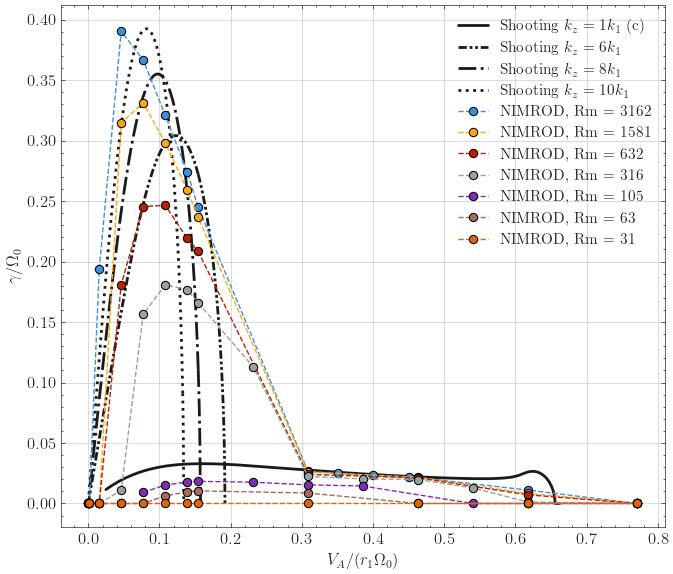

In [42]:
fig = plt.figure(figsize=(7,6))
# fig = plt.figure()

ax = plt.subplot(111)
color_arr = ['#3F90DA', '#FFA90E', '#BD1F01', '#94A4A2', '#832DB6', '#A96B59', '#E76300', '#B9AC70', '#92DADD']
# color_arr = ['#009e73', '#0072b2', '#56b4e9', '#f0e442', '#e69f00', '#d55e00', '#cc79a7', '#7e2954']

plt.plot(VA_l_MCI1_Bz,gr_1k1_MCI_l_Bz, 'k', label =f'Shooting $k_z = 1k_1$ (c)', linewidth=2)
plt.plot(VA_h_MCI1_Bz,gr_1k1_MCI_h_Bz, 'k', linewidth=2)    

plt.plot(VA_l_MRI6_Bz,gr_6k1_MRI_l_Bz, color = 'k', label =f'Shooting $k_z = 6k_1$', linestyle = (0, (3, 1, 1, 1, 1, 1)), linewidth=2)
plt.plot(VA_h_MRI6_Bz,gr_6k1_MRI_h_Bz, color = 'k', linestyle = (0, (3, 1, 1, 1, 1, 1)), linewidth=2)    

plt.plot(VA_l_MRI8_Bz,gr_8k1_MRI_l_Bz, 'k', label =f'Shooting $k_z = 8k_1$', linestyle = '-.', linewidth=2)
plt.plot(VA_h_MRI8_Bz,gr_8k1_MRI_h_Bz, 'k', linestyle = '-.', linewidth=2)    

plt.plot(VA_l_MRI10_Bz,gr_10k1_MRI_l_Bz, 'k', label =f'Shooting $k_z = 10k_1$', linestyle = ':', linewidth=2)  
plt.plot(VA_h_MRI10_Bz,gr_10k1_MRI_h_Bz, 'k', linestyle = ':', linewidth=2)  


# plt.plot(MRI_arr_Bz, MRI_arr, 's', label =f'$k_z > 1k_1$', color = 'k', markersize=10)    
# plt.plot(k1_arr_Bz, k1_arr, 's', label =f'$k_z = 1k_1$', color = color_arr[4], markersize=10) 
# plt.plot(VA_N_arr_ETA30, ETA30_arr, 's', markersize=10, color = color_arr[4])

# plt.plot(Stable_Arr_Bz, Stable_Arr, 's', label =f'Stable', color = color_arr[6], markersize=10) 

# ## MCI 1k1
# plt.plot(VA_l_MCI1_Bz,gr_1k1_MCI_l_Bz, 'k', label =f'Shooting $k_z = 1k_1$ (c)', linewidth=2)
# plt.plot(VA_h_MCI1_Bz,gr_1k1_MCI_h_Bz, 'k', linewidth=2)    


### RESISTIVE SHOOTING DATA
# plt.plot(VA_l_MCI1_Bz_ETA1_divr_q2mag9,gr_1k1_MCI_l_Bz_ETA1_divr_q2mag9, 'k', label =f'Shooting $k_z = 1k_1$ (c), $\eta = 1, q^2 \sim 9$', linewidth=2)
# plt.plot(VA_h_MCI1_Bz_ETA1_divr_q2mag9,gr_1k1_MCI_h_Bz_ETA1_divr_q2mag9, 'k', linewidth=2)    

# plt.plot(VA_l_MCI1_Bz_ETA5_divr_q2mag9,gr_1k1_MCI_l_Bz_ETA5_divr_q2mag9, 'k', linestyle = '--', label =f'Shooting $k_z = 1k_1$ (c), $\eta = 5, q^2 \sim 9$', linewidth=2)
# plt.plot(VA_h_MCI1_Bz_ETA5_divr_q2mag9,gr_1k1_MCI_h_Bz_ETA5_divr_q2mag9, 'k', linestyle = '--', linewidth=2)    

# plt.plot(VA_l_MCI1_Bz_ETA50_divr_q2mag9,gr_1k1_MCI_l_Bz_ETA50_divr_q2mag9, 'k', linestyle = '--', label =f'Shooting $k_z = 1k_1$ (c), $\eta = 50, q^2 \sim 9$', linewidth=2)
# plt.plot(VA_h_MCI1_Bz_ETA50_divr_q2mag9,gr_1k1_MCI_h_Bz_ETA50_divr_q2mag9, 'k', linestyle = '--', linewidth=2)    

# plt.plot(VA_l_MCI1_Bz_ETA1_divr_q2mag4,gr_1k1_MCI_l_Bz_ETA1_divr_q2mag4, 'k', label =f'Shooting $k_z = 1k_1$ (c), $\eta = 1, q^2 \sim 4$', linewidth=2)
# plt.plot(VA_h_MCI1_Bz_ETA1_divr_q2mag4,gr_1k1_MCI_h_Bz_ETA1_divr_q2mag4, 'k', linewidth=2)    

# plt.plot(VA_l_MCI1_Bz_ETA5_divr_q2mag4,gr_1k1_MCI_l_Bz_ETA5_divr_q2mag4, 'k', linestyle = '--', label =f'Shooting $k_z = 1k_1$ (c), $\eta = 5, q^2 \sim 4$', linewidth=2)
# plt.plot(VA_h_MCI1_Bz_ETA5_divr_q2mag4,gr_1k1_MCI_h_Bz_ETA5_divr_q2mag4, 'k', linestyle = '--', linewidth=2)    

# plt.plot(VA_l_MCI1_Bz_ETA50_divr_q2mag4,gr_1k1_MCI_l_Bz_ETA50_divr_q2mag4, 'k', linestyle = '--', label =f'Shooting $k_z = 1k_1$ (c), $\eta = 50, q^2 \sim 4$', linewidth=2)
# plt.plot(VA_h_MCI1_Bz_ETA50_divr_q2mag4,gr_1k1_MCI_h_Bz_ETA50_divr_q2mag4, 'k', linestyle = '--', linewidth=2)  

# plt.plot(VA_l_MCI1_Bz_ETA1_divr_q2mag1,gr_1k1_MCI_l_Bz_ETA1_divr_q2mag1, 'k', label =f'Shooting $k_z = 1k_1$ (c), $\eta = 1, q^2 \sim 1$', linewidth=2)
# plt.plot(VA_h_MCI1_Bz_ETA1_divr_q2mag1,gr_1k1_MCI_h_Bz_ETA1_divr_q2mag1, 'k', linewidth=2)    

# plt.plot(VA_l_MCI1_Bz_ETA5_divr_q2mag1,gr_1k1_MCI_l_Bz_ETA5_divr_q2mag1, 'k', linestyle = '--', label =f'Shooting $k_z = 1k_1$ (c), $\eta = 5, q^2 \sim 1$', linewidth=2)
# plt.plot(VA_h_MCI1_Bz_ETA5_divr_q2mag1,gr_1k1_MCI_h_Bz_ETA5_divr_q2mag1, 'k', linestyle = '--', linewidth=2)    

# plt.plot(VA_l_MCI1_Bz_ETA50_divr_q2mag9,gr_1k1_MCI_l_Bz_ETA50_divr_q2mag1, 'k', linestyle = '--', label =f'Shooting $k_z = 1k_1$ (c), $\eta = 50, q^2 \sim 1$', linewidth=2)
# plt.plot(VA_h_MCI1_Bz_ETA50_divr_q2mag9,gr_1k1_MCI_h_Bz_ETA50_divr_q2mag1, 'k', linestyle = '--', linewidth=2)    

V0 = r1*Omega0
eta_arr = [1, 2, 5, 30, 50, 100]
eta_arr = [1, 2, 5, 10, 30, 50, 100]
Rm = r1*V0/np.array(eta_arr) 

### NIMROD DATA
# plt.plot(VA_N_Arr_ETA1, ETA1_arr, 'o', label=r'NIMROD ($\eta = $ ' + str(eta_arr[0]) + ', Rm = ' + str(int(Rm[0])) + ')', linestyle = '--', color = color_arr[0])    
# plt.plot(VA_N_Arr, ETA2_arr, 'o', label=r'NIMROD ($\eta = $ ' + str(eta_arr[1]) + ', Rm = ' + str(int(Rm[1])) + ')', linestyle = '--', color = color_arr[1])    
# plt.plot(VA_N_Arr, ETA5_arr, 'o', label=r'NIMROD ($\eta = $ ' + str(eta_arr[2]) + ', Rm = ' + str(int(Rm[2])) + ')', linestyle = '--', color = color_arr[2]) 
# VA_N_arr_ETA30 = np.array([5,7,9,10,15,20,25, 35, 40, 50])/10000/ np.sqrt(rho*mu_0)/(r1*Omega0)
# ETA30_arr = np.array([2910.5, 4802.86, 5624.57, 5785.62, 5563.77, 4872.37, 4571.64, 0, 0 ,0])/Omega0
# plt.plot(VA_N_arr_ETA30, ETA30_arr, 'o', label=r'NIMROD ($\eta = $ ' + str(eta_arr[3]) + ', Rm = ' + str(int(Rm[3])) + ')', linestyle = '--', color = color_arr[6])
# plt.plot(VA_N_Arr, ETA50_arr, 'o', label=r'NIMROD ($\eta = $ ' + str(eta_arr[4]) + ', Rm = ' + str(int(Rm[4])) + ')', linestyle = '--', color = color_arr[3])
# plt.plot(VA_N_Arr, ETA100_arr, 'o', label=r'NIMROD ($\eta = $ ' + str(eta_arr[5]) + ', Rm = ' + str(int(Rm[5])) + ')', linestyle = '--', color = color_arr[5])

####### More
VA_N_arr_ETA10 = np.array([1,3,5,7,9,10,15,20,25,30,35,40,50])/ np.sqrt(rho*mu_0)/(r1*Omega0) /10000
ETA10_arr = np.array([0, 3442.75, 49415.3, 57168.2, 55887.2, 52497.7, 35773, 7094.5, 6426.95, 6267.11, 4076.52,401.801, 0])
# ETA10_arr_k = [-2, -2, -2, -2, -2, 1, 1, 1, 1, -2, -2,-2]
ETA10_arr = ETA10_arr / Omega0

### NIMROD DATA
plt.plot(VA_N_Arr_ETA1, ETA1_arr, 'o', label=r'NIMROD, Rm = ' + str(int(Rm[0])), linestyle = '--', color = color_arr[0], markeredgecolor='black', markeredgewidth = 0.75)      
plt.plot(VA_N_Arr, ETA2_arr, 'o', label=r'NIMROD, Rm = ' + str(int(Rm[1])), linestyle = '--', color = color_arr[1], markeredgecolor='black', markeredgewidth = 0.75)     
plt.plot(VA_N_Arr, ETA5_arr, 'o', label=r'NIMROD, Rm = ' + str(int(Rm[2])), linestyle = '--', color = color_arr[2], markeredgecolor='black', markeredgewidth = 0.75)    
VA_N_arr_ETA30 = np.array([5,7,9,10,15,20,25, 35, 40, 50])/10000/ np.sqrt(rho*mu_0)/(r1*Omega0)
ETA30_arr = np.array([2910.5, 4802.86, 5624.57, 5785.62, 5563.77, 4872.37, 4571.64, 0, 0 ,0])/Omega0

plt.plot(VA_N_arr_ETA10, ETA10_arr, 'o', label=r'NIMROD, Rm = ' + str(int(Rm[3])), linestyle = '--', color = color_arr[3], markeredgecolor='black', markeredgewidth = 0.75)   

plt.plot(VA_N_arr_ETA30, ETA30_arr, 'o', label=r'NIMROD, Rm = ' + str(int(Rm[4])), linestyle = '--', color = color_arr[4], markeredgecolor='black', markeredgewidth = 0.75)   
plt.plot(VA_N_Arr, ETA50_arr, 'o', label=r'NIMROD, Rm = ' + str(int(Rm[5])), linestyle = '--', color = color_arr[5], markeredgecolor='black', markeredgewidth = 0.75)   
plt.plot(VA_N_Arr, ETA100_arr, 'o', label=r'NIMROD, Rm = ' + str(int(Rm[6])), linestyle = '--', color = color_arr[6], markeredgecolor='black', markeredgewidth = 0.75)   

plt.xlabel('$V_A/(r_1 \Omega_0)$',fontsize=12)
plt.ylabel(r'$\gamma/\Omega_0$',fontsize=12)
# plt.title(f'Vertical field growth rates (Shooting vs NIMROD)',fontsize=15)
# plt.xlim(0,0.7)
# plt.ylim(0,0.25)


# plt.text(1.3-0.05-.8, 0.25, '(a)', fontsize=20, color = color_arr[5], fontweight="bold")


# plt.axvline(x=.2, linestyle = '--', color = color_arr[6], linewidth=3)
# plt.text(1.05-.8, 0.3, 'MCI', fontsize=20, color = color_arr[6], fontweight="bold")
# plt.text(-0.03, 0.3, 'MRI', fontsize=20, color = color_arr[6], fontweight="bold")


box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend()
# plt.ylim(0,0.45)
# plt.legend()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
# ax.set_aspect('equal', 'box')

plt.savefig('Shooting-NIMROD-comp/GRvsAlfvenSpeed-NIMROD-Bz-w-v2.png', bbox_inches='tight', dpi = 400)
plt.savefig('Shooting-NIMROD-comp/GRvsAlfvenSpeed-NIMROD-Bz-w-v2.svg', bbox_inches='tight', format = 'svg')

plt.show()
plt.close()



In [43]:
def shoot_hain_v3(w, eta, Pm, qr, qrp, qi, qip,  k=np.pi/2, m=1, B0=0, Bz = 0, keplerian=True, cc=1, r2=5, max=500, q=1/2):
    ## DIFF IS INCLUDES IMAG
    y0 = [0.,1.+1.j]
    y = i.solve_ivp(shoot_setup_hain_v2, [1,r2**2], y0, args=(w,eta, Pm, qr, qrp, qi, qip, m,k,B0,Bz, keplerian,cc, q), max_step=24./(max/r2))
    r = np.sqrt(y.t)
    u = y.y[0]
    return ((u/r)[-1])

### REDONE DERIVATION
def shoot_setup_hain_v2(x, y, w, elecd, Pm, k2rs, k2rps, k2is, k2ips, m, kz=np.pi/4, B0=60, Bz=12.967, keplerian=True, cc=1, q=1/2):
    mu_0 = 1.2566*10**(-6)
     ### PM = 1
    r = np.sqrt(x)
    k2 = k2rs(r) + 1j*k2is(r)
    k2p = k2rps(r) + 1j*k2ips(r)
    vp1 = 1
    if keplerian == True:
        W = vp1 / r**(3/2)
        Wp = -3/2 * vp1 / r**(5/2)
        Wpp = 5/2 * 3/2 * vp1 / r ** (7/2)
    elif keplerian == 'khalzov':
        W = vp1/x
        Wp = -vp1/x**2
    elif keplerian == 'rigid':
        W = vp1
        Wp = 0
    elif keplerian == 'Sh2':
        W = vp1/r**2
        Wp = -2*vp1/r**3
        Wpp = 6*vp1/r**4
    elif keplerian == False:
        vp = vp1/(x**(q/2))
        W = vp/r
        Wp = (-1*(q+1)/2)*(W/x)
    elif keplerian == 'saturated':
        A0 = 1.4923889E-02
        A1 = -1.0114824E-01
        A2 = 8.5753488E-02
        A3 = -2.8021088E-02
        A4 = -4.7882189E-01
        A5 = 1.0877462E-01
        A6 = 6.7857446E+00
        A7 = -5.0846913E+00
        A8 = -4.3114342E+01
        A9 = 5.2943846E+01
        A10 = 1.2219068E+02
        A11 = -1.9185099E+02
        A12 = -1.7535573E+02
        A13 = 3.4808679E+02
        A14 = 1.1975807E+02
        A15 = -3.4500839E+02
        A16 =  -1.4844420E+01
        A17 = 1.7930272E+02
        A18 = -2.5033736E+01
        ###  0.08875 + 0.91125/r^2 
        W = 0.08875 + 0.91125/r**2 + A0 + A1*(r-2) + A2*(r-2)**2+A3*(r-2)**3 + A4*(r-2)**4 + A5*(r-2)**5 + A6*(r-2)**6 + A7*(r-2)**7 + A8*(r-2)**8 + A9*(r-2)**9 + A10*(r-2)**10 + A11*(r-2)**11 + A12*(r-2)**12 + A13*(r-2)**13 + A14*(r-2)**14 + A15*(r-2)**15 + A16*(r-2)**16 + A17*(r-2)**17 + A18*(r-2)**18 - ( A1 + A3 + A5 + A7 + A9 + A11 + A13 + A15 + A17 )*(r-2)**19 - ( A0 + A2 + A4 + A6 + A8 + A10 + A12 + A14 + A16 + A18 )*(r-2)**20
        Wp = - 2 * 0.91125/r**3  + A1 + 2*A2*(r-2) + 3*A3*(r-2)**2 + 4*A4*(r-2)**3 + 5*A5*(r-2)**4 + 6*A6*(r-2)**5 + 7*A7*(r-2)**6 + 8*A8*(r-2)**7 + 9*A9*(r-2)**8 + 10*A10*(r-2)**9 + 11*A11*(r-2)**10 + 12*A12*(r-2)**11 + 13*A13*(r-2)**12 + 14*A14*(r-2)**13 + 15*A15*(r-2)**14 + 16*A16*(r-2)**15 + 17*A17*(r-2)**16 + 18*A18*(r-2)**17 - 19*( A1 + A3 + A5 + A7 + A9 + A11 + A13 + A15 + A17 )*(r-2)**18 - 20*( A0 + A2 + A4 + A6 + A8 + A10 + A12 + A14 + A16 + A18 )*(r-2)**19
        Wpp = 3 * 2 * 0.91125/r**4  + 2*A2 + 3 * 2 * A3*(r-2) + 4 * 3 * A4*(r-2)**2 + 5 * 4 * A5*(r-2)**3 + 6 * 5 * A6*(r-2)**4 + 7 * 6 * A7*(r-2)**5 + 8 * 7 * A8*(r-2)**6 + 9 * 8 * A9*(r-2)**7 + 10 * 9  * A10*(r-2)**8 + 11 * 10 * A11*(r-2)**9 + 12 * 11 * A12*(r-2)**10 + 13 * 12 * A13*(r-2)**11 + 14 * 13 * A14*(r-2)**12 + 15 * 14 * A15*(r-2)**13 + 16 * 15 * A16*(r-2)**14 + 17 * 16 * A17*(r-2)**15 + 18 * 17 * A18*(r-2)**16 - 19 * 18 * ( A1 + A3 + A5 + A7 + A9 + A11 + A13 + A15 + A17 )*(r-2)**17 - 20 * 19 * ( A0 + A2 + A4 + A6 + A8 + A10 + A12 + A14 + A16 + A18 )*(r-2)**18 
        
    elif keplerian == 'saturated2':
        W = W_f(r)
        Wp = Wp_f(r)
        Wpp = Wpp_f(r)
    elif keplerian == 'tanh':
        a = c = b = d = 1
        d = 0.85
        W = d*np.tanh(-c*r+a)+b
        Wp = -c * d * (1/np.cosh(-c * r + a))**2
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
    elif keplerian == 'tanhv3':
        a = c = b = d = 1
        d = 0.84
        W = d*np.tanh(-c*r+a)+b
        Wp = -c * d * (1/np.cosh(-c * r + a))**2
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
    elif keplerian == 'tanhv4':
        a = c = b = d = 1
        a = 0.6
        c = a
        d = 0.9
        W= d*np.tanh(-c*r+a)+b
        Wp = -c * d * (1/np.cosh(-c * r + a))**2
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
    elif keplerian == 'mKep':
        r10 = 1.5
        R0 = 1

        if(r < r10):
            W = 1
            Wp = 0
            Wpp = 0
        else:
            W = 1/(1+((r-r10)/R0)**(3/2))
            Wp = -3/(2*R0)*((r-r10)/R0)**(1/2)/(1+((r-r10)/R0)**(3/2))**2
            u = 1+((r-r10)/R0)**(3/2)
            up = 3/(2*R0)*((r-r10)/R0)**(1/2)
            Wpp = -( (3/(4*R0**2)*(1/R0*(r-r10))**(-1/2))*u**2 - (3/(2*R0) * (1/R0*(r-r10))**(1/2))*2*u*up)/(u**4)
    elif keplerian == 'mKep2':
        r10 = 1.5
        R0 = 1.5

        if(r < r10):
            W = 1
            Wp = 0
            Wpp = 0
        else:
            W = 1/(1+((r-r10)/R0)**(3/2))
            Wp = -3/(2*R0)*((r-r10)/R0)**(1/2)/(1+((r-r10)/R0)**(3/2))**2
            u = 1+((r-r10)/R0)**(3/2)
            up = 3/(2*R0)*((r-r10)/R0)**(1/2)
            Wpp = -( (3/(4*R0**2)*(1/R0*(r-r10))**(-1/2))*u**2 - (3/(2*R0) * (1/R0*(r-r10))**(1/2))*2*u*up)/(u**4)
        
    # Define Normalizations
    r1 = 0.1

    ## Define OMEGA0:
    bb = 10000
    v0 = bb/np.sqrt(r1)
    Omega0 = v0/r1

    vAp1 = B0/(r1*Omega0*np.sqrt(rho*mu_0)*10000)
    
    vAp = vAp1/np.sqrt(x)
    vAz = Bz / (r1*Omega0*np.sqrt(rho*mu_0)*10000)
    
    ### MODIFY w
    wA = (m/np.sqrt(x))*vAp + kz*vAz
    wb = w-m*W
    wc = 2*vAp/np.sqrt(x)*cc
    
    wAp = -m*vAp1/x**2*2*r
    wcp = -2*vAp1/x**2*cc*2*r


    # elecd = elecd / (r1**2*Omega0)*2
    elecd = elecd / (r1**2*Omega0)
    nu = elecd*Pm

    ### Note this is k2p with respect to r.
    wbp = -m*Wp
    wbpp = -m*Wpp
    lnu = -1j*wb + nu*k2
    lnup = -1j*wbp + nu*k2p
    leta = -1j*wb + elecd*k2
    letap = -1j*wbp + elecd*k2p
    
    L = lnu + wA**2/(leta)
    Lp = lnup + 2*wA*wAp/leta - wA**2*letap/(leta**2)
    h2 = kz**2 + m**2/r**2
    h = np.sqrt(h2)
    hp = -1/h*(m**2/r**3)
    E = L**2 + L*r/leta * wc * (1j*wA*Wp/leta - 1/2*wcp) + 2*(W - 1j*1/2*wc*wA/leta)*(2*W + (1+wA**2/leta**2)*r*Wp - 1j*wA*wc/leta)
    f = 2*r**2*(leta*lnu + wA**2)/((kz**2*r**2+m**2))
    fp = 1/(kz**2*r**2+m**2) * (4*r*(leta*lnu + wA**2) +2*r**2*(letap*lnu+leta*lnup + 2*wA*wAp)) - 1/(kz**2*r**2+m**2)**2 * (4*kz**2*r**3*(lnu*leta + wA**2))
    s = (1j*m*(lnu - leta)/(h**2*r)*Wp)
    g_dr_num_undiff = ((leta - lnu) * r * Wp + 2*(W*leta - 1/2*1j*wc*wA)) ## modified
    g_dr_num_diff = (letap - lnup) * r * Wp + (leta - lnu)*(Wp + r*Wpp) + 2*(Wp*leta + W*letap - 1/2*1j*wcp*wA - 1/2*1j*wc*wAp)
    g_dr_denom_undiff = h**2*r**2
    g_dr_denom_diff = 2*h*hp*r**2 + 2*h**2*r
    g_dr_term = 1j*m*(g_dr_num_diff/g_dr_denom_undiff - g_dr_num_undiff*g_dr_denom_diff/g_dr_denom_undiff**2)

    g = g_dr_term + E*leta/(L*r) - (W - 1j*1/2*wc*wA/leta)*(2*m**2/(L*h**2*r**3))*((leta - lnu)*r*Wp + 2*(W*leta - 1j * 1/2*wA*wc))

    u, du = y

    ### REWRITE ALL TERMS
    f = leta*L/(h**2*r)
    fp = (letap*L + leta*Lp)/(h**2*r) - leta*L*(2*h*hp*r+h**2)/(h**2*r)**2

    u_coeff = 1/(-4*r)*-g
    du_coeff = -1/(4*r)*(2*(f+r*fp)) - s/(2)
    d2u_coeff = -r*f
    dudx = [du, (1/d2u_coeff)*(-du_coeff*du - u_coeff*u)]

    return dudx

In [44]:
Vr1 = f'Contour-Data/Vr_contour_Eta50Bz10G.pkl'

with open(Vr1, 'rb') as f:
    Vr_Eta50_10G = pickle.load(f)    

Vr2 = f'Contour-Data/Vr_contour_Eta50Bz20G.pkl'

with open(Vr2, 'rb') as f:
    Vr_Eta50_20G = pickle.load(f)    

Vr3 = f'Contour-Data/Vr_contour_Eta5Bz20G.pkl'

with open(Vr3, 'rb') as f:
    Vr_Eta5_20G = pickle.load(f)    

Vr3 = f'Contour-Data/Vr_contour_Eta5Bz10G.pkl'

with open(Vr3, 'rb') as f:
    Vr_Eta5_10G = pickle.load(f)    
    
Vr4 = f'Contour-Data/Vr_contour_Eta5Bz30G.pkl'

with open(Vr4, 'rb') as f:
    Vr_Eta5_30G = pickle.load(f)    

Vr4 = f'Contour-Data/Vr_contour_Eta30Bz20G.pkl'

with open(Vr4, 'rb') as f:
    Vr_Eta30_20G = pickle.load(f)    

Vr4 = f'Contour-Data/Vr_contour_Eta5Bz90G-Az-AR2.pkl'

with open(Vr4, 'rb') as f:
    Vr_Eta5_90G_AR2 = pickle.load(f)    

Vr4 = f'Contour-Data/Br_contour_Eta5Bz90G-Az-AR2.pkl'

with open(Vr4, 'rb') as f:
    Br_Eta5_90G_AR2 = pickle.load(f)    
    
Vr4 = f'Contour-Data/Vr_contour_Eta0p1Bz40G-Az-AR0.pkl'

with open(Vr4, 'rb') as f:
    Vr_Eta0p1_40G_AR0 = pickle.load(f)    


Vr4 = f'Contour-Data/Br_contour_Eta0p1Bz40G-Az-AR0.pkl'

with open(Vr4, 'rb') as f:
    Br_Eta0p1_40G_AR0 = pickle.load(f)    





Vr4 = f'Contour-Data/Vr_contour_Eta0p1Bz90G-Az-AR2.pkl'

with open(Vr4, 'rb') as f:
    Vr_Eta0p1_90G_AR2 = pickle.load(f)    


Vr5 = f'Contour-Data/rc.pkl'

with open(Vr5, 'rb') as f:
    rc = pickle.load(f)    
    
Vr6 = f'Contour-Data/zc.pkl'

with open(Vr6, 'rb') as f:
    zc = pickle.load(f)   
    
Vr5 = f'Contour-Data/rc-AR0.pkl'

with open(Vr5, 'rb') as f:
    rc_AR0 = pickle.load(f)    

Vr5 = f'Contour-Data/zc-AR0.pkl'

with open(Vr5, 'rb') as f:
    zc_AR0 = pickle.load(f)   

Vr5 = f'Contour-Data/rc-AR2.pkl'

with open(Vr5, 'rb') as f:
    rc_AR2 = pickle.load(f)    

Vr5 = f'Contour-Data/zc-AR2.pkl'

with open(Vr5, 'rb') as f:
    zc_AR2 = pickle.load(f)  


######################################
Br1 = f'Contour-Data/Br_contour_Eta30Bz10G.pkl'

with open(Br1, 'rb') as f:
    Br_Eta30_10G = pickle.load(f)    

Br2 = f'Contour-Data/Br_contour_Eta30Bz20G.pkl'

with open(Br2, 'rb') as f:
    Br_Eta30_20G = pickle.load(f)   
    
Br2 = f'Contour-Data/Vr_contour_Eta30Bz20G-i.pkl'

with open(Br2, 'rb') as f:
    Vri_Eta30_20G = pickle.load(f)   
    

# PLOT TOTAL

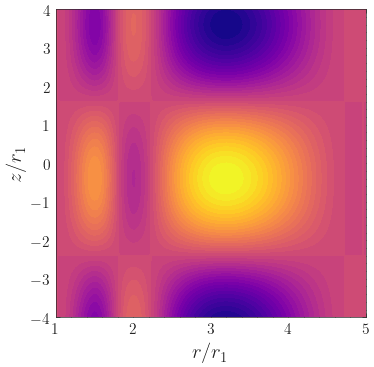

In [52]:
fig = plt.figure(figsize = (4,4))
cp2=plt.contourf(rc/0.1,zc/0.1, Vr_Eta5_20G,50, cmap='plasma')
plt.xlabel('$r/r_1$',fontdict={'fontsize':15})
plt.ylabel('$z/r_1$',fontdict={'fontsize':15})
plt.show()
plt.close() 

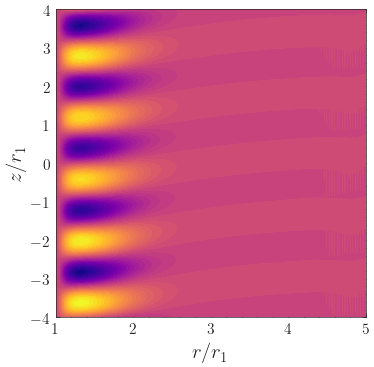

In [53]:
fig = plt.figure(figsize = (4,4))
cp2=plt.contourf(rc/0.1,zc/0.1, Vr_Eta5_10G,50, cmap='plasma')
plt.xlabel('$r/r_1$',fontdict={'fontsize':15})
plt.ylabel('$z/r_1$',fontdict={'fontsize':15})
plt.show()
plt.close() 

[3162.27766017 1581.13883008  632.45553203  316.22776602  105.40925534
   63.2455532    31.6227766 ]
105.40925533894598
[1.54242271e-04 1.54242271e-03 1.54242271e-02 4.62726813e-02
 7.71211355e-02 1.07969590e-01 1.38818044e-01 1.54242271e-01
 3.08484542e-01 4.62726813e-01 6.16969084e-01 7.71211355e-01]
0.3084845421976671
0.15424227109883354


C:\Users\Alex\AppData\Local\Temp\ipykernel_29204\2868084235.py:158: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


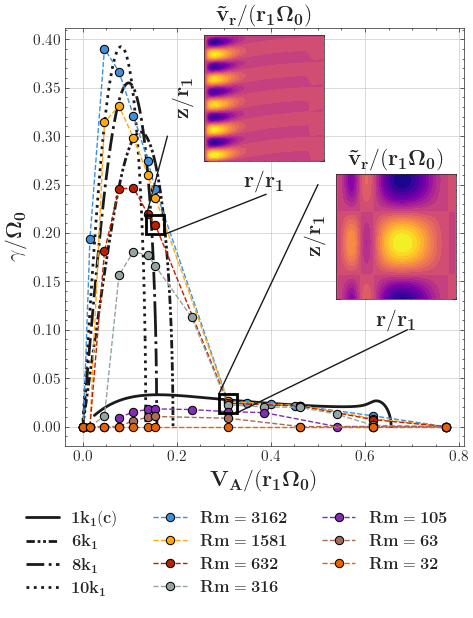

In [54]:
fig,ax = plt.subplots(figsize=(5,5))
# fig = plt.figure()

ax = plt.subplot(111)
color_arr = ['#3F90DA', '#FFA90E', '#BD1F01', '#94A4A2', '#832DB6', '#A96B59', '#E76300', '#B9AC70', '#92DADD']
# color_arr = ['#009e73', '#0072b2', '#56b4e9', '#f0e442', '#e69f00', '#d55e00', '#cc79a7', '#7e2954']

plt.plot(VA_l_MCI1_Bz,gr_1k1_MCI_l_Bz, 'k', label =r'$\mathbf{ 1k_1 (c)}$', linewidth=2)
plt.plot(VA_h_MCI1_Bz,gr_1k1_MCI_h_Bz, 'k', linewidth=2)    

plt.plot(VA_l_MRI6_Bz,gr_6k1_MRI_l_Bz, color = 'k', label =r'$\mathbf{ 6k_1}$', linestyle = (0, (3, 1, 1, 1, 1, 1)), linewidth=2)
plt.plot(VA_h_MRI6_Bz,gr_6k1_MRI_h_Bz, color = 'k', linestyle = (0, (3, 1, 1, 1, 1, 1)), linewidth=2)    

plt.plot(VA_l_MRI8_Bz,gr_8k1_MRI_l_Bz, 'k', label =r'$\mathbf{ 8k_1}$', linestyle = '-.', linewidth=2)
plt.plot(VA_h_MRI8_Bz,gr_8k1_MRI_h_Bz, 'k', linestyle = '-.', linewidth=2)    

plt.plot(VA_l_MRI10_Bz,gr_10k1_MRI_l_Bz, 'k', label =r'$\mathbf{ 10k_1}$', linestyle = ':', linewidth=2)  
plt.plot(VA_h_MRI10_Bz,gr_10k1_MRI_h_Bz, 'k', linestyle = ':', linewidth=2)  

V0 = r1*Omega0
eta_arr = [1, 2, 5, 30, 50, 100]
eta_arr = [1, 2, 5, 10, 30, 50, 100]
Rm = r1*V0/np.array(eta_arr) 

####### More
VA_N_arr_ETA10 = np.array([1,3,5,7,9,10,15,20,25,30,35,40,50])/ np.sqrt(rho*mu_0)/(r1*Omega0) /10000
ETA10_arr = np.array([0, 3442.75, 49415.3, 57168.2, 55887.2, 52497.7, 35773, 7094.5, 6426.95, 6267.11, 4076.52,401.801, 0])
ETA10_arr = ETA10_arr / Omega0

### NIMROD DATA
print((Rm))
print((r1**2*Omega0)/30)
plt.plot(VA_N_Arr_ETA1, ETA1_arr, 'o', label=r'$\mathbf{Rm = 3162}$ ', linestyle = '--', color = color_arr[0], markeredgecolor='black', markeredgewidth = 0.75)      
plt.plot(VA_N_Arr, ETA2_arr, 'o', label=r'$\mathbf{Rm = 1581}$ ', linestyle = '--', color = color_arr[1], markeredgecolor='black', markeredgewidth = 0.75)     
plt.plot(VA_N_Arr, ETA5_arr, 'o', label=r'$\mathbf{Rm = 632}$ ', linestyle = '--', color = color_arr[2], markeredgecolor='black', markeredgewidth = 0.75)    
VA_N_arr_ETA30 = np.array([5,7,9,10,15,20,25, 35, 40, 50])/10000/ np.sqrt(rho*mu_0)/(r1*Omega0)
ETA30_arr = np.array([2910.5, 4802.86, 5624.57, 5785.62, 5563.77, 4872.37, 4571.64, 0, 0 ,0])/Omega0

plt.plot(VA_N_arr_ETA10, ETA10_arr, 'o', label=r'$\mathbf{Rm = 316}$ ', linestyle = '--', color = color_arr[3], markeredgecolor='black', markeredgewidth = 0.75)   

plt.plot(VA_N_arr_ETA30, ETA30_arr, 'o', label=r'$\mathbf{Rm = 105}$ ', linestyle = '--', color = color_arr[4], markeredgecolor='black', markeredgewidth = 0.75)   
plt.plot(VA_N_Arr, ETA50_arr, 'o', label=r'$\mathbf{Rm = 63}$ ', linestyle = '--', color = color_arr[5], markeredgecolor='black', markeredgewidth = 0.75)   
plt.plot(VA_N_Arr, ETA100_arr, 'o', label=r'$\mathbf{Rm = 32}$ ', linestyle = '--', color = color_arr[6], markeredgecolor='black', markeredgewidth = 0.75)   

plt.xlabel(r'$\mathbf{V_A/(r_1 \Omega_0)}$',fontsize=16)
plt.ylabel(r'$\mathbf{\gamma/\Omega_0}$',fontsize=16)


from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from matplotlib.patches import Rectangle

ax_inset = inset_axes(ax, width="30%", height="30%", loc='center right')
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.axes.yaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r'$\mathbf{z/r_1}$', fontsize = 16)
cp2=ax_inset.contourf(rc/0.1,zc/0.1, Vr_Eta5_20G,20, cmap='plasma')
ax_inset.set_title(r"$\mathbf{\tilde{v}_r/(r_1\Omega_0)}$", fontsize = 16)


ax_inset = inset_axes(ax, width="30%", height="30%", loc='upper center')
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.axes.yaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r'$\mathbf{z/r_1}$', fontsize = 16)
cp2=ax_inset.contourf(rc/0.1,zc/0.1, Vr_Eta5_10G,20, cmap='plasma')
ax_inset.set_title(r"$\mathbf{\tilde{v}_r/(r_1\Omega_0)}$", fontsize = 16, pad = 10)


print(VA_N_Arr)
# print(ETA5_arr)
print(VA_N_Arr[len(VA_N_Arr)-4]) ## 20G
print(VA_N_Arr[len(VA_N_Arr)-5]) ## 30G

highlight_x_MRI = VA_N_Arr[len(VA_N_Arr)-5]
highlight_y_MRI = ETA5_arr[len(ETA5_arr)-5]

highlight_x_MCI = VA_N_Arr[len(VA_N_Arr)-4]
highlight_y_MCI = ETA5_arr[len(ETA5_arr)-4]

# Define the center and size of the rectangle
width = 0.075 /2  # Width of the rectangle
height = 0.02  # Height of the rectangle

# Calculate the bottom-left corner coordinates
x = highlight_x_MCI - width / 2
y = highlight_y_MCI - height / 2

rect_x = x
rect_y = y
rect_width = width 
rect_height = height

# Define the rectangle's corners in the main plot
main_rect_corners = [
    (rect_x, rect_y),  # Bottom-left corner
    (rect_x + rect_width, rect_y),  # Bottom-right corner
    (rect_x, rect_y + rect_height),  # Top-left corner
    (rect_x + rect_width, rect_y + rect_height)  # Top-right corner
]

# Create a rectangle
rect = Rectangle((x, y), width, height, linewidth=2, edgecolor='black', facecolor='none', zorder=3)
ax.add_patch(rect)

################### PLOT LINES
pt2 = [0.69, 0.1]
pt3 = [0.5, 0.25]
line1X = [main_rect_corners[1][0], pt2[0]]
line1Y = [main_rect_corners[1][1],pt2[1]] 
line2X = [main_rect_corners[0][0], pt3[0]]
line2Y = [main_rect_corners[2][1],pt3[1]]
ax.plot(line1X, line1Y, color = 'k', zorder=2)
ax.plot(line2X, line2Y, color = 'k', zorder=2)

############### MRI
# Define the center and size of the rectangle
width = 0.075 /2  # Width of the rectangle
height = 0.02  # Height of the rectangle

# Calculate the bottom-left corner coordinates
x = highlight_x_MRI - width / 2
y = highlight_y_MRI - height / 2

rect_x = x
rect_y = y
rect_width = width 
rect_height = height

# Define the rectangle's corners in the main plot
main_rect_corners = [
    (rect_x, rect_y),  # Bottom-left corner
    (rect_x + rect_width, rect_y),  # Bottom-right corner
    (rect_x, rect_y + rect_height),  # Top-left corner
    (rect_x + rect_width, rect_y + rect_height)  # Top-right corner
]

# Create a rectangle
rect = Rectangle((x, y), width, height, linewidth=2, edgecolor='black', facecolor='none', zorder=3)
ax.add_patch(rect)

################### PLOT LINES
pt2 = [0.39, 0.24]
pt3 = [0.18, 0.3]

line1X = [main_rect_corners[1][0], pt2[0]]
line1Y = [main_rect_corners[0][1],pt2[1]] 
line2X = [main_rect_corners[0][0], pt3[0]]
line2Y = [main_rect_corners[2][1],pt3[1]]
ax.plot(line1X, line1Y, color = 'k', zorder=2)
ax.plot(line2X, line2Y, color = 'k', zorder=2)


box = ax.get_position()
# ax.legend()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

fig.legend(lines, labels, loc='lower center', ncol=3, 
           bbox_to_anchor=(0.5, -0.24),  # Position the legend below the plot
           frameon=False,  # Turn on the frame (border)
           edgecolor='black',  # Set the border color
           facecolor='white',  # Set the background color of the legend box
           borderpad=1,  # Padding between the legend text and the border
           borderaxespad=1, fontsize = 12)

plt.savefig('Shooting-NIMROD-comp/GRvsAlfvenSpeed-NIMROD-Bz-w-v3.png', bbox_inches='tight', dpi = 400)
plt.savefig('Shooting-NIMROD-comp/GRvsAlfvenSpeed-NIMROD-Bz-w-v3.pdf', bbox_inches='tight', dpi = 400)

# plt.savefig('Shooting-NIMROD-comp/GRvsAlfvenSpeed-NIMROD-Bz-w-v2.svg', bbox_inches='tight', format = 'svg')

plt.show()
plt.close()



### Combined

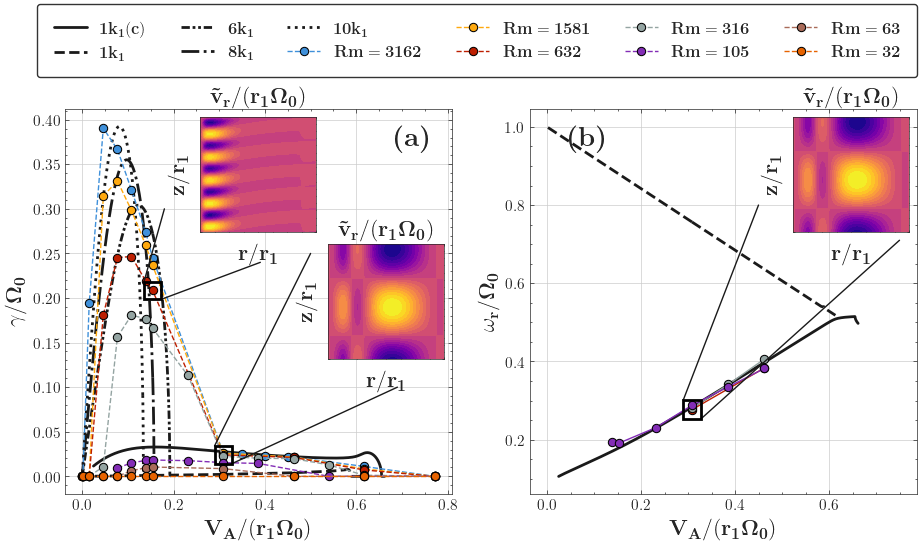

In [67]:
fig, ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(11)
# fig = plt.figure()

color_arr = ['#3F90DA', '#FFA90E', '#BD1F01', '#94A4A2', '#832DB6', '#A96B59', '#E76300', '#B9AC70', '#92DADD']
# color_arr = ['#009e73', '#0072b2', '#56b4e9', '#f0e442', '#e69f00', '#d55e00', '#cc79a7', '#7e2954']

ax[0].plot(VA_l_MCI1_Bz,gr_1k1_MCI_l_Bz, 'k', label =r'$\mathbf{ 1k_1 (c)}$', linewidth=2)
ax[0].plot(VA_h_MCI1_Bz,gr_1k1_MCI_h_Bz, 'k', linewidth=2)    

ax[0].plot(VA_l_MRI1_Bz,gr_1k1_MRI_l_Bz, 'k', label =r'$\mathbf{ 1k_1}$', linestyle = '--', linewidth=2)
ax[0].plot(VA_h_MRI1_Bz,gr_1k1_MRI_h_Bz, 'k', linestyle = '--', linewidth=2)    

ax[0].plot(VA_l_MRI6_Bz,gr_6k1_MRI_l_Bz, color = 'k', label =r'$\mathbf{ 6k_1}$', linestyle = (0, (3, 1, 1, 1, 1, 1)), linewidth=2)
ax[0].plot(VA_h_MRI6_Bz,gr_6k1_MRI_h_Bz, color = 'k', linestyle = (0, (3, 1, 1, 1, 1, 1)), linewidth=2)    

ax[0].plot(VA_l_MRI8_Bz,gr_8k1_MRI_l_Bz, 'k', label =r'$\mathbf{ 8k_1}$', linestyle = '-.', linewidth=2)
ax[0].plot(VA_h_MRI8_Bz,gr_8k1_MRI_h_Bz, 'k', linestyle = '-.', linewidth=2)    

ax[0].plot(VA_l_MRI10_Bz,gr_10k1_MRI_l_Bz, 'k', label =r'$\mathbf{ 10k_1}$', linestyle = ':', linewidth=2)  
ax[0].plot(VA_h_MRI10_Bz,gr_10k1_MRI_h_Bz, 'k', linestyle = ':', linewidth=2)  

V0 = r1*Omega0
eta_arr = [1, 2, 5, 30, 50, 100]
eta_arr = [1, 2, 5, 10, 30, 50, 100]
Rm = r1*V0/np.array(eta_arr) 

####### More
VA_N_arr_ETA10 = np.array([1,3,5,7,9,10,15,20,25,30,35,40,50])/ np.sqrt(rho*mu_0)/(r1*Omega0) /10000
ETA10_arr = np.array([0, 3442.75, 49415.3, 57168.2, 55887.2, 52497.7, 35773, 7094.5, 6426.95, 6267.11, 4076.52,401.801, 0])
ETA10_arr = ETA10_arr / Omega0

### NIMROD DATA
ax[0].plot(VA_N_Arr_ETA1, ETA1_arr, 'o', label=r'$\mathbf{Rm = 3162}$ ', linestyle = '--', color = color_arr[0], markeredgecolor='black', markeredgewidth = 0.75)      
ax[0].plot(VA_N_Arr, ETA2_arr, 'o', label=r'$\mathbf{Rm = 1581}$ ', linestyle = '--', color = color_arr[1], markeredgecolor='black', markeredgewidth = 0.75)     
ax[0].plot(VA_N_Arr, ETA5_arr, 'o', label=r'$\mathbf{Rm = 632}$ ', linestyle = '--', color = color_arr[2], markeredgecolor='black', markeredgewidth = 0.75)    
VA_N_arr_ETA30 = np.array([5,7,9,10,15,20,25, 35, 40, 50])/10000/ np.sqrt(rho*mu_0)/(r1*Omega0)
ETA30_arr = np.array([2910.5, 4802.86, 5624.57, 5785.62, 5563.77, 4872.37, 4571.64, 0, 0 ,0])/Omega0

ax[0].plot(VA_N_arr_ETA10, ETA10_arr, 'o', label=r'$\mathbf{Rm = 316}$ ', linestyle = '--', color = color_arr[3], markeredgecolor='black', markeredgewidth = 0.75)   

ax[0].plot(VA_N_arr_ETA30, ETA30_arr, 'o', label=r'$\mathbf{Rm = 105}$ ', linestyle = '--', color = color_arr[4], markeredgecolor='black', markeredgewidth = 0.75)   
ax[0].plot(VA_N_Arr, ETA50_arr, 'o', label=r'$\mathbf{Rm = 63}$ ', linestyle = '--', color = color_arr[5], markeredgecolor='black', markeredgewidth = 0.75)   
ax[0].plot(VA_N_Arr, ETA100_arr, 'o', label=r'$\mathbf{Rm = 32}$ ', linestyle = '--', color = color_arr[6], markeredgecolor='black', markeredgewidth = 0.75)   



from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from matplotlib.patches import Rectangle

ax_inset = inset_axes(ax[0], width="30%", height="30%", loc='center right')
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.axes.yaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r'$\mathbf{z/r_1}$', fontsize = 16)
cp2=ax_inset.contourf(rc/0.1,zc/0.1, Vr_Eta5_20G,20, cmap='plasma')
ax_inset.set_title(r"$\mathbf{\tilde{v}_r/(r_1\Omega_0)}$", fontsize = 16)


ax_inset = inset_axes(ax[0], width="30%", height="30%", loc='upper center')
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.axes.yaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r'$\mathbf{z/r_1}$', fontsize = 16)
cp2=ax_inset.contourf(rc/0.1,zc/0.1, Vr_Eta5_10G,20, cmap='plasma')
ax_inset.set_title(r"$\mathbf{\tilde{v}_r/(r_1\Omega_0)}$", fontsize = 16, pad = 10)

highlight_x_MRI = VA_N_Arr[len(VA_N_Arr)-5]
highlight_y_MRI = ETA5_arr[len(ETA5_arr)-5]

highlight_x_MCI = VA_N_Arr[len(VA_N_Arr)-4]
highlight_y_MCI = ETA5_arr[len(ETA5_arr)-4]

# Define the center and size of the rectangle
width = 0.075 /2  # Width of the rectangle
height = 0.02  # Height of the rectangle

# Calculate the bottom-left corner coordinates
x = highlight_x_MCI - width / 2
y = highlight_y_MCI - height / 2

rect_x = x
rect_y = y
rect_width = width 
rect_height = height

# Define the rectangle's corners in the main plot
main_rect_corners = [
    (rect_x, rect_y),  # Bottom-left corner
    (rect_x + rect_width, rect_y),  # Bottom-right corner
    (rect_x, rect_y + rect_height),  # Top-left corner
    (rect_x + rect_width, rect_y + rect_height)  # Top-right corner
]

# Create a rectangle
rect = Rectangle((x, y), width, height, linewidth=2, edgecolor='black', facecolor='none', zorder=3)
ax[0].add_patch(rect)

################### PLOT LINES
pt2 = [0.69, 0.1]
pt3 = [0.5, 0.25]
line1X = [main_rect_corners[1][0], pt2[0]]
line1Y = [main_rect_corners[1][1],pt2[1]] 
line2X = [main_rect_corners[0][0], pt3[0]]
line2Y = [main_rect_corners[2][1],pt3[1]]
ax[0].plot(line1X, line1Y, color = 'k', zorder=2)
ax[0].plot(line2X, line2Y, color = 'k', zorder=2)

############### MRI
# Define the center and size of the rectangle
width = 0.075 /2  # Width of the rectangle
height = 0.02  # Height of the rectangle

# Calculate the bottom-left corner coordinates
x = highlight_x_MRI - width / 2
y = highlight_y_MRI - height / 2

rect_x = x
rect_y = y
rect_width = width 
rect_height = height

# Define the rectangle's corners in the main plot
main_rect_corners = [
    (rect_x, rect_y),  # Bottom-left corner
    (rect_x + rect_width, rect_y),  # Bottom-right corner
    (rect_x, rect_y + rect_height),  # Top-left corner
    (rect_x + rect_width, rect_y + rect_height)  # Top-right corner
]

# Create a rectangle
rect = Rectangle((x, y), width, height, linewidth=2, edgecolor='black', facecolor='none', zorder=3)
ax[0].add_patch(rect)

################### PLOT LINES
pt2 = [0.39, 0.24]
pt3 = [0.18, 0.3]

line1X = [main_rect_corners[1][0], pt2[0]]
line1Y = [main_rect_corners[0][1],pt2[1]] 
line2X = [main_rect_corners[0][0], pt3[0]]
line2Y = [main_rect_corners[2][1],pt3[1]]
ax[0].plot(line1X, line1Y, color = 'k', zorder=2)
ax[0].plot(line2X, line2Y, color = 'k', zorder=2)


box = ax[0].get_position()
# ax.legend()
######################################################### Frequency
ax[1].plot(VA_l_MRI1_Bz,freq_1k1_MRI_l_Bz, color = 'k', linewidth=2, linestyle = 'dashed')
ax[1].plot(VA_h_MRI1_Bz,freq_1k1_MRI_h_Bz , color = 'k', linewidth=2, linestyle = 'dashed')
ax[1].plot(VA_l_MCI1_Bz,freq_1k1_MCI_l_Bz, color = 'k', linewidth=2)
ax[1].plot(VA_h_MCI1_Bz,freq_1k1_MCI_h_Bz , color = 'k', linewidth=2)
VA5 = np.array([ 20, 30])/10000/ np.sqrt(rho*mu_0)/(r1*Omega0)
ETA5_freq = np.array([ 0.2767294781558803, 0.3835748365172239])
VA10 = np.array([20, 25, 30])/10000/ np.sqrt(rho*mu_0)/(r1*Omega0)
ETA10_freq = np.array([ 0.2806380866044096, 0.34110174303162577, 0.40641497450984043])
VA30 = np.array([9, 10,15, 20, 25, 30])/10000/ np.sqrt(rho*mu_0)/(r1*Omega0)
ETA30_freq = np.array([0.19425172586752149, 0.19166408229831702, 0.23070161430005456, 0.28795908016800287, 0.3351427366774588, 0.3820995486844654])
VA50 = np.array([10, 20])/10000/ np.sqrt(rho*mu_0)/(r1*Omega0)
ETA50_freq = np.array([0.2310369364138628, 0.22838133944358852])
ax[1].plot(VA5, ETA5_freq, marker = 'o', color = color_arr[2], markeredgecolor='black', markeredgewidth = 0.75)  
ax[1].plot(VA10, ETA10_freq, marker = 'o', color = color_arr[3], markeredgecolor='black', markeredgewidth = 0.75)  
ax[1].plot(VA30, ETA30_freq, marker = 'o', color = color_arr[4], markeredgecolor='black', markeredgewidth = 0.75)  

#######################################################################################
highlight_x_MCI = VA_N_Arr[len(VA_N_Arr)-4]
highlight_y_MCI = ETA5_freq[len(ETA5_freq)-4]

# Define the center and size of the rectangle
width = 0.075 /2  # Width of the rectangle
height = 0.02 *2.4  # Height of the rectangle

# Calculate the bottom-left corner coordinates
x = highlight_x_MCI - width / 2
y = highlight_y_MCI - height / 2

rect_x = x
rect_y = y
rect_width = width 
rect_height = height

# Define the rectangle's corners in the main plot
main_rect_corners = [
    (rect_x, rect_y),  # Bottom-left corner
    (rect_x + rect_width, rect_y),  # Bottom-right corner
    (rect_x, rect_y + rect_height),  # Top-left corner
    (rect_x + rect_width, rect_y + rect_height)  # Top-right corner
]

# Create a rectangle
rect = Rectangle((x, y), width, height, linewidth=2, edgecolor='black', facecolor='none', zorder=3)
ax[1].add_patch(rect)

################### PLOT LINES
# pt2 = [0.69, .8]
# pt3 = [0.5, 1]

pt2 = [0.75, .71]
pt3 = [0.45, .8]

line1X = [main_rect_corners[1][0], pt2[0]]
line1Y = [main_rect_corners[1][1],pt2[1]] 
line2X = [main_rect_corners[0][0], pt3[0]]
line2Y = [main_rect_corners[2][1],pt3[1]]
ax[1].plot(line1X, line1Y, color = 'k', zorder=2)
ax[1].plot(line2X, line2Y, color = 'k', zorder=2)


ax_inset = inset_axes(ax[1], width="30%", height="30%", loc='upper right')
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.axes.yaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r'$\mathbf{z/r_1}$', fontsize = 16)
cp2=ax_inset.contourf(rc/0.1,zc/0.1, Vr_Eta5_20G,20, cmap='plasma')
ax_inset.set_title(r"$\mathbf{\tilde{v}_r/(r_1\Omega_0)}$", fontsize = 16, pad = 10)


#########################################################
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

# fig.legend(lines, labels, loc='lower center', ncol=6, 
#            bbox_to_anchor=(0.5, -0.15),  # Position the legend below the plot
#            frameon=False,  # Turn on the frame (border)
#            edgecolor='black',  # Set the border color
#            facecolor='white',  # Set the background color of the legend box
#            borderpad=1,  # Padding between the legend text and the border
#            borderaxespad=1, fontsize = 12)

fig.legend(lines, labels, loc='lower center', ncol=6, 
           bbox_to_anchor=(0.5, .91),  # Position the legend below the plot
           frameon=True,  # Turn on the frame (border)
           edgecolor='black',  # Set the border color
           facecolor='white',  # Set the background color of the legend box
           borderpad=1,  # Padding between the legend text and the border
           borderaxespad=1, fontsize = 12)


ax[0].text(0.85, 0.96, r'\textbf{(a)}', transform=ax[0].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')
ax[1].text(0.1, 0.96, r'\textbf{(b)}', transform=ax[1].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')



ax[0].set_xlabel(r'$\mathbf{V_A/(r_1 \Omega_0)}$',fontsize=16)
ax[0].set_ylabel(r'$\mathbf{\gamma/\Omega_0}$',fontsize=16)
ax[1].set_xlabel(r'$\mathbf{V_A/(r_1 \Omega_0)}$',fontsize=16)
ax[1].set_ylabel(r'$\mathbf{\omega_r/\Omega_0}$',fontsize=16)

plt.savefig('Shooting-NIMROD-comp/GRvsAlfvenSpeed-NIMROD-Bz-w-comb.png', bbox_inches='tight', dpi = 400)
plt.savefig('Shooting-NIMROD-comp/GRvsAlfvenSpeed-NIMROD-Bz-w-comb.pdf', bbox_inches='tight', dpi = 400)

plt.show()
plt.close()


# MCI MATCH WKB

<>:45: SyntaxWarning: invalid escape sequence '\O'
<>:45: SyntaxWarning: invalid escape sequence '\O'
C:\Users\Alex\AppData\Local\Temp\ipykernel_29204\1198850256.py:45: SyntaxWarning: invalid escape sequence '\O'
  plt.xlabel('$V_A/(r_1 \Omega_0)$',fontsize=12)


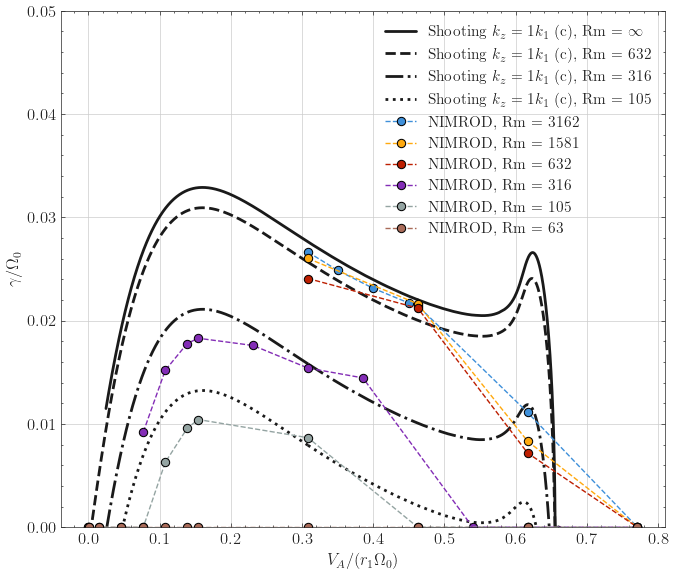

In [56]:
fig = plt.figure(figsize=(7,6))
ax = plt.subplot(111)
color_arr = ['#3F90DA', '#FFA90E', '#BD1F01', '#94A4A2', '#832DB6', '#A96B59', '#E76300', '#B9AC70', '#92DADD']



### RESISTIVE SHOOTING DATA
plt.plot(VA_l_MCI1_Bz,gr_1k1_MCI_l_Bz, 'k', label =f'Shooting $k_z = 1k_1$ (c)' + r', Rm = $\infty$', linewidth=2)
plt.plot(VA_h_MCI1_Bz,gr_1k1_MCI_h_Bz, 'k', linewidth=2)       

# plt.plot(VA_l_MCI1_Bz_ETA1_divr_WKB_div4,gr_1k1_MCI_l_Bz_ETA1_divr_WKB_div4, 'k', label =f'Shooting $k_z = 1k_1$ (c), $\eta = 1$', linewidth=2)
# plt.plot(VA_h_MCI1_Bz_ETA1_divr_WKB_div4,gr_1k1_MCI_h_Bz_ETA1_divr_WKB_div4, 'k', linewidth=2)    

# plt.plot(VA_l_MCI1_Bz_ETA2_divr_WKB_div4,gr_1k1_MCI_l_Bz_ETA2_divr_WKB_div4, 'k', linestyle = '--', label =f'Shooting $k_z = 1k_1$ (c), $\eta = 5$', linewidth=2)
# plt.plot(VA_h_MCI1_Bz_ETA2_divr_WKB_div4,gr_1k1_MCI_h_Bz_ETA2_divr_WKB_div4, 'k', linestyle = '--', linewidth=2)    


plt.plot(VA_l_MCI1_Bz_ETA5_divr_WKB_div4,gr_1k1_MCI_l_Bz_ETA5_divr_WKB_div4, 'k', linestyle = '--', label =f'Shooting $k_z = 1k_1$ (c)' + f', Rm = {int(Rm[2])}', linewidth=2)
plt.plot(VA_h_MCI1_Bz_ETA5_divr_WKB_div4,gr_1k1_MCI_h_Bz_ETA5_divr_WKB_div4, 'k', linestyle = '--', linewidth=2)    


plt.plot(VA_l_MCI1_Bz_ETA30_divr_WKB_div4,gr_1k1_MCI_l_Bz_ETA30_divr_WKB_div4, 'k', linestyle = '-.', label =f'Shooting $k_z = 1k_1$ (c)'+ f', Rm = {int(Rm[3])}', linewidth=2)
plt.plot(VA_h_MCI1_Bz_ETA30_divr_WKB_div4,gr_1k1_MCI_h_Bz_ETA30_divr_WKB_div4, 'k', linestyle = '-.', linewidth=2)    

plt.plot(VA_l_MCI1_Bz_ETA50_divr_WKB_div4,gr_1k1_MCI_l_Bz_ETA50_divr_WKB_div4, 'k', linestyle = ':', label =f'Shooting $k_z = 1k_1$ (c)'+ f', Rm = {int(Rm[4])}', linewidth=2)
plt.plot(VA_h_MCI1_Bz_ETA50_divr_WKB_div4,gr_1k1_MCI_h_Bz_ETA50_divr_WKB_div4, 'k', linestyle = ':', linewidth=2)    



### NIMROD DATA
# plt.plot(VA_N_Arr_ETA1[7:len(VA_N_Arr)], ETA1_arr[7:len(VA_N_Arr)], 'o', label =f'NIMROD$, \eta = 1$', linestyle = '--', color = color_arr[0])    
plt.plot(VA_N_Arr_ETA1[8:len(VA_N_Arr_ETA1)], ETA1_arr[8:len(VA_N_Arr_ETA1)], 'o', label=r'NIMROD, Rm = ' + str(int(Rm[0])), linestyle = '--', color = color_arr[0], markeredgecolor='black', markeredgewidth = 0.75)    

plt.plot(VA_N_Arr[8:len(VA_N_Arr)], ETA2_arr[8:len(VA_N_Arr)], 'o', label=r'NIMROD, Rm = ' + str(int(Rm[1])), linestyle = '--', color = color_arr[1], markeredgecolor='black', markeredgewidth = 0.75)      
plt.plot(VA_N_Arr[8:len(VA_N_Arr)], ETA5_arr[8:len(VA_N_Arr)], 'o', label=r'NIMROD, Rm = ' + str(int(Rm[2])), linestyle = '--', color = color_arr[2], markeredgecolor='black', markeredgewidth = 0.75)   


VA_N_arr_ETA30 = np.array([5,7,9,10,15,20,25, 35, 40, 50])/10000/ np.sqrt(rho*mu_0)/(r1*Omega0)
ETA30_arr = np.array([2910.5, 4802.86, 5624.57, 5785.62, 5563.77, 4872.37, 4571.64, 0, 0 ,0])/Omega0
plt.plot(VA_N_arr_ETA30, ETA30_arr, 'o', label=r'NIMROD, Rm = ' + str(int(Rm[3])), linestyle = '--', color = color_arr[4], markeredgecolor='black', markeredgewidth = 0.75)  

plt.plot(VA_N_Arr, ETA50_arr, 'o', label=r'NIMROD, Rm = ' + str(int(Rm[4])), linestyle = '--', color = color_arr[3], markeredgecolor='black', markeredgewidth = 0.75)  
plt.plot(VA_N_Arr, ETA100_arr, 'o', label=r'NIMROD, Rm = ' + str(int(Rm[5])), linestyle = '--', color = color_arr[5], markeredgecolor='black', markeredgewidth = 0.75)  

plt.xlabel('$V_A/(r_1 \Omega_0)$',fontsize=12)
plt.ylabel(r'$\gamma/\Omega_0$',fontsize=12)
# plt.title('Vertical field growth rates (Resistive shooting vs NIMROD) \n' + r'$q^2(r) = (\pi/4)^2 - i(\pi/4)/r$',fontsize=15)
# plt.xlim(0,0.7)
# plt.ylim(0,0.25)


# plt.text(1.3-0.05-.8, 0.25, '(a)', fontsize=20, color = color_arr[5], fontweight="bold")


# plt.axvline(x=.2, linestyle = '--', color = color_arr[6], linewidth=3)
# plt.text(1.05-.8, 0.3, 'MCI', fontsize=20, color = color_arr[6], fontweight="bold")
# plt.text(-0.03, 0.3, 'MRI', fontsize=20, color = color_arr[6], fontweight="bold")


box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend()
plt.ylim(0,0.05)
# plt.legend()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('Shooting-NIMROD-comp/GRvsAlfvenSpeed-NIMROD-Bz-WKB-v2.png', bbox_inches='tight')
plt.savefig('Shooting-NIMROD-comp/GRvsAlfvenSpeed-NIMROD-Bz-WKB-v2.svg', bbox_inches='tight', format = 'svg')

plt.show()
plt.close()

# MCI MATCH q2 mag pi

<>:57: SyntaxWarning: invalid escape sequence '\O'
<>:57: SyntaxWarning: invalid escape sequence '\O'
C:\Users\Alex\AppData\Local\Temp\ipykernel_29204\1384034370.py:57: SyntaxWarning: invalid escape sequence '\O'
  plt.xlabel('$V_A/(r_1 \Omega_0)$',fontsize=12)


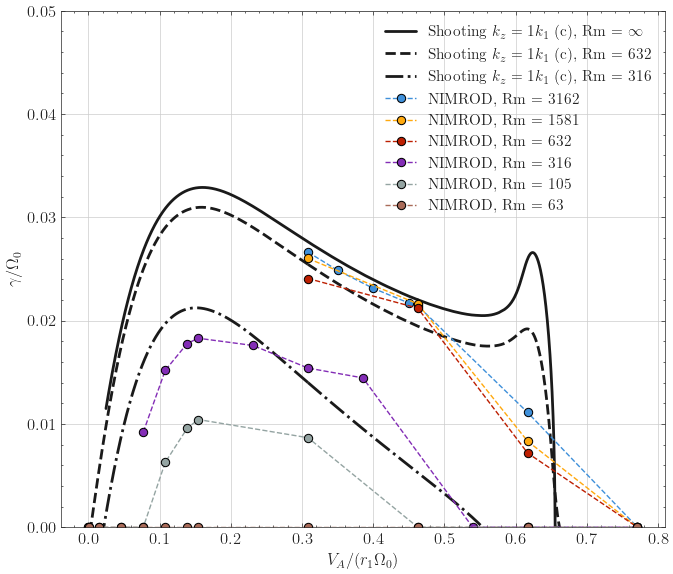

In [59]:
fig = plt.figure(figsize=(7,6))
ax = plt.subplot(111)
color_arr = ['#3F90DA', '#FFA90E', '#BD1F01', '#94A4A2', '#832DB6', '#A96B59', '#E76300', '#B9AC70', '#92DADD']
# color_arr = ['#009e73', '#0072b2', '#56b4e9', '#f0e442', '#e69f00', '#d55e00', '#cc79a7', '#7e2954']

# plt.plot(VA_l_MCI1_Bz,gr_1k1_MCI_l_Bz, 'k', label =f'Shooting $k_z = 1k_1$ (c)', linewidth=2)
# plt.plot(VA_h_MCI1_Bz,gr_1k1_MCI_h_Bz, 'k', linewidth=2)    

# plt.plot(VA_l_MRI6_Bz,gr_6k1_MRI_l_Bz, color = 'k', label =f'Shooting $k_z = 6k_1$', linestyle = (0, (3, 1, 1, 1, 1, 1)), linewidth=2)
# plt.plot(VA_h_MRI6_Bz,gr_6k1_MRI_h_Bz, color = 'k', linestyle = (0, (3, 1, 1, 1, 1, 1)), linewidth=2)    

# plt.plot(VA_l_MRI8_Bz,gr_8k1_MRI_l_Bz, 'k', label =f'Shooting $k_z = 8k_1$', linestyle = '-.', linewidth=2)
# plt.plot(VA_h_MRI8_Bz,gr_8k1_MRI_h_Bz, 'k', linestyle = '-.', linewidth=2)    

# plt.plot(VA_l_MRI10_Bz,gr_10k1_MRI_l_Bz, 'k', label =f'Shooting $k_z = 10k_1$', linestyle = ':', linewidth=2)  
# plt.plot(VA_h_MRI10_Bz,gr_10k1_MRI_h_Bz, 'k', linestyle = ':', linewidth=2)  


# plt.plot(MRI_arr_Bz, MRI_arr, 's', label =f'$k_z > 1k_1$', color = 'k', markersize=10)    
# plt.plot(k1_arr_Bz, k1_arr, 's', label =f'$k_z = 1k_1$', color = color_arr[4], markersize=10) 
# plt.plot(Stable_Arr_Bz, Stable_Arr, 's', label =f'Stable', color = color_arr[6], markersize=10) 



### RESISTIVE SHOOTING DATA
plt.plot(VA_l_MCI1_Bz,gr_1k1_MCI_l_Bz, 'k', label =f'Shooting $k_z = 1k_1$ (c)' + r', Rm = $\infty$', linewidth=2)
plt.plot(VA_h_MCI1_Bz,gr_1k1_MCI_h_Bz, 'k', linewidth=2) 

# plt.plot(VA_l_MCI1_Bz_ETA2_divr_q2magpisq, gr_1k1_MCI_l_Bz_ETA2_divr_q2magpisq, 'k', label =f'Shooting $k_z = 1k_1$ (c), $\eta = 2$', linewidth=2)
# plt.plot(VA_h_MCI1_Bz_ETA2_divr_q2magpisq, gr_1k1_MCI_h_Bz_ETA2_divr_q2magpisq, 'k', linewidth=2)    

plt.plot(VA_l_MCI1_Bz_ETA5_divr_q2magpisq, gr_1k1_MCI_l_Bz_ETA5_divr_q2magpisq, 'k', label =f'Shooting $k_z = 1k_1$ (c)' + f', Rm = {int(Rm[2])}', linewidth=2, linestyle = '--')
plt.plot(VA_h_MCI1_Bz_ETA5_divr_q2magpisq, gr_1k1_MCI_h_Bz_ETA5_divr_q2magpisq, 'k', linewidth=2, linestyle = '--')    

plt.plot(VA_l_MCI1_Bz_ETA30_divr_q2magpisq, gr_1k1_MCI_l_Bz_ETA30_divr_q2magpisq, 'k', label =f'Shooting $k_z = 1k_1$ (c)' + f', Rm = {int(Rm[3])}', linewidth=2, linestyle = '-.')
plt.plot(VA_h_MCI1_Bz_ETA30_divr_q2magpisq, gr_1k1_MCI_h_Bz_ETA30_divr_q2magpisq, 'k', linewidth=2, linestyle = '-.') 
         
# plt.plot(VA_l_MCI1_Bz_ETA50_divr_q2magpisq, gr_1k1_MCI_l_Bz_ETA50_divr_q2magpisq, 'k', label =f'Shooting $k_z = 1k_1$ (c)' + f', Rm = {int(Rm[4])}', linewidth=2, linestyle = ':')
# plt.plot(VA_h_MCI1_Bz_ETA50_divr_q2magpisq, gr_1k1_MCI_h_Bz_ETA50_divr_q2magpisq, 'k', linewidth=2, linestyle = ':')    



### NIMROD DATA
# plt.plot(VA_N_Arr[7:len(VA_N_Arr)], ETA1_arr[7:len(VA_N_Arr)], 'o', label =f'NIMROD$, \eta = 1$', linestyle = '--', color = color_arr[0])
plt.plot(VA_N_Arr_ETA1[8:len(VA_N_Arr_ETA1)], ETA1_arr[8:len(VA_N_Arr_ETA1)], 'o', label=r'NIMROD, Rm = ' + str(int(Rm[0])), linestyle = '--', color = color_arr[0], markeredgecolor='black', markeredgewidth = 0.75)      
plt.plot(VA_N_Arr[8:len(VA_N_Arr)], ETA2_arr[8:len(VA_N_Arr)], 'o', label=r'NIMROD, Rm = ' + str(int(Rm[1])), linestyle = '--', color = color_arr[1], markeredgecolor='black', markeredgewidth = 0.75)     
plt.plot(VA_N_Arr[8:len(VA_N_Arr)], ETA5_arr[8:len(VA_N_Arr)], 'o', label=r'NIMROD, Rm = ' + str(int(Rm[2])), linestyle = '--', color = color_arr[2], markeredgecolor='black', markeredgewidth = 0.75)  


VA_N_arr_ETA30 = np.array([5,7,9,10,15,20,25, 35, 40, 50])/10000/ np.sqrt(rho*mu_0)/(r1*Omega0)
ETA30_arr = np.array([2910.5, 4802.86, 5624.57, 5785.62, 5563.77, 4872.37, 4571.64, 0, 0 ,0])/Omega0
plt.plot(VA_N_arr_ETA30, ETA30_arr, 'o', label=r'NIMROD, Rm = ' + str(int(Rm[3])), linestyle = '--', color = color_arr[4], markeredgecolor='black', markeredgewidth = 0.75)  
plt.plot(VA_N_Arr, ETA50_arr, 'o', label=r'NIMROD, Rm = ' + str(int(Rm[4])), linestyle = '--', color = color_arr[3], markeredgecolor='black', markeredgewidth = 0.75)  

plt.plot(VA_N_Arr, ETA100_arr, 'o', label=r'NIMROD, Rm = ' + str(int(Rm[5])), linestyle = '--', color = color_arr[5], markeredgecolor='black', markeredgewidth = 0.75)  

plt.xlabel('$V_A/(r_1 \Omega_0)$',fontsize=12)
plt.ylabel(r'$\gamma/\Omega_0$',fontsize=12)
# plt.title('Vertical field growth rates (Resistive shooting vs NIMROD) \n' + r'$q^2(r) = (\pi/r)^2$',fontsize=15)
# plt.xlim(0,0.7)
# plt.ylim(0,0.25)


# plt.text(1.3-0.05-.8, 0.25, '(a)', fontsize=20, color = color_arr[5], fontweight="bold")


# plt.axvline(x=.2, linestyle = '--', color = color_arr[6], linewidth=3)
# plt.text(1.05-.8, 0.3, 'MCI', fontsize=20, color = color_arr[6], fontweight="bold")
# plt.text(-0.03, 0.3, 'MRI', fontsize=20, color = color_arr[6], fontweight="bold")


box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend()
plt.ylim(0,0.05)
# plt.legend()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('Shooting-NIMROD-comp/GRvsAlfvenSpeed-NIMROD-Bz-divrpi-v2.png', bbox_inches='tight')
plt.savefig('Shooting-NIMROD-comp/GRvsAlfvenSpeed-NIMROD-Bz-divrpi-v2.svg', bbox_inches='tight', format = 'svg')

plt.show()
plt.close()

# qmagpi WKB Combined

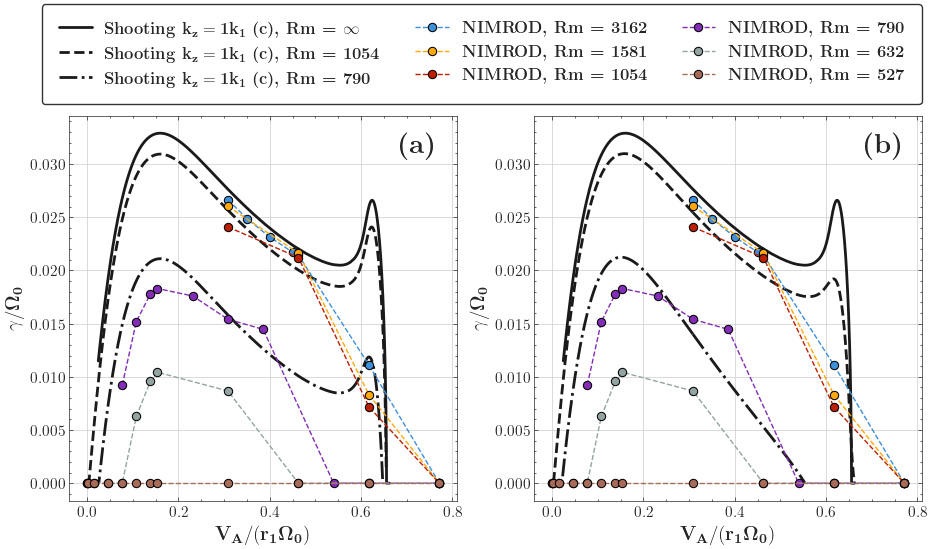

In [62]:
fig, ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(11)

########################################### PLotting 0
ii = np.where(np.array(gr_1k1_MCI_l_Bz_ETA5_divr_q2magpisq) > 0)
VA_l_MCI1_Bz_ETA5_divr_q2magpisq_c = np.array(VA_l_MCI1_Bz_ETA5_divr_q2magpisq)[ii[:]]
gr_1k1_MCI_l_Bz_ETA5_divr_q2magpisq_c = np.array(gr_1k1_MCI_l_Bz_ETA5_divr_q2magpisq)[ii[:]]
ii = np.where(np.array(gr_1k1_MCI_h_Bz_ETA5_divr_q2magpisq) > 0)
VA_h_MCI1_Bz_ETA5_divr_q2magpisq_c = np.array(VA_h_MCI1_Bz_ETA5_divr_q2magpisq)[ii[:]]
gr_1k1_MCI_h_Bz_ETA5_divr_q2magpisq_c = np.array(gr_1k1_MCI_h_Bz_ETA5_divr_q2magpisq)[ii[:]]

ii = np.where(np.array(gr_1k1_MCI_l_Bz_ETA30_divr_q2magpisq) > 0)
VA_l_MCI1_Bz_ETA30_divr_q2magpisq_c = np.array(VA_l_MCI1_Bz_ETA30_divr_q2magpisq)[ii[:]]
gr_1k1_MCI_l_Bz_ETA30_divr_q2magpisq_c = np.array(gr_1k1_MCI_l_Bz_ETA30_divr_q2magpisq)[ii[:]]
ii = np.where(np.array(gr_1k1_MCI_h_Bz_ETA30_divr_q2magpisq) > 0)
VA_h_MCI1_Bz_ETA30_divr_q2magpisq_c = np.array(VA_h_MCI1_Bz_ETA30_divr_q2magpisq)[ii[:]]
gr_1k1_MCI_h_Bz_ETA30_divr_q2magpisq_c = np.array(gr_1k1_MCI_h_Bz_ETA30_divr_q2magpisq)[ii[:]]

### RESISTIVE SHOOTING DATA
ax[1].plot(VA_l_MCI1_Bz,gr_1k1_MCI_l_Bz, 'k', label =r'\textbf{Shooting} $\mathbf{k_z = 1k_1}$ \textbf{(c)}' + r'\textbf{, Rm = }$\mathbf{\infty}$', linewidth=2)
ax[1].plot(VA_h_MCI1_Bz,gr_1k1_MCI_h_Bz, 'k', linewidth=2) 
ax[1].plot(VA_l_MCI1_Bz_ETA5_divr_q2magpisq_c, gr_1k1_MCI_l_Bz_ETA5_divr_q2magpisq_c, 'k', label =r'\textbf{Shooting} $\mathbf{k_z = 1k_1}$ \textbf{(c)}' + r'\textbf{, Rm = 1054}', linewidth=2, linestyle = '--')
ax[1].plot(VA_h_MCI1_Bz_ETA5_divr_q2magpisq_c, gr_1k1_MCI_h_Bz_ETA5_divr_q2magpisq_c, 'k', linewidth=2, linestyle = '--')    
ax[1].plot(VA_l_MCI1_Bz_ETA30_divr_q2magpisq_c, gr_1k1_MCI_l_Bz_ETA30_divr_q2magpisq_c, 'k', label =r'\textbf{Shooting} $\mathbf{k_z = 1k_1}$ \textbf{(c)}' + r'\textbf{, Rm = 790}', linewidth=2, linestyle = '-.')
ax[1].plot(VA_h_MCI1_Bz_ETA30_divr_q2magpisq_c, gr_1k1_MCI_h_Bz_ETA30_divr_q2magpisq_c, 'k', linewidth=2, linestyle = '-.') 

### NIMROD DATA
ax[1].plot(VA_N_Arr_ETA1[8:len(VA_N_Arr_ETA1)], ETA1_arr[8:len(VA_N_Arr_ETA1)], 'o', label=r'\textbf{NIMROD, Rm = 3162}', linestyle = '--', color = color_arr[0], markeredgecolor='black', markeredgewidth = 0.75)      
ax[1].plot(VA_N_Arr[8:len(VA_N_Arr)], ETA2_arr[8:len(VA_N_Arr)], 'o', label=r'\textbf{NIMROD, Rm = 1581}', linestyle = '--', color = color_arr[1], markeredgecolor='black', markeredgewidth = 0.75)     
ax[1].plot(VA_N_Arr[8:len(VA_N_Arr)], ETA5_arr[8:len(VA_N_Arr)], 'o', label=r'\textbf{NIMROD, Rm = 1054}', linestyle = '--', color = color_arr[2], markeredgecolor='black', markeredgewidth = 0.75)  
VA_N_arr_ETA30 = np.array([5,7,9,10,15,20,25, 35, 40, 50])/10000/ np.sqrt(rho*mu_0)/(r1*Omega0)
ETA30_arr = np.array([2910.5, 4802.86, 5624.57, 5785.62, 5563.77, 4872.37, 4571.64, 0, 0 ,0])/Omega0
ax[1].plot(VA_N_arr_ETA30, ETA30_arr, 'o', label=r'\textbf{NIMROD, Rm = 790}', linestyle = '--', color = color_arr[4], markeredgecolor='black', markeredgewidth = 0.75)  
ax[1].plot(VA_N_Arr, ETA50_arr, 'o', label=r'\textbf{NIMROD, Rm = 632}', linestyle = '--', color = color_arr[3], markeredgecolor='black', markeredgewidth = 0.75)  
ax[1].plot(VA_N_Arr, ETA100_arr, 'o', label=r'\textbf{NIMROD, Rm = 527}', linestyle = '--', color = color_arr[5], markeredgecolor='black', markeredgewidth = 0.75)  
ax[1].set_xlabel(r'$\mathbf{V_A/(r_1 \Omega_0)}$',fontsize=14)
ax[1].set_ylabel(r'$\mathbf{\gamma/\Omega_0}$',fontsize=14)

########################################### PLotting 1
ii = np.where(np.array(gr_1k1_MCI_l_Bz_ETA5_divr_WKB_div4) > 0)
VA_l_MCI1_Bz_ETA5_divr_WKB_div4_c = np.array(VA_l_MCI1_Bz_ETA5_divr_WKB_div4)[ii[:]]
gr_1k1_MCI_l_Bz_ETA5_divr_WKB_div4_c = np.array(gr_1k1_MCI_l_Bz_ETA5_divr_WKB_div4)[ii[:]]
ii = np.where(np.array(gr_1k1_MCI_h_Bz_ETA5_divr_WKB_div4) > 0)
VA_h_MCI1_Bz_ETA5_divr_WKB_div4_c = np.array(VA_h_MCI1_Bz_ETA5_divr_WKB_div4)[ii[:]]
gr_1k1_MCI_h_Bz_ETA5_divr_WKB_div4_c = np.array(gr_1k1_MCI_h_Bz_ETA5_divr_WKB_div4)[ii[:]]

ii = np.where(np.array(gr_1k1_MCI_l_Bz_ETA30_divr_WKB_div4) > 0)
VA_l_MCI1_Bz_ETA30_divr_WKB_div4_c = np.array(VA_l_MCI1_Bz_ETA30_divr_WKB_div4)[ii[:]]
gr_1k1_MCI_l_Bz_ETA30_divr_WKB_div4_c = np.array(gr_1k1_MCI_l_Bz_ETA30_divr_WKB_div4)[ii[:]]
ii = np.where(np.array(gr_1k1_MCI_h_Bz_ETA30_divr_WKB_div4) > 0)
VA_h_MCI1_Bz_ETA30_divr_WKB_div4_c = np.array(VA_h_MCI1_Bz_ETA30_divr_WKB_div4)[ii[:]]
gr_1k1_MCI_h_Bz_ETA30_divr_WKB_div4_c = np.array(gr_1k1_MCI_h_Bz_ETA30_divr_WKB_div4)[ii[:]]

ax[0].plot(VA_l_MCI1_Bz,gr_1k1_MCI_l_Bz, 'k', linewidth=2)
ax[0].plot(VA_h_MCI1_Bz,gr_1k1_MCI_h_Bz, 'k', linewidth=2)       
ax[0].plot(VA_l_MCI1_Bz_ETA5_divr_WKB_div4_c,gr_1k1_MCI_l_Bz_ETA5_divr_WKB_div4_c, 'k', linestyle = '--', linewidth=2)
ax[0].plot(VA_h_MCI1_Bz_ETA5_divr_WKB_div4_c,gr_1k1_MCI_h_Bz_ETA5_divr_WKB_div4_c, 'k', linestyle = '--', linewidth=2)    
ax[0].plot(VA_l_MCI1_Bz_ETA30_divr_WKB_div4_c,gr_1k1_MCI_l_Bz_ETA30_divr_WKB_div4_c, 'k', linestyle = '-.', linewidth=2)
ax[0].plot(VA_h_MCI1_Bz_ETA30_divr_WKB_div4_c,gr_1k1_MCI_h_Bz_ETA30_divr_WKB_div4_c, 'k', linestyle = '-.', linewidth=2)    
# plt.plot(VA_l_MCI1_Bz_ETA50_divr_WKB_div4_c,gr_1k1_MCI_l_Bz_ETA50_divr_WKB_div4_c, 'k', linestyle = ':', label =f'Shooting $k_z = 1k_1$ (c)'+ f', Rm = {int(Rm[4])}', linewidth=2)
# plt.plot(VA_h_MCI1_Bz_ETA50_divr_WKB_div4_c,gr_1k1_MCI_h_Bz_ETA50_divr_WKB_div4_c, 'k', linestyle = ':', linewidth=2)    

### NIMROD DATA
ax[0].plot(VA_N_Arr_ETA1[8:len(VA_N_Arr_ETA1)], ETA1_arr[8:len(VA_N_Arr_ETA1)], 'o', linestyle = '--', color = color_arr[0], markeredgecolor='black', markeredgewidth = 0.75)    
ax[0].plot(VA_N_Arr[8:len(VA_N_Arr)], ETA2_arr[8:len(VA_N_Arr)], 'o', linestyle = '--', color = color_arr[1], markeredgecolor='black', markeredgewidth = 0.75)      
ax[0].plot(VA_N_Arr[8:len(VA_N_Arr)], ETA5_arr[8:len(VA_N_Arr)], 'o', linestyle = '--', color = color_arr[2], markeredgecolor='black', markeredgewidth = 0.75)   
VA_N_arr_ETA30 = np.array([5,7,9,10,15,20,25, 35, 40, 50])/10000/ np.sqrt(rho*mu_0)/(r1*Omega0)
ETA30_arr = np.array([2910.5, 4802.86, 5624.57, 5785.62, 5563.77, 4872.37, 4571.64, 0, 0 ,0])/Omega0
ax[0].plot(VA_N_arr_ETA30, ETA30_arr, 'o', linestyle = '--', color = color_arr[4], markeredgecolor='black', markeredgewidth = 0.75)  
ax[0].plot(VA_N_Arr, ETA50_arr, 'o', linestyle = '--', color = color_arr[3], markeredgecolor='black', markeredgewidth = 0.75)  
ax[0].plot(VA_N_Arr, ETA100_arr, 'o', linestyle = '--', color = color_arr[5], markeredgecolor='black', markeredgewidth = 0.75)  
ax[0].set_xlabel(r'$\mathbf{V_A/(r_1 \Omega_0)}$',fontsize=14)
ax[0].set_ylabel(r'$\mathbf{\gamma/\Omega_0}$',fontsize=14)

#######################################################################################
lines_labels = [ax2.get_legend_handles_labels() for ax2 in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

# fig.legend(lines, labels, loc='lower center', ncol=3, 
#            bbox_to_anchor=(0.5, -.2),  # Position the legend below the plot
#            frameon=False,  # Turn on the frame (border)
#            edgecolor='black',  # Set the border color
#            facecolor='white',  # Set the background color of the legend box
#            borderpad=1,  # Padding between the legend text and the border
#            borderaxespad=1, fontsize = 12)

fig.legend(lines, labels, loc='lower center', ncol=3, 
           bbox_to_anchor=(0.5, .87),  # Position the legend below the plot
           frameon=True,  # Turn on the frame (border)
           edgecolor='black',  # Set the border color
           facecolor='white',  # Set the background color of the legend box
           borderpad=1,  # Padding between the legend text and the border
           borderaxespad=1, fontsize = 12)
# ax[0].set_title(r'\textbf{HWKB}', fontsize = 14)
# ax[1].set_title(r'\textbf{MWKB}', fontsize = 14)

ax[0].text(0.85, 0.96, r'\textbf{(a)}', transform=ax[0].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')
ax[1].text(0.85, 0.96, r'\textbf{(b)}', transform=ax[1].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')


plt.savefig('Shooting-NIMROD-comp/GRvsAlfvenSpeed-NIMROD-Bz-comb.pdf', bbox_inches='tight')
plt.show()

# Contour qmagpi

## Init and Freq

In [47]:
import os

path_home = os.getcwd()
b = os.listdir()
# print(b)
# os.chdir('Shooting-AlfvenSweep-Scaled-Data/')
# b = os.listdir()
# os.chdir(path_home)


# print(b)
dt = 1
eta_arr = np.arange(dt, 100 + dt, dt)
r1 = 0.1 # cm to m
V0 = r1*Omega0
Rm = r1*V0/eta_arr
print(eta_arr)
# e = []
# f1 = []
# diff_modes = ['MCI_1k1'] ### ad 10k1 when done
diff_modes = ['MCI_1k1'] ### ad 10k1 when done
diff_modes = ['MCI_1k1', 'MCI_2k1', 'MRI_6k1', 'MRI_8k1', 'MRI_10k1'] ### ad 10k1 when done
diff_modes = ['MCI_1k1', 'MCI_2k1', 'MRI_6k1','MRI_8k1', 'MRI_10k1'] ### ad 10k1 when done
diff_modes = ['MRI_2k1']
diff_modes = ['MRI_3k1']
diff_modes = ['MRI_4k1']
diff_modes = ['MRI_5k1']
diff_modes = ['MCI_3k1']

diff_modes = ['MCI_1k1', 'MCI_2k1','MCI_3k1','MRI_4k1', 'MRI_6k1','MRI_8k1','MRI_10k1'] ### ad 10k1 when done
print(len(diff_modes))
print(len(diff_modes))

# str_fit = f'Shooting-AlfvenSweep-Scaled-Data/' + diff_modes[0] + '_guessesu_'
# print(len(str_fit))
# # print(b)
# matches = [int(x[50:]) for x in b if x[:50] == str_fit]
# print(matches)

e = []
f1 = []
for k in range(0,len(diff_modes)):
    d = []
    d1 = []

    if(diff_modes[k] ==  'MCI_2k1'):
        eta_arr = np.arange(1, 92 + dt, dt)
    elif(diff_modes[k] ==  'MCI_3k1'):
        eta_arr = np.arange(1, 90 + dt, dt)
    elif(diff_modes[k] ==  'MRI_4k1'):
        eta_arr = np.arange(1, 53 + dt, dt)
    elif(diff_modes[k] ==  'MRI_6k1'):
        eta_arr = np.arange(1, 78 + dt, dt)
    elif(diff_modes[k] ==  'MRI_8k1'):
        eta_arr = np.arange(1, 70 + dt, dt)
    elif(diff_modes[k] ==  'MRI_10k1'):
        eta_arr = np.arange(1, 56 + dt, dt)
    else:
        eta_arr = np.arange(dt, 100 + dt, dt)
        
        
    for l in eta_arr:
        # print(l)
        elecd_str = f'{l}'
    
        guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/' + diff_modes[k] + '_guessesu_' + elecd_str + '-kep-Bz-res-divr-q2magpisq.pkl'
        guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/' + diff_modes[k] + '_guessesd_' + elecd_str + '-kep-Bz-res-divr-q2magpisq.pkl'
        VA_u = f'Shooting-AlfvenSweep-Scaled-Data/' + diff_modes[k] + '_VANUP_' + elecd_str + '-kep-Bz-res-divr-q2magpisq.pkl'
        VA_d = f'Shooting-AlfvenSweep-Scaled-Data/' + diff_modes[k] + '_VANDOWN_' + elecd_str + '-kep-Bz-res-divr-q2magpisq.pkl'

    
        with open(guesses_str_d, 'rb') as f:
            guesses_1k1_MCI_l = pickle.load(f)    
        with open(guesses_str_u, 'rb') as f:
            guesses_1k1_MCI_h = pickle.load(f)    
        
        with open(VA_d, 'rb') as f:
            VA_l_MCI1_Bz_ETA1_divr_WKB_div4 = pickle.load(f)    
        with open(VA_u, 'rb') as f:
            VA_h_MCI1_Bz_ETA1_divr_WKB_div4 = pickle.load(f)   
            
        gr_1k1_MCI_l_Bz_ETA1_divr_WKB_div4= []
        gr_1k1_MCI_h_Bz_ETA1_divr_WKB_div4 = []
        for j in range(0,len(guesses_1k1_MCI_l)):
            gr_1k1_MCI_l_Bz_ETA1_divr_WKB_div4.append(guesses_1k1_MCI_l[j].imag)
        for j in range(0,len(guesses_1k1_MCI_h) ):
            gr_1k1_MCI_h_Bz_ETA1_divr_WKB_div4.append(guesses_1k1_MCI_h[j].imag)    
        freq_1k1_MCI_l_Bz_ETA1_divr_WKB_div4 = []
        freq_1k1_MCI_h_Bz_ETA1_divr_WKB_div4 = []
        for j in range(0,len(guesses_1k1_MCI_l)):
            freq_1k1_MCI_l_Bz_ETA1_divr_WKB_div4.append(guesses_1k1_MCI_l[j].real)
            
        for j in range(0,len(guesses_1k1_MCI_h)):
            freq_1k1_MCI_h_Bz_ETA1_divr_WKB_div4.append(guesses_1k1_MCI_h[j].real)
    
        # gr_tot = np.concat((gr_1k1_MCI_l_Bz_ETA1_divr_WKB_div4[100:len(gr_1k1_MCI_h_Bz_ETA1_divr_WKB_div4)], gr_1k1_MCI_h_Bz_ETA1_divr_WKB_div4))
        # # print(len(VA_d))
        # # print(len(VA_u))
        # VA_N_total = np.concat((VA_l_MCI1_Bz_ETA1_divr_WKB_div4[100:len(VA_h_MCI1_Bz_ETA1_divr_WKB_div4)], VA_h_MCI1_Bz_ETA1_divr_WKB_div4))
    
        # gr_tot = np.concat(((gr_1k1_MCI_l_Bz_ETA1_divr_WKB_div4[1:len(gr_1k1_MCI_h_Bz_ETA1_divr_WKB_div4)]), gr_1k1_MCI_h_Bz_ETA1_divr_WKB_div4))
        # VA_N_total = np.concat(((VA_l_MCI1_Bz_ETA1_divr_WKB_div4[1:len(VA_h_MCI1_Bz_ETA1_divr_WKB_div4)]), VA_h_MCI1_Bz_ETA1_divr_WKB_div4))
    
        e12 = np.zeros(len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4) + len(VA_h_MCI1_Bz_ETA1_divr_WKB_div4) - 1)
        f12 = np.zeros(len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4) + len(VA_h_MCI1_Bz_ETA1_divr_WKB_div4) - 1)
        VA12 = np.zeros(len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4) + len(VA_h_MCI1_Bz_ETA1_divr_WKB_div4) - 1)
        # e12[0:len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4)] = np.flip(gr_1k1_MCI_l_Bz_ETA1_divr_WKB_div4[:])
        # VA12[0:len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4)] = np.flip(VA_l_MCI1_Bz_ETA1_divr_WKB_div4[:])
        e12[0:len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4)] = np.flip(gr_1k1_MCI_l_Bz_ETA1_divr_WKB_div4[:])
        f12[0:len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4)] = np.flip(freq_1k1_MCI_l_Bz_ETA1_divr_WKB_div4[:])
        VA12[0:len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4)] = np.flip(VA_l_MCI1_Bz_ETA1_divr_WKB_div4[:])
    
        e12[len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4):len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4) + len(VA_h_MCI1_Bz_ETA1_divr_WKB_div4)-1] = gr_1k1_MCI_h_Bz_ETA1_divr_WKB_div4[1:len(gr_1k1_MCI_h_Bz_ETA1_divr_WKB_div4)]
        f12[len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4):len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4) + len(VA_h_MCI1_Bz_ETA1_divr_WKB_div4)-1] = freq_1k1_MCI_h_Bz_ETA1_divr_WKB_div4[1:len(gr_1k1_MCI_h_Bz_ETA1_divr_WKB_div4)]
        VA12[len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4):len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4) + len(VA_h_MCI1_Bz_ETA1_divr_WKB_div4)-1] = VA_h_MCI1_Bz_ETA1_divr_WKB_div4[1:len(VA_h_MCI1_Bz_ETA1_divr_WKB_div4)]
    
        VA_N_total = VA12
        gr_tot = e12
        # print(len(gr_tot))
        # print(j)
        d.append(gr_tot)
        d1.append(f12)

    # print(len(d))
    e.append(d)
    f1.append(d1)
eta_arr = np.arange(dt, 100 + dt, dt)
e11 = np.zeros((len(gr_tot), len(eta_arr), len(diff_modes)))
f11 = np.zeros((len(gr_tot), len(eta_arr), len(diff_modes)))

# print(len(d))
print(np.shape(e11))
for k in range(0,len(diff_modes)):
    len_eta = len(e[k])
    for j in range(0,len_eta):
        # print(e[k][j])
        # print(k)
        # print(j)
        # # print(len(e[k][j]))
        # print(len(e[k][j]))
        # print(k)
        # print(j)
        e11[0:len(e[k][j]),j,k] = e[k][j][:]
        f11[0:len(f1[k][j]),j,k] = f1[k][j][:]

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
7
7
(1602, 100, 7)


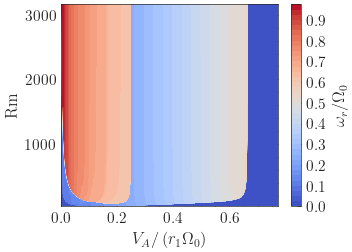

In [48]:
e11_ii = np.where(e11 <= 0)
e11[e11_ii[:]] = 0



### Take slices of maximum gr at given freq:
gr_ijk = np.zeros((len(gr_tot), len(eta_arr)))
gr_ijk_ii = np.zeros((len(gr_tot), len(eta_arr)))
freq_ijk = np.zeros((len(gr_tot), len(eta_arr)))
for i in range(0,np.shape(e11)[0]):
    for j in range(0,np.shape(e11)[1]):
        for k in range(0,np.shape(e11)[2]):
            if(e11[i,j,k] > gr_ijk[i,j]):
                gr_ijk[i,j] = e11[i,j,k]
                gr_ijk_ii[i,j] = k+1
                freq_ijk[i,j] = f11[i,j,k]
                

### RM 
r1 = 0.1 # cm to m
V0 = r1*Omega0
Rm = r1*V0/eta_arr

fig = plt.figure()
plt.contourf(VA_N_total, Rm, np.transpose((freq_ijk)),40, cmap ='coolwarm')
plt.ylabel(r'Rm')
plt.xlabel(r'$V_A/\left(r_1\Omega_0\right)$')
# Add a colorbar
cbar = plt.colorbar()
# Add a label to the colorbar
cbar.set_label(r'$\omega_r/\Omega_0$')
# plt.title(r'Dominant Mode at fixed Rm and $V_A$')
plt.savefig('Rm-vA-Kep-freq-qmagpi.png', dpi = 400)
plt.savefig('Rm-vA-Kep-freq-qmagpi.svg', format = 'svg')

plt.show()


## Eta vs VA

7
[0. 1. 2. 3. 4. 5. 6. 7.]


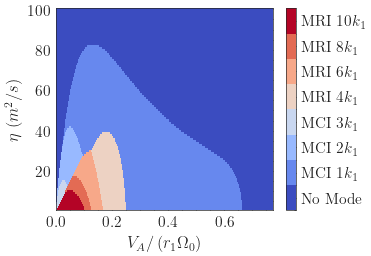

In [49]:
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
gr_ijk_ii_plot = np.transpose(gr_ijk_ii)

nticks = len(diff_modes) 
levels_arr = np.zeros(len(diff_modes)+1)
ticks_arr = np.zeros(len(diff_modes)+1)
for j in range(0, len(diff_modes)+1):
    ticks_arr[j] = j
    levels_arr[j] = j
print(nticks)
print(ticks_arr)

ticks_arr = ticks_arr +0.5
# print(ti
levels = [0,1,2,3,4,5,6,7,8]
# levels = [0,1,2,3,4,5,6,7,8,9,10,11]
# pick the desired colormap, sensible levels, and define a normalization
# instance which takes data values and translates those into levels.
cmap = plt.colormaps['coolwarm']
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

plt.figure()

contour = plt.pcolormesh(VA_N_total, eta_arr, gr_ijk_ii_plot, cmap=cmap, norm=norm)
# cbar = plt.colorbar(im, ax=ax0)
cbar = plt.colorbar(contour,  ticks=ticks_arr)
cbar.ax.set_yticklabels(['No Mode', r'MCI $1k_1$', r'MCI $2k_1$', r'MCI $3k_1$', r'MRI $4k_1$', r'MRI $6k_1$', r'MRI $8k_1$', r'MRI $10k_1$'])
# cbar.ax.set_yticklabels(['No Mode', r'MCI $1k_1$', r'MCI $2k_1$',  r'MCI $3k_1$',  r'MRI $2k_1$',  r'MRI $3k_1$',  r'MRI $4k_1$',  r'MRI $5k_1$', r'MRI $6k_1$', r'MRI $8k_1$', r'MRI $10k_1$'])

plt.ylabel(r'$\eta$  $(m^2/s)$')
plt.xlabel(r'$V_A/\left(r_1\Omega_0\right)$')
# plt.title(r'Dominant Mode at fixed $\eta$ and $V_A$')
plt.savefig('Eta-vA-Kep-dommode-qmagpi.png', dpi = 400)
# plt.savefig('Eta-vA-Kep-dommode-qmagpi.svg', format = 'svg')

plt.show()


In [50]:
j_mark = 0
k_mark = 0
gr_ii = np.where(gr_ijk_ii_plot == 1)
# print(gr_ii)
# print(np.where(gr_ii[0] == np.max(gr_ii[0])))
# print(gr_ii)

VA_N_total[gr_ii[1][:]]
# print(eta_arr[gr_ii[0][:]])
print(np.max((eta_arr[gr_ii[0][:]])))
jj = np.where(eta_arr[gr_ii[0][:]] == np.max(eta_arr[gr_ii[0][:]]))
# print(jj)
kk = VA_N_total[gr_ii[1][:]][jj[:]]
# print(kk)
# VAm = VA_N_total[jj[:]][0]
# VAm = VA_N_total[gr_ii[1][:]][jj[:]][0]
# VAm = VA_N_total[jj[:]][0]
VAm = kk[0]
print(VAm)
Rmm = r1**2*Omega0/np.max((eta_arr[gr_ii[0][:]]))
print(f'Minimum Rm: {Rmm}')

82
0.11278966074102202
Minimum Rm: 38.56436170937048


## Rm vs VA

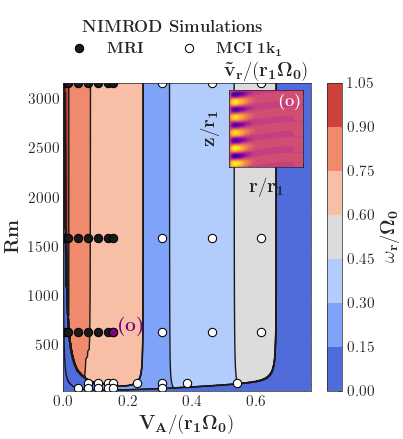

In [51]:
################ Zoom
# import seaborn
# seaborn.set_theme()
cmap = 'coolwarm'
fig,ax2 = plt.subplots(1)
ax2.set(xlabel=r'$V_A/(r_1\Omega_0)$', ylabel=r"Rm")
ax2.set_xlabel(r'$\mathbf{V_A/(r_1\Omega_0)}$', fontsize = 14)
ax2.set_ylabel(r'\textbf{Rm}', fontsize = 14)

fig.set_figheight(4)
fig.set_figwidth(4)

contour = plt.contourf(VA_N_total, Rm, np.transpose((freq_ijk)), 7, cmap=cmap)
cbar = plt.colorbar()
cbar.set_label(r'$\mathbf{\omega_r/\Omega_0}$', fontsize = 14)
plt.contour(contour, colors='k')

### MRI Points
plt.plot(VA_N_Arr[1:8], r1**2*Omega0/(1)*np.ones(len(VA_N_Arr[1:8])), 'o', color = 'k', label = r'\textbf{MRI}', markeredgecolor='black', markeredgewidth = 0.75)    
plt.plot(VA_N_Arr[1:8], r1**2*Omega0/(2)*np.ones(len(VA_N_Arr[1:8])), 'o', color = 'k', markeredgecolor='black', markeredgewidth = 0.75)    
plt.plot(VA_N_Arr[1:8], r1**2*Omega0/(5)*np.ones(len(VA_N_Arr[1:8])), 'o', color = 'k', markeredgecolor='black', markeredgewidth = 0.75)   
### NIMROD DATA
plt.plot(VA_N_Arr[8:len(VA_N_Arr)-1], r1**2*Omega0/(1)*np.ones(len(VA_N_Arr[8:len(VA_N_Arr)-1])), 'o', color = 'w', markeredgecolor='black', markeredgewidth = 0.75)    
plt.plot(VA_N_Arr[8:len(VA_N_Arr)-1], r1**2*Omega0/(2)*np.ones(len(VA_N_Arr[8:len(VA_N_Arr)-1])), 'o', color = 'w', markeredgecolor='black', markeredgewidth = 0.75)    
plt.plot(VA_N_Arr[8:len(VA_N_Arr)-1], r1**2*Omega0/(5)*np.ones(len(VA_N_Arr[8:len(VA_N_Arr)-1])), 'o', color = 'w', markeredgecolor='black', markeredgewidth = 0.75)    
plt.plot(VA_N_arr_ETA30[0:len(VA_N_arr_ETA30)-2], r1**2*Omega0/(30)*np.ones(len(VA_N_arr_ETA30[0:len(VA_N_arr_ETA30)-2])), 'o', color = 'w', label = r'\textbf{MCI} ' +  r'$\mathbf{1k_1}$', markeredgecolor='black', markeredgewidth = 0.75) 
plt.plot(VA_N_Arr[3:len(VA_N_Arr)-3], r1**2*Omega0/(50)*np.ones(len(VA_N_Arr[3:len(VA_N_Arr)-3])), 'o', color = 'w', markeredgecolor='black', markeredgewidth = 0.75) 

######### special point
Bz = 10
VA_Np = Bz/(r1*Omega0*np.sqrt(rho*mu_0)*10000)
Rmp = r1**2*Omega0/(5)
plt.plot(VA_Np, Rmp, 'o', color = 'purple', markeredgecolor='black', markeredgewidth = 0.75)   
plt.text(VA_Np + 0.02, Rmp+6, r'\textbf{(o)}', fontsize=14, color='purple', fontweight='bold')




ax_inset = inset_axes(ax2, width="30%", height="25%", loc='upper right')
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.axes.yaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 14)
ax_inset.set_ylabel(r'$\mathbf{z/r_1}$', fontsize = 14)
cp2=ax_inset.contourf(rc/0.1,zc/0.1, Vr_Eta5_10G,20, cmap='plasma')
ax_inset.set_title(r"$\mathbf{\tilde{v}_r/(r_1\Omega_0)}$", fontsize = 14, pad = 10)
ax_inset.text(0.67, 0.96, r'\textbf{(o)}', transform=ax_inset.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color = 'w')


#######################################################################################


lines_labels = [ax2.get_legend_handles_labels() for ax2 in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
# fig.legend(lines, labels, loc='lower center', ncol=2, 
#            bbox_to_anchor=(0.5, -0.15),  # Position the legend below the plot
#            frameon=False,  # Turn on the frame (border)
#            edgecolor='black',  # Set the border color
#            facecolor='white',  # Set the background color of the legend box
#            borderpad=1,  # Padding between the legend text and the border
#            borderaxespad=1)

fig.legend(lines, labels, loc='lower center', ncol=2, 
           bbox_to_anchor=(0.4, +.87),  # Position the legend below the plot
           frameon=False,  # Turn on the frame (border)
           edgecolor='black',  # Set the border color
           facecolor='white',  # Set the background color of the legend box
           borderpad=1,  # Padding between the legend text and the border
           borderaxespad=1,title=r"\textbf{NIMROD Simulations}")

plt.savefig('Rm-vA-Kep-freq-qmagpi.png', dpi = 400)
plt.savefig('Rm-vA-Kep-freq-qmagpi.svg', format = 'svg')
plt.savefig('Rm-vA-Kep-freq-qmagpi.pdf')

plt.show()

In [52]:

def shoot_hain_v3(w, eta, Pm, qr, qrp, qi, qip,  k=np.pi/2, m=1, B0=0, Bz = 0, keplerian=True, cc=1, r2=5, max=500, q=1/2):
    ## DIFF IS INCLUDES IMAG
    y0 = [0.,1.+1.j]
    y = integ.solve_ivp(shoot_setup_hain_v2, [1,r2**2], y0, args=(w,eta, Pm, qr, qrp, qi, qip, m,k,B0,Bz, keplerian,cc, q), max_step=24./(max/r2))
    r = np.sqrt(y.t)
    u = y.y[0]
    return ((u/r)[-1])

### REDONE DERIVATION
def shoot_setup_hain_v2(x, y, w, elecd, Pm, k2rs, k2rps, k2is, k2ips, m, kz=np.pi/4, B0=60, Bz=12.967, keplerian=True, cc=1, q=1/2):
    mu_0 = 1.2566*10**(-6)
     ### PM = 1
    r = np.sqrt(x)
    k2 = k2rs(r) + 1j*k2is(r)
    k2p = k2rps(r) + 1j*k2ips(r)
    vp1 = 1
    if keplerian == True:
        W = vp1 / r**(3/2)
        Wp = -3/2 * vp1 / r**(5/2)
        Wpp = 5/2 * 3/2 * vp1 / r ** (7/2)
    elif keplerian == 'khalzov':
        W = vp1/x
        Wp = -vp1/x**2
    elif keplerian == 'rigid':
        W = vp1
        Wp = 0
    elif keplerian == 'Sh2':
        W = vp1/r**2
        Wp = -2*vp1/r**3
        Wpp = 6*vp1/r**4
    elif keplerian == False:
        vp = vp1/(x**(q/2))
        W = vp/r
        Wp = (-1*(q+1)/2)*(W/x)
    elif keplerian == 'saturated':
        A0 = 1.4923889E-02
        A1 = -1.0114824E-01
        A2 = 8.5753488E-02
        A3 = -2.8021088E-02
        A4 = -4.7882189E-01
        A5 = 1.0877462E-01
        A6 = 6.7857446E+00
        A7 = -5.0846913E+00
        A8 = -4.3114342E+01
        A9 = 5.2943846E+01
        A10 = 1.2219068E+02
        A11 = -1.9185099E+02
        A12 = -1.7535573E+02
        A13 = 3.4808679E+02
        A14 = 1.1975807E+02
        A15 = -3.4500839E+02
        A16 =  -1.4844420E+01
        A17 = 1.7930272E+02
        A18 = -2.5033736E+01
        ###  0.08875 + 0.91125/r^2 
        W = 0.08875 + 0.91125/r**2 + A0 + A1*(r-2) + A2*(r-2)**2+A3*(r-2)**3 + A4*(r-2)**4 + A5*(r-2)**5 + A6*(r-2)**6 + A7*(r-2)**7 + A8*(r-2)**8 + A9*(r-2)**9 + A10*(r-2)**10 + A11*(r-2)**11 + A12*(r-2)**12 + A13*(r-2)**13 + A14*(r-2)**14 + A15*(r-2)**15 + A16*(r-2)**16 + A17*(r-2)**17 + A18*(r-2)**18 - ( A1 + A3 + A5 + A7 + A9 + A11 + A13 + A15 + A17 )*(r-2)**19 - ( A0 + A2 + A4 + A6 + A8 + A10 + A12 + A14 + A16 + A18 )*(r-2)**20
        Wp = - 2 * 0.91125/r**3  + A1 + 2*A2*(r-2) + 3*A3*(r-2)**2 + 4*A4*(r-2)**3 + 5*A5*(r-2)**4 + 6*A6*(r-2)**5 + 7*A7*(r-2)**6 + 8*A8*(r-2)**7 + 9*A9*(r-2)**8 + 10*A10*(r-2)**9 + 11*A11*(r-2)**10 + 12*A12*(r-2)**11 + 13*A13*(r-2)**12 + 14*A14*(r-2)**13 + 15*A15*(r-2)**14 + 16*A16*(r-2)**15 + 17*A17*(r-2)**16 + 18*A18*(r-2)**17 - 19*( A1 + A3 + A5 + A7 + A9 + A11 + A13 + A15 + A17 )*(r-2)**18 - 20*( A0 + A2 + A4 + A6 + A8 + A10 + A12 + A14 + A16 + A18 )*(r-2)**19
        Wpp = 3 * 2 * 0.91125/r**4  + 2*A2 + 3 * 2 * A3*(r-2) + 4 * 3 * A4*(r-2)**2 + 5 * 4 * A5*(r-2)**3 + 6 * 5 * A6*(r-2)**4 + 7 * 6 * A7*(r-2)**5 + 8 * 7 * A8*(r-2)**6 + 9 * 8 * A9*(r-2)**7 + 10 * 9  * A10*(r-2)**8 + 11 * 10 * A11*(r-2)**9 + 12 * 11 * A12*(r-2)**10 + 13 * 12 * A13*(r-2)**11 + 14 * 13 * A14*(r-2)**12 + 15 * 14 * A15*(r-2)**13 + 16 * 15 * A16*(r-2)**14 + 17 * 16 * A17*(r-2)**15 + 18 * 17 * A18*(r-2)**16 - 19 * 18 * ( A1 + A3 + A5 + A7 + A9 + A11 + A13 + A15 + A17 )*(r-2)**17 - 20 * 19 * ( A0 + A2 + A4 + A6 + A8 + A10 + A12 + A14 + A16 + A18 )*(r-2)**18 
        
    elif keplerian == 'saturated2':
        W = W_f(r)
        Wp = Wp_f(r)
        Wpp = Wpp_f(r)
    elif keplerian == 'tanh':
        a = c = b = d = 1
        d = 0.85
        W = d*np.tanh(-c*r+a)+b
        Wp = -c * d * (1/np.cosh(-c * r + a))**2
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
    elif keplerian == 'tanhv3':
        a = c = b = d = 1
        d = 0.84
        W = d*np.tanh(-c*r+a)+b
        Wp = -c * d * (1/np.cosh(-c * r + a))**2
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
    elif keplerian == 'tanhv4':
        a = c = b = d = 1
        a = 0.6
        c = a
        d = 0.9
        W= d*np.tanh(-c*r+a)+b
        Wp = -c * d * (1/np.cosh(-c * r + a))**2
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
    elif keplerian == 'mKep':
        r10 = 1.5
        R0 = 1

        if(r < r10):
            W = 1
            Wp = 0
            Wpp = 0
        else:
            W = 1/(1+((r-r10)/R0)**(3/2))
            Wp = -3/(2*R0)*((r-r10)/R0)**(1/2)/(1+((r-r10)/R0)**(3/2))**2
            u = 1+((r-r10)/R0)**(3/2)
            up = 3/(2*R0)*((r-r10)/R0)**(1/2)
            Wpp = -( (3/(4*R0**2)*(1/R0*(r-r10))**(-1/2))*u**2 - (3/(2*R0) * (1/R0*(r-r10))**(1/2))*2*u*up)/(u**4)
    elif keplerian == 'mKep2':
        r10 = 1.5
        R0 = 1.5

        if(r < r10):
            W = 1
            Wp = 0
            Wpp = 0
        else:
            W = 1/(1+((r-r10)/R0)**(3/2))
            Wp = -3/(2*R0)*((r-r10)/R0)**(1/2)/(1+((r-r10)/R0)**(3/2))**2
            u = 1+((r-r10)/R0)**(3/2)
            up = 3/(2*R0)*((r-r10)/R0)**(1/2)
            Wpp = -( (3/(4*R0**2)*(1/R0*(r-r10))**(-1/2))*u**2 - (3/(2*R0) * (1/R0*(r-r10))**(1/2))*2*u*up)/(u**4)
        
    # Define Normalizations
    r1 = 0.1

    ## Define OMEGA0:
    bb = 10000
    v0 = bb/np.sqrt(r1)
    Omega0 = v0/r1

    vAp1 = B0/(r1*Omega0*np.sqrt(rho*mu_0)*10000)
    
    vAp = vAp1/np.sqrt(x)
    vAz = Bz / (r1*Omega0*np.sqrt(rho*mu_0)*10000)
    
    ### MODIFY w
    wA = (m/np.sqrt(x))*vAp + kz*vAz
    wb = w-m*W
    wc = 2*vAp/np.sqrt(x)*cc
    
    wAp = -m*vAp1/x**2*2*r
    wcp = -2*vAp1/x**2*cc*2*r


    # elecd = elecd / (r1**2*Omega0)*2
    elecd = elecd / (r1**2*Omega0)
    nu = elecd*Pm

    ### Note this is k2p with respect to r.
    wbp = -m*Wp
    wbpp = -m*Wpp
    lnu = -1j*wb + nu*k2
    lnup = -1j*wbp + nu*k2p
    leta = -1j*wb + elecd*k2
    letap = -1j*wbp + elecd*k2p
    
    L = lnu + wA**2/(leta)
    Lp = lnup + 2*wA*wAp/leta - wA**2*letap/(leta**2)
    h2 = kz**2 + m**2/r**2
    h = np.sqrt(h2)
    hp = -1/h*(m**2/r**3)
    E = L**2 + L*r/leta * wc * (1j*wA*Wp/leta - 1/2*wcp) + 2*(W - 1j*1/2*wc*wA/leta)*(2*W + (1+wA**2/leta**2)*r*Wp - 1j*wA*wc/leta)
    f = 2*r**2*(leta*lnu + wA**2)/((kz**2*r**2+m**2))
    fp = 1/(kz**2*r**2+m**2) * (4*r*(leta*lnu + wA**2) +2*r**2*(letap*lnu+leta*lnup + 2*wA*wAp)) - 1/(kz**2*r**2+m**2)**2 * (4*kz**2*r**3*(lnu*leta + wA**2))
    s = (1j*m*(lnu - leta)/(h**2*r)*Wp)
    g_dr_num_undiff = ((leta - lnu) * r * Wp + 2*(W*leta - 1/2*1j*wc*wA)) ## modified
    g_dr_num_diff = (letap - lnup) * r * Wp + (leta - lnu)*(Wp + r*Wpp) + 2*(Wp*leta + W*letap - 1/2*1j*wcp*wA - 1/2*1j*wc*wAp)
    g_dr_denom_undiff = h**2*r**2
    g_dr_denom_diff = 2*h*hp*r**2 + 2*h**2*r
    g_dr_term = 1j*m*(g_dr_num_diff/g_dr_denom_undiff - g_dr_num_undiff*g_dr_denom_diff/g_dr_denom_undiff**2)

    g = g_dr_term + E*leta/(L*r) - (W - 1j*1/2*wc*wA/leta)*(2*m**2/(L*h**2*r**3))*((leta - lnu)*r*Wp + 2*(W*leta - 1j * 1/2*wA*wc))

    u, du = y

    ### REWRITE ALL TERMS
    f = leta*L/(h**2*r)
    fp = (letap*L + leta*Lp)/(h**2*r) - leta*L*(2*h*hp*r+h**2)/(h**2*r)**2

    u_coeff = 1/(-4*r)*-g
    du_coeff = -1/(4*r)*(2*(f+r*fp)) - s/(2)
    d2u_coeff = -r*f
    dudx = [du, (1/d2u_coeff)*(-du_coeff*du - u_coeff*u)]

    return dudx


      converged: True
           flag: converged
 function_calls: 4
     iterations: 3
           root: (0.6620712067966248+0.23191660355489935j)
         method: secant


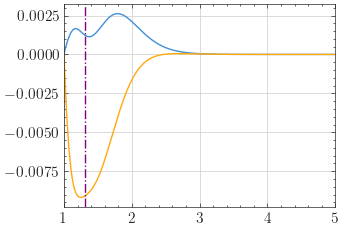

In [54]:
# Get mode structure for MRI 1k1 (Kep.)
##### SET PARAMETERS #####
color_arr = ['#3F90DA', '#FFA90E', '#BD1F01', '#94A4A2', '#832DB6', '#A96B59', '#E76300', '#B9AC70', '#92DADD']

r1 = 0.1
q = 1/2
type = 'MRI'
elecd = 5
eta = elecd
Pm = 1
m = 1
kn = 5
kz = kn*np.pi/(4)
Bz = 10
VA_N =  Bz /(r1*Omega0*np.sqrt(rho*mu_0)*10000)

B0 = 0


r1 = 1
r2 = 5
r3 = 5.5
rp = np.linspace(0.1, r3, 50000)

r = np.linspace(r1, r2, 500)
q_mag = np.pi**2
q2r_sc = q_mag*1/r**2
q2rp_sc = q_mag*(-2/r**3)
q2rpp_sc = q_mag*(6/r**4)
q2i_sc = q_mag*np.zeros(len(r))
q2ip_sc = q_mag*np.zeros(len(r))
q2ipp_sc = q_mag*np.zeros(len(r))

ones_arr = np.ones(len(r)) 
k2 = (q2r_sc + 1j*q2i_sc) + m**2/r**2 + kz**2 * ones_arr
k2p = ((q2rp_sc + 1j*q2ip_sc) - 2 * m**2/r**3) ## just changed from d/dr
k2pp = ((q2rpp_sc + 1j*q2ipp_sc) + 6 * m**2/r**4) ## just changed from d/dr

k2r_curr = i2.CubicSpline(r, k2.real)
k2i_curr = i2.CubicSpline(r, k2.imag)
k2rp_curr = i2.CubicSpline(r, k2p.real)
k2ip_curr = i2.CubicSpline(r, k2p.imag)
k2rpp_curr = i2.CubicSpline(r, k2pp.real)
k2ipp_curr = i2.CubicSpline(r, k2pp.imag)

reso = 50000
############## Kep
##### SET PARAMETERS #####
flow_type = 'Kep'

if(flow_type == 'Kep'):
    flow_select = True
elif(flow_type == 'Tanh'):
    flow_select = 'tanh'
elif(flow_type == 'Sat'):
    flow_select = 'saturated'
elif(flow_type == 'Sh2'):
    flow_select = 'Sh2'

guess = 0.6620712067971332+0.23191660355496704j
guess_MCI = guess
result = o.root_scalar(shoot_hain_v3, method='secant', x0=guess*(1.00005+1e-6j), x1=guess*(0.99995-1e-6j), args=(eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, kz, m, B0, Bz, flow_select, 1, r2,reso), maxiter=5000)
guess0 = result.root
y0 = [0.,(1.+1j)*1e-1]  
y = integ.solve_ivp(shoot_setup_hain_v2, [1,r2**2], y0, args=(guess,eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, m,kz,B0,Bz,flow_select, 1), max_step=24./reso)
r_Kep_MRI = np.sqrt(y.t)
u_Kep_MRI = y.y[0]
r_vec_Kep_MRI = shr.resonance_res_krcomp_v8(r2, guess0, m, eta, Pm, k2r_curr, k2i_curr, kz, Bz, B0,flow_select, q)
print(result)


k2 = k2r_curr(r_Kep_MRI) + 1j*k2i_curr(r_Kep_MRI)
W = 1/r_Kep_MRI**(3/2)
lamb = -1j*guess
l_eta = lamb + 1j*m*W + eta/(r1**2*Omega0)*(k2)
vr = -l_eta*u_Kep_MRI/r_Kep_MRI

plt.figure()
plt.plot(r_Kep_MRI, vr.real, color = color_arr[0])
plt.plot(r_Kep_MRI, vr.imag, color = color_arr[1])
plt.axvline(x=r_vec_Kep_MRI[0], linestyle = '--', color = 'green', label = 'Resonance')
plt.axvline(x=r_vec_Kep_MRI[1], linestyle = '--', color = 'green')
plt.axvline(x=r_vec_Kep_MRI[4], linestyle = '-.', color = 'purple', label = 'Corotation')
plt.xlim(1,5)
plt.show()

      converged: True
           flag: converged
 function_calls: 3
     iterations: 2
           root: (0.2783713245473081+0.014004770494889584j)
         method: secant


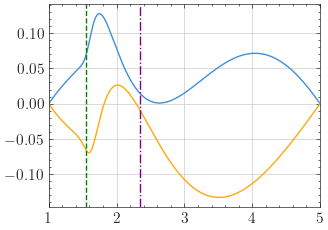

In [55]:
# Get mode structure for MRI 1k1 (Kep.)
##### SET PARAMETERS #####
color_arr = ['#3F90DA', '#FFA90E', '#BD1F01', '#94A4A2', '#832DB6', '#A96B59', '#E76300', '#B9AC70', '#92DADD']

r1 = 0.1
q = 1/2
type = 'MCI'
elecd = 30
eta = elecd
Pm = 1
m = 1
kn = 1
kz = kn*np.pi/(4)
Bz = 20
VA_N =  Bz /(r1*Omega0*np.sqrt(rho*mu_0)*10000)

B0 = 0


r1 = 1
r2 = 5
r3 = 5.5
rp = np.linspace(0.1, r3, 50000)

r = np.linspace(r1, r2, 500)
q_mag = np.pi**2
q2r_sc = q_mag*1/r**2
q2rp_sc = q_mag*(-2/r**3)
q2rpp_sc = q_mag*(6/r**4)
q2i_sc = q_mag*np.zeros(len(r))
q2ip_sc = q_mag*np.zeros(len(r))
q2ipp_sc = q_mag*np.zeros(len(r))

ones_arr = np.ones(len(r)) 
k2 = (q2r_sc + 1j*q2i_sc) + m**2/r**2 + kz**2 * ones_arr
k2p = ((q2rp_sc + 1j*q2ip_sc) - 2 * m**2/r**3) ## just changed from d/dr
k2pp = ((q2rpp_sc + 1j*q2ipp_sc) + 6 * m**2/r**4) ## just changed from d/dr

k2r_curr = i2.CubicSpline(r, k2.real)
k2i_curr = i2.CubicSpline(r, k2.imag)
k2rp_curr = i2.CubicSpline(r, k2p.real)
k2ip_curr = i2.CubicSpline(r, k2p.imag)
k2rpp_curr = i2.CubicSpline(r, k2pp.real)
k2ipp_curr = i2.CubicSpline(r, k2pp.imag)

reso = 5000
############## Kep
##### SET PARAMETERS #####
flow_type = 'Kep'

if(flow_type == 'Kep'):
    flow_select = True
elif(flow_type == 'Tanh'):
    flow_select = 'tanh'
elif(flow_type == 'Sat'):
    flow_select = 'saturated'
elif(flow_type == 'Sh2'):
    flow_select = 'Sh2'

guess = 0.2783713245473497+0.01400477049469968j
guess_MCI = guess
result = o.root_scalar(shoot_hain_v3, method='secant', x0=guess*(1.00005+1e-6j), x1=guess*(0.99995-1e-6j), args=(eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, kz, m, B0, Bz, flow_select, 1, r2,reso), maxiter=5000)
guess0 = result.root
y0 = [0.,(1.+1j)*1e-1]  
y = integ.solve_ivp(shoot_setup_hain_v2, [1,r2**2], y0, args=(guess,eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, m,kz,B0,Bz,flow_select, 1), max_step=24./reso)
r_Kep_MCI = np.sqrt(y.t)
u_Kep_MCI = y.y[0]
r_vec_Kep_MCI = shr.resonance_res_krcomp_v8(r2, guess0, m, eta, Pm, k2r_curr, k2i_curr, kz, Bz, B0,flow_select, q)
print(result)


k2 = k2r_curr(r_Kep_MCI) + 1j*k2i_curr(r_Kep_MCI)
W = 1/r_Kep_MCI**(3/2)
lamb = -1j*guess
l_eta = lamb + 1j*m*W + eta/(r1**2*Omega0)*(k2)
vr_MCI = -l_eta*u_Kep_MCI/r_Kep_MCI

plt.figure()
plt.plot(r_Kep_MCI, vr_MCI.real, color = color_arr[0])
plt.plot(r_Kep_MCI, vr_MCI.imag, color = color_arr[1])
plt.axvline(x=r_vec_Kep_MCI[0], linestyle = '--', color = 'green', label = 'Resonance')
plt.axvline(x=r_vec_Kep_MCI[1], linestyle = '--', color = 'green')
plt.axvline(x=r_vec_Kep_MCI[4], linestyle = '-.', color = 'purple', label = 'Corotation')
plt.xlim(1,5)
plt.show()

1602


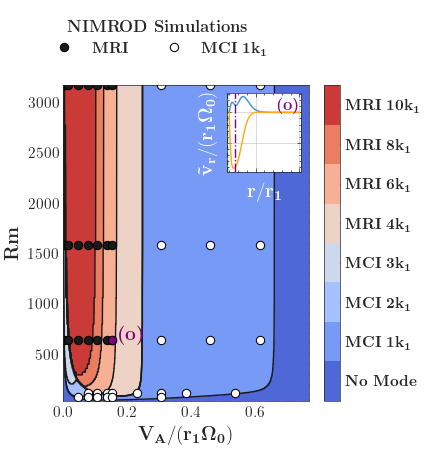

In [56]:
################ Zoom
# import seaborn
# seaborn.set_theme()
import pandas as pd 

cmap = 'coolwarm'
# fig,ax2 = plt.subplots(1, layout="constrained")
fig,ax2 = plt.subplots(1)
ax2.set(xlabel=r'$V_A/(r_1\Omega_0)$', ylabel=r"Rm")
ax2.set_xlabel(r'$\mathbf{V_A/(r_1\Omega_0)}$', fontsize = 14)
ax2.set_ylabel(r'\textbf{Rm}', fontsize = 14)

fig.set_figheight(4)
fig.set_figwidth(4)
plt.tight_layout()

# levels = [0,1,2,3,4,5,6,7]
# contour = plt.pcolormesh(VA_N_total, Rm, gr_ijk_ii_plot, cmap=cmap, norm=norm, shading="auto",rasterized=True)

levels = [0,1,2,3,4,5,6,7,8]
contour = plt.contourf(VA_N_total, Rm, gr_ijk_ii_plot+1, cmap=cmap, levels = levels)
plt.contour(contour, colors='k')

### Colormesh
# tickss = np.array([0,1,2,3,4,5,6,7])+0.5
# cbar = plt.colorbar(contour,  ticks=tickss) 
# cbar.ax.set_yticklabels([r'\textbf{No Mode}', r'\textbf{MCI} $\mathbf{1k_1}$', r'\textbf{MCI} $\mathbf{2k_1}$', r'\textbf{MCI} $\mathbf{3k_1}$', r'\textbf{MRI} $\mathbf{4k_1}$', r'\textbf{MRI} $\mathbf{6k_1}$', r'\textbf{MRI} $\mathbf{8k_1}$', r'\textbf{MRI} $\mathbf{10k_1}$'])

#### contourf
tickss = np.array([0,1,2,3,4,5,6,7])+0.5
cbar = plt.colorbar(contour,  ticks=tickss) 
cbar.ax.set_yticklabels([r'\textbf{No Mode}', r'\textbf{MCI} $\mathbf{1k_1}$', r'\textbf{MCI} $\mathbf{2k_1}$', r'\textbf{MCI} $\mathbf{3k_1}$', r'\textbf{MRI} $\mathbf{4k_1}$', r'\textbf{MRI} $\mathbf{6k_1}$', r'\textbf{MRI} $\mathbf{8k_1}$', r'\textbf{MRI} $\mathbf{10k_1}$'])
r1 = .1
### MRI Points
plt.plot(VA_N_Arr[1:8], r1**2*Omega0/(1)*np.ones(len(VA_N_Arr[1:8])), 'o', color = 'k', label = r'\textbf{MRI}', markeredgecolor='black', markeredgewidth = 0.75)    
plt.plot(VA_N_Arr[1:8], r1**2*Omega0/(2)*np.ones(len(VA_N_Arr[1:8])), 'o', color = 'k', markeredgecolor='black', markeredgewidth = 0.75)    
plt.plot(VA_N_Arr[1:8], r1**2*Omega0/(5)*np.ones(len(VA_N_Arr[1:8])), 'o', color = 'k', markeredgecolor='black', markeredgewidth = 0.75)   
### NIMROD DATA
plt.plot(VA_N_Arr[8:len(VA_N_Arr)-1], r1**2*Omega0/(1)*np.ones(len(VA_N_Arr[8:len(VA_N_Arr)-1])), 'o', color = 'w', markeredgecolor='black', markeredgewidth = 0.75)    
plt.plot(VA_N_Arr[8:len(VA_N_Arr)-1], r1**2*Omega0/(2)*np.ones(len(VA_N_Arr[8:len(VA_N_Arr)-1])), 'o', color = 'w', markeredgecolor='black', markeredgewidth = 0.75)    
plt.plot(VA_N_Arr[8:len(VA_N_Arr)-1], r1**2*Omega0/(5)*np.ones(len(VA_N_Arr[8:len(VA_N_Arr)-1])), 'o', color = 'w', markeredgecolor='black', markeredgewidth = 0.75)    
plt.plot(VA_N_arr_ETA30[0:len(VA_N_arr_ETA30)-2], r1**2*Omega0/(30)*np.ones(len(VA_N_arr_ETA30[0:len(VA_N_arr_ETA30)-2])), 'o', color = 'w', label = r'\textbf{MCI} ' +  r'$\mathbf{1k_1}$', markeredgecolor='black', markeredgewidth = 0.75) 
plt.plot(VA_N_Arr[3:len(VA_N_Arr)-3], r1**2*Omega0/(50)*np.ones(len(VA_N_Arr[3:len(VA_N_Arr)-3])), 'o', color = 'w', markeredgecolor='black', markeredgewidth = 0.75) 
######### special point
Bz = 10
VA_Np = Bz/(r1*Omega0*np.sqrt(rho*mu_0)*10000)
Rmp = r1**2*Omega0/(5)
plt.plot(VA_Np, Rmp, 'o', color = 'purple', markeredgecolor='black', markeredgewidth = 0.75)   
plt.text(VA_Np + 0.02, Rmp+6, r'\textbf{(o)}', fontsize=14, color='purple', fontweight='bold')
r1 = 1



lines_labels = [ax2.get_legend_handles_labels() for ax2 in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc='lower center', ncol=2, 
           bbox_to_anchor=(0.4, +.94),  # Position the legend below the plot
           frameon=False,  # Turn on the frame (border)
           edgecolor='black',  # Set the border color
           facecolor='white',  # Set the background color of the legend box
           borderpad=1,  # Padding between the legend text and the border
           borderaxespad=1,title=r"\textbf{NIMROD Simulations}")

# fig.legend(lines, labels, loc='lower center', ncol=2, 
#            bbox_to_anchor=(0.5, -0.15),  # Position the legend below the plot
#            frameon=False,  # Turn on the frame (border)
#            edgecolor='black',  # Set the border color
#            facecolor='white',  # Set the background color of the legend box
#            borderpad=1,  # Padding between the legend text and the border
#            borderaxespad=1,title="My Legend Title")

ax_inset = inset_axes(ax2, width="30%", height="25%", loc='upper right')
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.axes.yaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 14, color = 'w')
ax_inset.set_ylabel(r'$\mathbf{\tilde{v}_r/(r_1\Omega_0)}$', fontsize = 14, color = 'w')
# cp2=ax_inset.contourf(rc/0.1,zc/0.1, Vr_Eta5_10G,20, cmap='plasma')
ax_inset.plot(r_Kep_MRI, vr.real, color = color_arr[0])
ax_inset.plot(r_Kep_MRI, vr.imag, color = color_arr[1])
ax_inset.axvline(x=r_vec_Kep_MRI[0], linestyle = '--', color = 'green', label = 'Resonance')
ax_inset.axvline(x=r_vec_Kep_MRI[1], linestyle = '--', color = 'green')
ax_inset.axvline(x=r_vec_Kep_MRI[4], linestyle = '-.', color = 'purple', label = 'Corotation')
ax_inset.set_xlim(0.9,5.1)
# ax_inset.set_title(r"$\mathbf{\tilde{v}_r/(r_1\Omega_0)}$", fontsize = 16, pad = 10)
ax_inset.text(0.67, 0.96, r'\textbf{(o)}', transform=ax_inset.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color = 'purple')

print(len(VA_N_total))
# plt.tight_layout()
plt.savefig('Rm-vA-Kep-dommode-qmagpi.png', dpi = 400)
plt.savefig('Rm-vA-Kep-dommode-qmagpi.svg', format = 'svg', dpi = 300)
plt.savefig('Rm-vA-Kep-dommode-qmagpi.pdf', dpi = 74)

plt.show()

0.11278966074102202


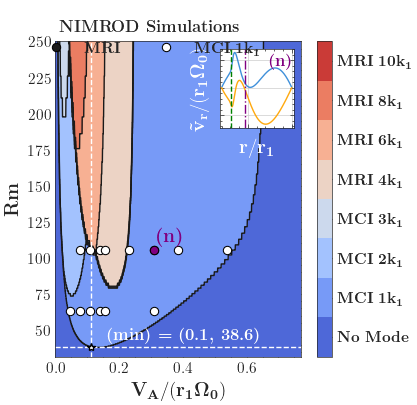

In [57]:
################ Zoom
# import seaborn
# seaborn.set_theme()
cmap = 'coolwarm'
fig,ax2 = plt.subplots(1)
ax2.set(xlabel=r'$V_A/(r_1\Omega_0)$', ylabel=r"Rm")
ax2.set_xlabel(r'$\mathbf{V_A/(r_1\Omega_0)}$', fontsize = 14)
ax2.set_ylabel(r'\textbf{Rm}', fontsize = 14)
fig.set_figheight(4)
fig.set_figwidth(4)
plt.tight_layout()

# levels = [0,1,2,3,4,5,6,7,8]
# contour = plt.pcolormesh(VA_N_total, Rm, gr_ijk_ii_plot, cmap=cmap, norm=norm, rasterized=True)

levels = [0,1,2,3,4,5,6,7,8]
contour = plt.contourf(VA_N_total, Rm, gr_ijk_ii_plot+1, cmap=cmap, levels = levels)
plt.contour(contour, colors='k')


tickss = np.array([0,1,2,3,4,5,6,7])+ 0.5
cbar = plt.colorbar(contour,  ticks=tickss) 
# cbar.ax.set_yticklabels(['No Mode', r'MCI $1k_1$', r'MCI $2k_1$', r'MCI $3k_1$', r'MRI $4k_1$', r'MRI $6k_1$', r'MRI $8k_1$', r'MRI $10k_1$'])
cbar.ax.set_yticklabels([r'\textbf{No Mode}', r'\textbf{MCI} $\mathbf{1k_1}$', r'\textbf{MCI} $\mathbf{2k_1}$', r'\textbf{MCI} $\mathbf{3k_1}$', r'\textbf{MRI} $\mathbf{4k_1}$', r'\textbf{MRI} $\mathbf{6k_1}$', r'\textbf{MRI} $\mathbf{8k_1}$', r'\textbf{MRI} $\mathbf{10k_1}$'])
r1 = .1

### MRI Points
plt.plot(VA_N_Arr[1:8], r1**2*Omega0/(1)*np.ones(len(VA_N_Arr[1:8])), 'o', color = 'k', label = r'\textbf{MRI}', markeredgecolor='black', markeredgewidth = 0.75)    
plt.plot(VA_N_Arr[1:8], r1**2*Omega0/(2)*np.ones(len(VA_N_Arr[1:8])), 'o', color = 'k', markeredgecolor='black', markeredgewidth = 0.75)    
plt.plot(VA_N_Arr[1:8], r1**2*Omega0/(5)*np.ones(len(VA_N_Arr[1:8])), 'o', color = 'k', markeredgecolor='black', markeredgewidth = 0.75)   
### NIMROD DATA
plt.plot(VA_N_Arr[8:len(VA_N_Arr)-1], r1**2*Omega0/(1)*np.ones(len(VA_N_Arr[8:len(VA_N_Arr)-1])), 'o', color = 'w', markeredgecolor='black', markeredgewidth = 0.75)    
plt.plot(VA_N_Arr[8:len(VA_N_Arr)-1], r1**2*Omega0/(2)*np.ones(len(VA_N_Arr[8:len(VA_N_Arr)-1])), 'o', color = 'w', markeredgecolor='black', markeredgewidth = 0.75)    
plt.plot(VA_N_Arr[8:len(VA_N_Arr)-1], r1**2*Omega0/(5)*np.ones(len(VA_N_Arr[8:len(VA_N_Arr)-1])), 'o', color = 'w', markeredgecolor='black', markeredgewidth = 0.75)    
plt.plot(VA_N_arr_ETA30[0:len(VA_N_arr_ETA30)-2], r1**2*Omega0/(30)*np.ones(len(VA_N_arr_ETA30[0:len(VA_N_arr_ETA30)-2])), 'o', color = 'w', label = r'\textbf{MCI} ' +  r'$\mathbf{1k_1}$', markeredgecolor='black', markeredgewidth = 0.75) 
plt.plot(VA_N_Arr[3:len(VA_N_Arr)-3], r1**2*Omega0/(50)*np.ones(len(VA_N_Arr[3:len(VA_N_Arr)-3])), 'o', color = 'w', markeredgecolor='black', markeredgewidth = 0.75) 
plt.axvline(x = VAm, color = 'w', linestyle = 'dashed')
plt.axhline(y = Rmm, color = 'w', linestyle = 'dashed')
plt.plot(VAm, Rmm, color = 'w', marker = '*', markeredgecolor='black')
# plt.text(VAm + 0.05, Rmm+5, f'(min) = {(np.round(VAm, 1), np.round(Rmm, 1))}', fontsize=12, color='w', fontweight='bold')

plt.text(VAm + 0.05, Rmm+5, r'\textbf{(min) = (0.1, 38.6)}', fontsize=12, color='w', fontweight='bold')
print(VAm)
######### special point
Bz = 20
VA_Np = Bz/(r1*Omega0*np.sqrt(rho*mu_0)*10000)
Rmp = r1**2*Omega0/(30)
plt.plot(VA_Np, Rmp, 'o', color = 'purple', markeredgecolor='black', markeredgewidth = 0.75)   
plt.text(VA_Np + 0.01, Rmp+6, r'\textbf{(n)}', fontsize=14, color='purple', fontweight='bold')
r1 = 1



lines_labels = [ax2.get_legend_handles_labels() for ax2 in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
# fig.legend(lines, labels, loc='lower center', ncol=2, 
#            bbox_to_anchor=(0.5, -0.15),  # Position the legend below the plot
#            frameon=False,  # Turn on the frame (border)
#            edgecolor='black',  # Set the border color
#            facecolor='white',  # Set the background color of the legend box
#            borderpad=1,  # Padding between the legend text and the border
#            borderaxespad=1)
fig.legend(lines, labels, loc='lower center', ncol=2, 
           bbox_to_anchor=(0.4, +.83),  # Position the legend below the plot
           frameon=False,  # Turn on the frame (border)
           edgecolor='black',  # Set the border color
           facecolor='white',  # Set the background color of the legend box
           borderpad=1,  # Padding between the legend text and the border
           borderaxespad=1,title=r"\textbf{NIMROD Simulations}")
plt.ylim(np.min(Rm), 250)

ax_inset = inset_axes(ax2, width="30%", height="25%", loc='upper right')
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.axes.yaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 14, color = 'w')
ax_inset.set_ylabel(r'$\mathbf{\tilde{v}_r/(r_1\Omega_0)}$', fontsize = 14, color = 'w')
# cp2=ax_inset.contourf(rc/0.1,zc/0.1, Vr_Eta5_10G,20, cmap='plasma')
ax_inset.plot(r_Kep_MCI, vr_MCI.real, color = color_arr[0])
ax_inset.plot(r_Kep_MCI, vr_MCI.imag, color = color_arr[1])
ax_inset.axvline(x=r_vec_Kep_MCI[0], linestyle = '--', color = 'green', label = 'Resonance')
ax_inset.axvline(x=r_vec_Kep_MCI[1], linestyle = '--', color = 'green')
ax_inset.axvline(x=r_vec_Kep_MCI[4], linestyle = '-.', color = 'purple', label = 'Corotation')
ax_inset.set_xlim(0.9,5.1)
ax_inset.text(0.67, 0.96, r'\textbf{(n)}', transform=ax_inset.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color = 'purple')

plt.savefig('Rm-vA-Kep-dommode-qmagpi-zoom.png', dpi = 400)
plt.savefig('Rm-vA-Kep-dommode-qmagpi-zoom.svg', format = 'svg', dpi =300)
plt.savefig('Rm-vA-Kep-dommode-qmagpi-zoom.pdf')

# plt.savefig('Rm-vA-Kep-dommode-qmagpi-zoom.pdf')

plt.show()

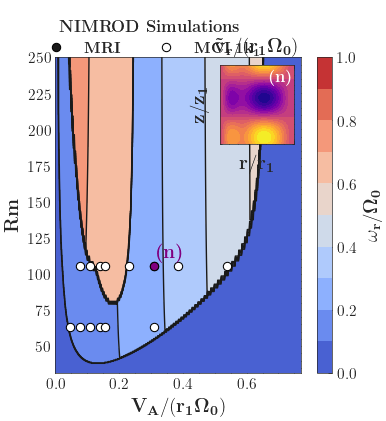

In [58]:
################ Zoom
# import seaborn
# seaborn.set_theme()
cmap = 'coolwarm'
fig,ax2 = plt.subplots(1)
ax2.set(xlabel=r'$V_A/(r_1\Omega_0)$', ylabel=r"Rm")
ax2.set_xlabel(r'$\mathbf{V_A/(r_1\Omega_0)}$', fontsize = 14)
ax2.set_ylabel(r'\textbf{Rm}', fontsize = 14)
fig.set_figheight(4)
fig.set_figwidth(4)
plt.tight_layout()


# contour = plt.pcolormesh(VA_N_total, Rm, gr_ijk_ii_plot, cmap=cmap, norm=norm,zorder=-20 )
# contour = plt.contourf(VA_N_total, Rm, np.transpose((freq_ijk)), 40, cmap=cmap)

levels = [0,1,2,3,4,5,6,7,8]
contour = plt.contourf(VA_N_total, Rm, np.transpose((freq_ijk)), cmap=cmap, levels = 10)
plt.ylim(np.min(Rm),np.max(Rm))
cbar = plt.colorbar()
cbar.set_label(r'$\mathbf{\omega_r/\Omega_0}$', fontsize = 14)
plt.contour(contour, colors='k')

r1 = 0.1
### MRI Points
plt.plot(VA_N_Arr[1:8], r1**2*Omega0/(1)*np.ones(len(VA_N_Arr[1:8])), 'o', color = 'k', label = r'\textbf{MRI}', markeredgecolor='black', markeredgewidth = 0.75)    
plt.plot(VA_N_Arr[1:8], r1**2*Omega0/(2)*np.ones(len(VA_N_Arr[1:8])), 'o', color = 'k', markeredgecolor='black', markeredgewidth = 0.75)    
plt.plot(VA_N_Arr[1:8], r1**2*Omega0/(5)*np.ones(len(VA_N_Arr[1:8])), 'o', color = 'k', markeredgecolor='black', markeredgewidth = 0.75)   
### NIMROD DATA
plt.plot(VA_N_Arr[8:len(VA_N_Arr)-1], r1**2*Omega0/(1)*np.ones(len(VA_N_Arr[8:len(VA_N_Arr)-1])), 'o', color = 'w', markeredgecolor='black', markeredgewidth = 0.75)    
plt.plot(VA_N_Arr[8:len(VA_N_Arr)-1], r1**2*Omega0/(2)*np.ones(len(VA_N_Arr[8:len(VA_N_Arr)-1])), 'o', color = 'w', markeredgecolor='black', markeredgewidth = 0.75)    
plt.plot(VA_N_Arr[8:len(VA_N_Arr)-1], r1**2*Omega0/(5)*np.ones(len(VA_N_Arr[8:len(VA_N_Arr)-1])), 'o', color = 'w', markeredgecolor='black', markeredgewidth = 0.75)    
plt.plot(VA_N_arr_ETA30[0:len(VA_N_arr_ETA30)-2], r1**2*Omega0/(30)*np.ones(len(VA_N_arr_ETA30[0:len(VA_N_arr_ETA30)-2])), 'o', color = 'w', label = r'\textbf{MCI} ' +  r'$\mathbf{1k_1}$', markeredgecolor='black', markeredgewidth = 0.75) 
plt.plot(VA_N_Arr[3:len(VA_N_Arr)-3], r1**2*Omega0/(50)*np.ones(len(VA_N_Arr[3:len(VA_N_Arr)-3])), 'o', color = 'w', markeredgecolor='black', markeredgewidth = 0.75) 

######### special point
Bz = 20
VA_Np = Bz/(r1*Omega0*np.sqrt(rho*mu_0)*10000)
Rmp = r1**2*Omega0/(30)
plt.plot(VA_Np, Rmp, 'o', color = 'purple', markeredgecolor='black', markeredgewidth = 0.75)   
plt.text(VA_Np + 0.01, Rmp+6, r'\textbf{(n)}', fontsize=14, color='purple', fontweight='bold')
r1 = 1

lines_labels = [ax2.get_legend_handles_labels() for ax2 in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
# fig.legend(lines, labels, loc='lower center', ncol=2, 
#            bbox_to_anchor=(0.5, -0.15),  # Position the legend below the plot
#            frameon=False,  # Turn on the frame (border)
#            edgecolor='black',  # Set the border color
#            facecolor='white',  # Set the background color of the legend box
#            borderpad=1,  # Padding between the legend text and the border
#            borderaxespad=1)


fig.legend(lines, labels, loc='lower center', ncol=2, 
           bbox_to_anchor=(0.4, +.87),  # Position the legend below the plot
           frameon=False,  # Turn on the frame (border)
           edgecolor='black',  # Set the border color
           facecolor='white',  # Set the background color of the legend box
           borderpad=1,  # Padding between the legend text and the border
           borderaxespad=1,title=r"\textbf{NIMROD Simulations}")

plt.ylim(np.min(Rm), 250)



ax_inset = inset_axes(ax2, width="30%", height="25%", loc='upper right')
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.axes.yaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 14)
ax_inset.set_ylabel(r'$\mathbf{z/z_1}$', fontsize = 14)
cp2=ax_inset.contourf(rc/0.1,zc/0.1, Vr_Eta30_20G,20, cmap='plasma')
ax_inset.set_title(r"$\mathbf{\tilde{v}_r/(r_1\Omega_0)}$", fontsize = 14, pad = 10)

ax_inset.text(0.67, 0.96, r'\textbf{(n)}', transform=ax_inset.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color = 'w')

plt.savefig('Rm-vA-Kep-freq-qmagpi-zoom.png', dpi = 400)
plt.savefig('Rm-vA-Kep-freq-qmagpi-zoom.pdf')

plt.savefig('Rm-vA-Kep-freq-qmagpi-zoom.svg', format = 'svg')
# plt.savefig('Rm-vA-Kep-freq-qmagpi-zoom.pdf')

plt.show()

### Combining Plots

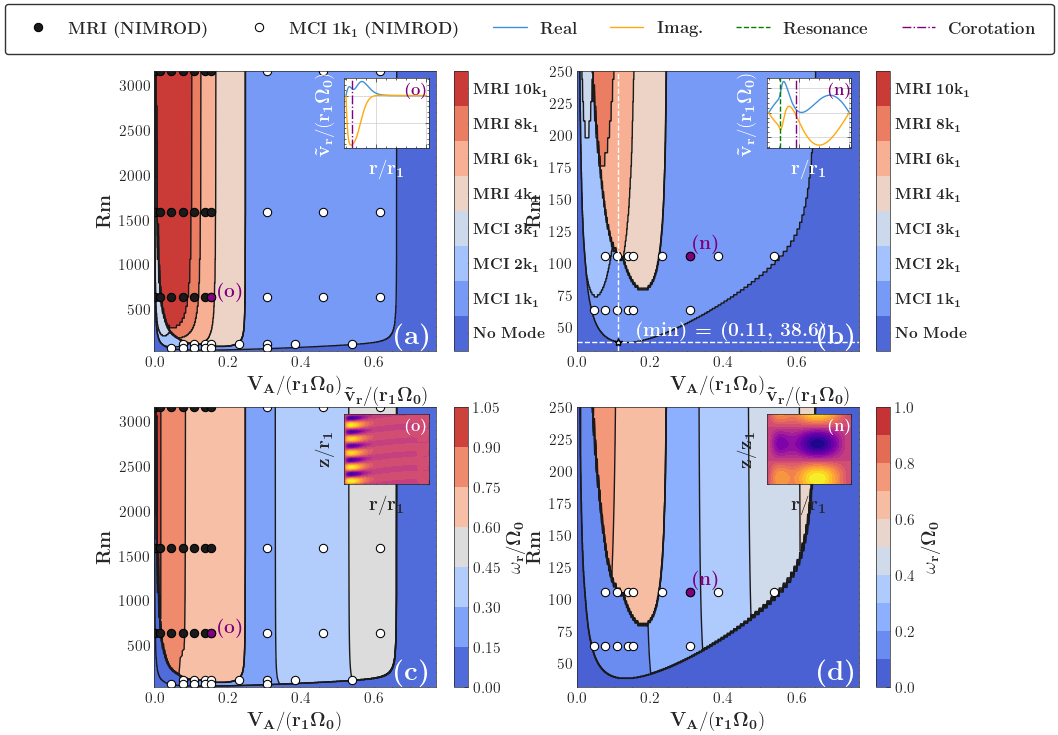

In [ ]:
cmap = 'coolwarm'
fig, ax2 = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(12)
# plt.tight_layout()

r1 = 0.1
ax2[0,0].set_xlabel(r'$\mathbf{V_A/(r_1\Omega_0)}$', fontsize = 14)
ax2[0,0].set_ylabel(r'\textbf{Rm}', fontsize = 14)
ax2[0,1].set_xlabel(r'$\mathbf{V_A/(r_1\Omega_0)}$', fontsize = 14)
ax2[0,1].set_ylabel(r'\textbf{Rm}', fontsize = 14)
ax2[1,0].set_xlabel(r'$\mathbf{V_A/(r_1\Omega_0)}$', fontsize = 14)
ax2[1,0].set_ylabel(r'\textbf{Rm}', fontsize = 14)
ax2[1,1].set_xlabel(r'$\mathbf{V_A/(r_1\Omega_0)}$', fontsize = 14)
ax2[1,1].set_ylabel(r'\textbf{Rm}', fontsize = 14)

################### Plotting 0,0 ###################
levels = [0,1,2,3,4,5,6,7,8]
contour = ax2[0,0].contourf(VA_N_total, Rm, gr_ijk_ii_plot+1, cmap=cmap, levels = levels)
ax2[0,0].contour(contour, colors='k')
tickss = np.array([0,1,2,3,4,5,6,7])+0.5
cbar = fig.colorbar(contour, ax=ax2[0,0], ticks=tickss)
cbar.ax.set_yticklabels([r'\textbf{No Mode}', r'\textbf{MCI} $\mathbf{1k_1}$', r'\textbf{MCI} $\mathbf{2k_1}$', r'\textbf{MCI} $\mathbf{3k_1}$', r'\textbf{MRI} $\mathbf{4k_1}$', r'\textbf{MRI} $\mathbf{6k_1}$', r'\textbf{MRI} $\mathbf{8k_1}$', r'\textbf{MRI} $\mathbf{10k_1}$'])

### MRI Points
ax2[0,0].plot(VA_N_Arr[1:8], r1**2*Omega0/(1)*np.ones(len(VA_N_Arr[1:8])), 'o', color = 'k', label = r'\textbf{MRI (NIMROD)}', markeredgecolor='black', markeredgewidth = 0.75)    
ax2[0,0].plot(VA_N_Arr[1:8], r1**2*Omega0/(2)*np.ones(len(VA_N_Arr[1:8])), 'o', color = 'k', markeredgecolor='black', markeredgewidth = 0.75)    
ax2[0,0].plot(VA_N_Arr[1:8], r1**2*Omega0/(5)*np.ones(len(VA_N_Arr[1:8])), 'o', color = 'k', markeredgecolor='black', markeredgewidth = 0.75)   
### NIMROD DATA
ax2[0,0].plot(VA_N_Arr[8:len(VA_N_Arr)-1], r1**2*Omega0/(1)*np.ones(len(VA_N_Arr[8:len(VA_N_Arr)-1])), 'o', color = 'w', markeredgecolor='black', markeredgewidth = 0.75)    
ax2[0,0].plot(VA_N_Arr[8:len(VA_N_Arr)-1], r1**2*Omega0/(2)*np.ones(len(VA_N_Arr[8:len(VA_N_Arr)-1])), 'o', color = 'w', markeredgecolor='black', markeredgewidth = 0.75)    
ax2[0,0].plot(VA_N_Arr[8:len(VA_N_Arr)-1], r1**2*Omega0/(5)*np.ones(len(VA_N_Arr[8:len(VA_N_Arr)-1])), 'o', color = 'w', markeredgecolor='black', markeredgewidth = 0.75)    
ax2[0,0].plot(VA_N_arr_ETA30[0:len(VA_N_arr_ETA30)-2], r1**2*Omega0/(30)*np.ones(len(VA_N_arr_ETA30[0:len(VA_N_arr_ETA30)-2])), 'o', color = 'w', label = r'\textbf{MCI} ' +  r'$\mathbf{1k_1}$' + r' \textbf{(NIMROD)}', markeredgecolor='black', markeredgewidth = 0.75) 
ax2[0,0].plot(VA_N_Arr[3:len(VA_N_Arr)-3], r1**2*Omega0/(50)*np.ones(len(VA_N_Arr[3:len(VA_N_Arr)-3])), 'o', color = 'w', markeredgecolor='black', markeredgewidth = 0.75) 

######### special point
Bz = 10
VA_Np = Bz/(r1*Omega0*np.sqrt(rho*mu_0)*10000)
Rmp = r1**2*Omega0/(5)
ax2[0,0].plot(VA_Np, Rmp, 'o', color = 'purple', markeredgecolor='black', markeredgewidth = 0.75)   
ax2[0,0].text(VA_Np + 0.02, Rmp+6, r'\textbf{(o)}', fontsize=14, color='purple', fontweight='bold')

ax_inset = inset_axes(ax2[0,0], width="30%", height="25%", loc='upper right')
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.axes.yaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 14, color = 'w')
ax_inset.set_ylabel(r'$\mathbf{\tilde{v}_r/(r_1\Omega_0)}$', fontsize = 14, color = 'w')
ax_inset.plot(r_Kep_MRI, vr.real, color = color_arr[0], label = r'\textbf{Real}')
ax_inset.plot(r_Kep_MRI, vr.imag, color = color_arr[1], label = r'\textbf{Imag.}')
ax_inset.axvline(x=r_vec_Kep_MRI[0], linestyle = '--', color = 'green', label = r'\textbf{Resonance}')
ax_inset.axvline(x=r_vec_Kep_MRI[1], linestyle = '--', color = 'green')
ax_inset.axvline(x=r_vec_Kep_MRI[4], linestyle = '-.', color = 'purple', label = r'\textbf{Corotation}')
ax_inset.set_xlim(0.9,5.1)
ax_inset.text(0.72, 0.96, r'\textbf{(o)}', transform=ax_inset.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color = 'purple')

################### Plotting 1,0 ###################
contour = ax2[1,0].contourf(VA_N_total, Rm, np.transpose((freq_ijk)), 7, cmap=cmap)
cbar = fig.colorbar(contour, ax=ax2[1,0])
cbar.set_label(r'$\mathbf{\omega_r/\Omega_0}$', fontsize = 14)
ax2[1,0].contour(contour, colors='k')

### MRI Points
ax2[1,0].plot(VA_N_Arr[1:8], r1**2*Omega0/(1)*np.ones(len(VA_N_Arr[1:8])), 'o', color = 'k', markeredgecolor='black', markeredgewidth = 0.75)    
ax2[1,0].plot(VA_N_Arr[1:8], r1**2*Omega0/(2)*np.ones(len(VA_N_Arr[1:8])), 'o', color = 'k', markeredgecolor='black', markeredgewidth = 0.75)    
ax2[1,0].plot(VA_N_Arr[1:8], r1**2*Omega0/(5)*np.ones(len(VA_N_Arr[1:8])), 'o', color = 'k', markeredgecolor='black', markeredgewidth = 0.75)   
### NIMROD DATA
ax2[1,0].plot(VA_N_Arr[8:len(VA_N_Arr)-1], r1**2*Omega0/(1)*np.ones(len(VA_N_Arr[8:len(VA_N_Arr)-1])), 'o', color = 'w', markeredgecolor='black', markeredgewidth = 0.75)    
ax2[1,0].plot(VA_N_Arr[8:len(VA_N_Arr)-1], r1**2*Omega0/(2)*np.ones(len(VA_N_Arr[8:len(VA_N_Arr)-1])), 'o', color = 'w', markeredgecolor='black', markeredgewidth = 0.75)    
ax2[1,0].plot(VA_N_Arr[8:len(VA_N_Arr)-1], r1**2*Omega0/(5)*np.ones(len(VA_N_Arr[8:len(VA_N_Arr)-1])), 'o', color = 'w', markeredgecolor='black', markeredgewidth = 0.75)    
ax2[1,0].plot(VA_N_arr_ETA30[0:len(VA_N_arr_ETA30)-2], r1**2*Omega0/(30)*np.ones(len(VA_N_arr_ETA30[0:len(VA_N_arr_ETA30)-2])), 'o', color = 'w', markeredgecolor='black', markeredgewidth = 0.75) 
ax2[1,0].plot(VA_N_Arr[3:len(VA_N_Arr)-3], r1**2*Omega0/(50)*np.ones(len(VA_N_Arr[3:len(VA_N_Arr)-3])), 'o', color = 'w', markeredgecolor='black', markeredgewidth = 0.75) 

######### special point
Bz = 10
VA_Np = Bz/(r1*Omega0*np.sqrt(rho*mu_0)*10000)
Rmp = r1**2*Omega0/(5)
ax2[1,0].plot(VA_Np, Rmp, 'o', color = 'purple', markeredgecolor='black', markeredgewidth = 0.75)   
ax2[1,0].text(VA_Np + 0.02, Rmp+6, r'\textbf{(o)}', fontsize=14, color='purple', fontweight='bold')

ax_inset = inset_axes(ax2[1,0], width="30%", height="25%", loc='upper right')
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.axes.yaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 14)
ax_inset.set_ylabel(r'$\mathbf{z/r_1}$', fontsize = 14)
cp2=ax_inset.contourf(rc/0.1,zc/0.1, Vr_Eta5_10G,20, cmap='plasma')
ax_inset.set_title(r"$\mathbf{\tilde{v}_r/(r_1\Omega_0)}$", fontsize = 14, pad = 10)
ax_inset.text(0.72, 0.96, r'\textbf{(o)}', transform=ax_inset.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color = 'w')


################### Plotting 0,1 ###################
ax2[0,1].set_ylim(np.min(Rm), 250)
levels = [0,1,2,3,4,5,6,7,8]
contour = ax2[0,1].contourf(VA_N_total, Rm, gr_ijk_ii_plot+1, cmap=cmap, levels = levels)
ax2[0,1].contour(contour, colors='k')
tickss = np.array([0,1,2,3,4,5,6,7])+ 0.5
cbar = fig.colorbar(contour, ax=ax2[0,1], ticks=tickss)
cbar.ax.set_yticklabels([r'\textbf{No Mode}', r'\textbf{MCI} $\mathbf{1k_1}$', r'\textbf{MCI} $\mathbf{2k_1}$', r'\textbf{MCI} $\mathbf{3k_1}$', r'\textbf{MRI} $\mathbf{4k_1}$', r'\textbf{MRI} $\mathbf{6k_1}$', r'\textbf{MRI} $\mathbf{8k_1}$', r'\textbf{MRI} $\mathbf{10k_1}$'])

### MRI Points
ax2[0,1].plot(VA_N_Arr[1:8], r1**2*Omega0/(1)*np.ones(len(VA_N_Arr[1:8])), 'o', color = 'k', markeredgecolor='black', markeredgewidth = 0.75)    
ax2[0,1].plot(VA_N_Arr[1:8], r1**2*Omega0/(2)*np.ones(len(VA_N_Arr[1:8])), 'o', color = 'k', markeredgecolor='black', markeredgewidth = 0.75)    
ax2[0,1].plot(VA_N_Arr[1:8], r1**2*Omega0/(5)*np.ones(len(VA_N_Arr[1:8])), 'o', color = 'k', markeredgecolor='black', markeredgewidth = 0.75)   
### NIMROD DATA
ax2[0,1].plot(VA_N_Arr[8:len(VA_N_Arr)-1], r1**2*Omega0/(1)*np.ones(len(VA_N_Arr[8:len(VA_N_Arr)-1])), 'o', color = 'w', markeredgecolor='black', markeredgewidth = 0.75)    
ax2[0,1].plot(VA_N_Arr[8:len(VA_N_Arr)-1], r1**2*Omega0/(2)*np.ones(len(VA_N_Arr[8:len(VA_N_Arr)-1])), 'o', color = 'w', markeredgecolor='black', markeredgewidth = 0.75)    
ax2[0,1].plot(VA_N_Arr[8:len(VA_N_Arr)-1], r1**2*Omega0/(5)*np.ones(len(VA_N_Arr[8:len(VA_N_Arr)-1])), 'o', color = 'w', markeredgecolor='black', markeredgewidth = 0.75)    
ax2[0,1].plot(VA_N_arr_ETA30[0:len(VA_N_arr_ETA30)-2], r1**2*Omega0/(30)*np.ones(len(VA_N_arr_ETA30[0:len(VA_N_arr_ETA30)-2])), 'o', color = 'w', markeredgecolor='black', markeredgewidth = 0.75) 
ax2[0,1].plot(VA_N_Arr[3:len(VA_N_Arr)-3], r1**2*Omega0/(50)*np.ones(len(VA_N_Arr[3:len(VA_N_Arr)-3])), 'o', color = 'w', markeredgecolor='black', markeredgewidth = 0.75) 
ax2[0,1].axvline(x = VAm, color = 'w', linestyle = 'dashed')
ax2[0,1].axhline(y = Rmm, color = 'w', linestyle = 'dashed')
ax2[0,1].plot(VAm, Rmm, color = 'w', marker = '*', markeredgecolor='black')
# ax2[0,1].text(VAm + 0.05, Rmm+5, r'\textbf{(min) = (0.1, 38.6)}', fontsize=12, color='w', fontweight='bold')
ax2[0,1].text(VAm + 0.05, Rmm+5, r'\textbf{(min) = (0.11, 38.6)}', fontsize=14, color='w', fontweight='bold')

######### special point
Bz = 20
VA_Np = Bz/(r1*Omega0*np.sqrt(rho*mu_0)*10000)
Rmp = r1**2*Omega0/(30)
ax2[0,1].plot(VA_Np, Rmp, 'o', color = 'purple', markeredgecolor='black', markeredgewidth = 0.75)   
ax2[0,1].text(VA_Np + 0.01, Rmp+6, r'\textbf{(n)}', fontsize=14, color='purple', fontweight='bold')

ax_inset = inset_axes(ax2[0,1], width="30%", height="25%", loc='upper right')
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.axes.yaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 14, color = 'w')
ax_inset.set_ylabel(r'$\mathbf{\tilde{v}_r/(r_1\Omega_0)}$', fontsize = 14, color = 'w')
ax_inset.plot(r_Kep_MCI, vr_MCI.real, color = color_arr[0])
ax_inset.plot(r_Kep_MCI, vr_MCI.imag, color = color_arr[1])
ax_inset.axvline(x=r_vec_Kep_MCI[0], linestyle = '--', color = 'green')
ax_inset.axvline(x=r_vec_Kep_MCI[1], linestyle = '--', color = 'green')
ax_inset.axvline(x=r_vec_Kep_MCI[4], linestyle = '-.', color = 'purple')
ax_inset.set_xlim(0.9,5.1)
ax_inset.text(0.72, 0.96, r'\textbf{(n)}', transform=ax_inset.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color = 'purple')

################### Plotting 1,1 ###################
ax2[1,1].set_ylim(np.min(Rm), 250)
contour = ax2[1,1].contourf(VA_N_total, Rm, np.transpose((freq_ijk)), cmap=cmap, levels = 10)
cbar = fig.colorbar(contour, ax=ax2[1,1])
cbar.set_label(r'$\mathbf{\omega_r/\Omega_0}$', fontsize = 14)
ax2[1,1].contour(contour, colors='k')

### MRI Points
ax2[1,1].plot(VA_N_Arr[1:8], r1**2*Omega0/(1)*np.ones(len(VA_N_Arr[1:8])), 'o', color = 'k', markeredgecolor='black', markeredgewidth = 0.75)    
ax2[1,1].plot(VA_N_Arr[1:8], r1**2*Omega0/(2)*np.ones(len(VA_N_Arr[1:8])), 'o', color = 'k', markeredgecolor='black', markeredgewidth = 0.75)    
ax2[1,1].plot(VA_N_Arr[1:8], r1**2*Omega0/(5)*np.ones(len(VA_N_Arr[1:8])), 'o', color = 'k', markeredgecolor='black', markeredgewidth = 0.75)   
### NIMROD DATA
ax2[1,1].plot(VA_N_Arr[8:len(VA_N_Arr)-1], r1**2*Omega0/(1)*np.ones(len(VA_N_Arr[8:len(VA_N_Arr)-1])), 'o', color = 'w', markeredgecolor='black', markeredgewidth = 0.75)    
ax2[1,1].plot(VA_N_Arr[8:len(VA_N_Arr)-1], r1**2*Omega0/(2)*np.ones(len(VA_N_Arr[8:len(VA_N_Arr)-1])), 'o', color = 'w', markeredgecolor='black', markeredgewidth = 0.75)    
ax2[1,1].plot(VA_N_Arr[8:len(VA_N_Arr)-1], r1**2*Omega0/(5)*np.ones(len(VA_N_Arr[8:len(VA_N_Arr)-1])), 'o', color = 'w', markeredgecolor='black', markeredgewidth = 0.75)    
ax2[1,1].plot(VA_N_arr_ETA30[0:len(VA_N_arr_ETA30)-2], r1**2*Omega0/(30)*np.ones(len(VA_N_arr_ETA30[0:len(VA_N_arr_ETA30)-2])), 'o', color = 'w', markeredgecolor='black', markeredgewidth = 0.75) 
ax2[1,1].plot(VA_N_Arr[3:len(VA_N_Arr)-3], r1**2*Omega0/(50)*np.ones(len(VA_N_Arr[3:len(VA_N_Arr)-3])), 'o', color = 'w', markeredgecolor='black', markeredgewidth = 0.75) 

######### special point
Bz = 20
VA_Np = Bz/(r1*Omega0*np.sqrt(rho*mu_0)*10000)
Rmp = r1**2*Omega0/(30)
ax2[1,1].plot(VA_Np, Rmp, 'o', color = 'purple', markeredgecolor='black', markeredgewidth = 0.75)   
ax2[1,1].text(VA_Np + 0.01, Rmp+6, r'\textbf{(n)}', fontsize=14, color='purple', fontweight='bold')

ax_inset = inset_axes(ax2[1,1], width="30%", height="25%", loc='upper right')
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.axes.yaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 14)
ax_inset.set_ylabel(r'$\mathbf{z/z_1}$', fontsize = 14)
cp2=ax_inset.contourf(rc/0.1,zc/0.1, Vr_Eta30_20G,20, cmap='plasma')
ax_inset.set_title(r"$\mathbf{\tilde{v}_r/(r_1\Omega_0)}$", fontsize = 14, pad = 10)
ax_inset.text(0.72, 0.96, r'\textbf{(n)}', transform=ax_inset.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color = 'w')



ax2[0,0].text(0.85, 0.1, r'\textbf{(a)}', transform=ax2[0,0].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left', color ='w')
ax2[0,1].text(0.85, 0.1, r'\textbf{(b)}', transform=ax2[0,1].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left', color ='w')
ax2[1,0].text(0.85, 0.1, r'\textbf{(c)}', transform=ax2[1,0].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left', color ='w')
ax2[1,1].text(0.85, 0.1, r'\textbf{(d)}', transform=ax2[1,1].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left', color ='w')


r1 = 1


#######################################################################################
lines_labels = [ax2.get_legend_handles_labels() for ax2 in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

# fig.legend(lines, labels, loc='lower center', ncol=3, 
#            bbox_to_anchor=(0.5, -0.0),  # Position the legend below the plot
#            frameon=False,  # Turn on the frame (border)
#            edgecolor='black',  # Set the border color
#            facecolor='white',  # Set the background color of the legend box
#            borderpad=1,  # Padding between the legend text and the border
#            borderaxespad=1, fontsize = 12)


fig.legend(lines, labels, loc='lower center', ncol=6, 
           bbox_to_anchor=(0.5, .88),  # Position the legend below the plot
           frameon=True,  # Turn on the frame (border)
           edgecolor='black',  # Set the border color
           facecolor='white',  # Set the background color of the legend box
           borderpad=1,  # Padding between the legend text and the border
           borderaxespad=1, fontsize = 12)

plt.savefig('Rm-vA-Kep-qmagpi-comb-poster.pdf')
plt.show()

7.0


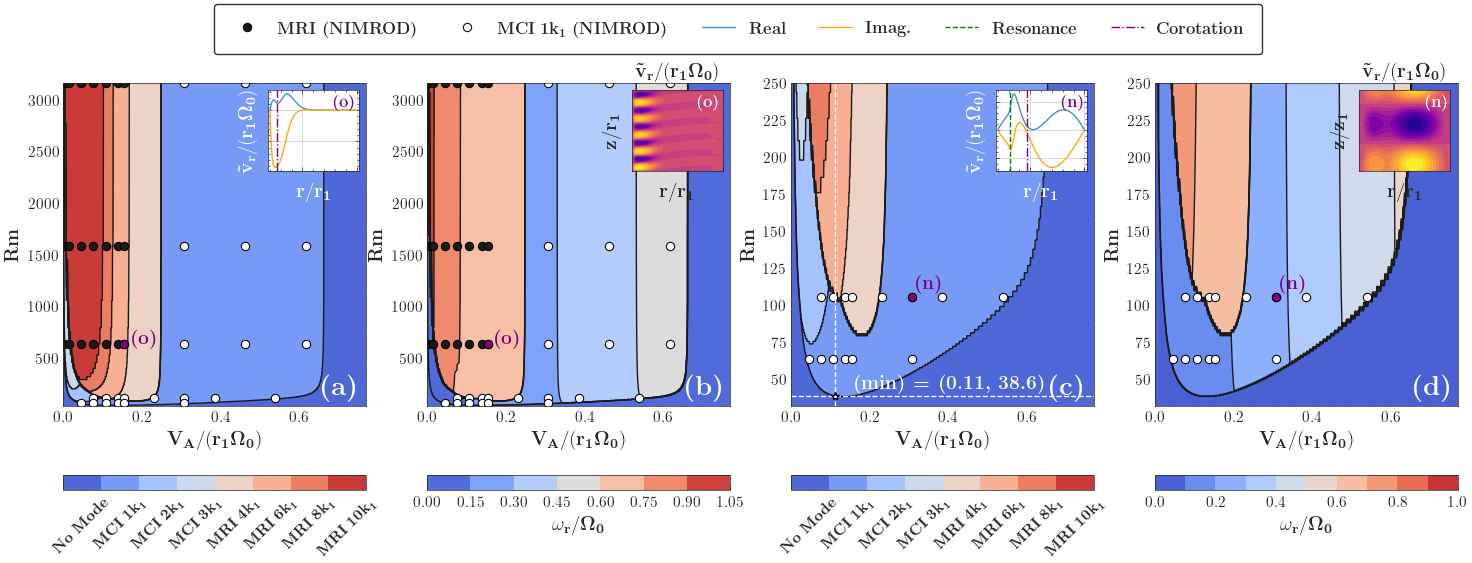

In [ ]:
cmap = 'coolwarm'
fig, ax2 = plt.subplots(1,4)
fig.set_figheight(6)
fig.set_figwidth(18)
r1 = 0.1
ax2[0].set_xlabel(r'$\mathbf{V_A/(r_1\Omega_0)}$', fontsize = 14)
ax2[0].set_ylabel(r'\textbf{Rm}', fontsize = 14)
ax2[1].set_xlabel(r'$\mathbf{V_A/(r_1\Omega_0)}$', fontsize = 14)
ax2[1].set_ylabel(r'\textbf{Rm}', fontsize = 14)
ax2[2].set_xlabel(r'$\mathbf{V_A/(r_1\Omega_0)}$', fontsize = 14)
ax2[2].set_ylabel(r'\textbf{Rm}', fontsize = 14)
ax2[3].set_xlabel(r'$\mathbf{V_A/(r_1\Omega_0)}$', fontsize = 14)
ax2[3].set_ylabel(r'\textbf{Rm}', fontsize = 14)

################### Plotting 0,0 ###################
levels = [0,1,2,3,4,5,6,7,8]
print(np.max(gr_ijk_ii_plot))
contour = ax2[0].contourf(VA_N_total, Rm, gr_ijk_ii_plot+1, cmap=cmap, levels = levels)
ax2[0].contour(contour, colors='k')
tickss = np.array([0,1,2,3,4,5,6,7])+0.5
cbar = fig.colorbar(contour, ax=ax2[0], ticks=tickss, orientation="horizontal")
cbar.ax.set_xticklabels([r'\textbf{No Mode}', r'\textbf{MCI} $\mathbf{1k_1}$', r'\textbf{MCI} $\mathbf{2k_1}$', r'\textbf{MCI} $\mathbf{3k_1}$', r'\textbf{MRI} $\mathbf{4k_1}$', r'\textbf{MRI} $\mathbf{6k_1}$', r'\textbf{MRI} $\mathbf{8k_1}$', r'\textbf{MRI} $\mathbf{10k_1}$'], rotation=45)

### MRI Points
ax2[0].plot(VA_N_Arr[1:8], r1**2*Omega0/(1)*np.ones(len(VA_N_Arr[1:8])), 'o', color = 'k', label = r'\textbf{MRI (NIMROD)}', markeredgecolor='black', markeredgewidth = 0.75)    
ax2[0].plot(VA_N_Arr[1:8], r1**2*Omega0/(2)*np.ones(len(VA_N_Arr[1:8])), 'o', color = 'k', markeredgecolor='black', markeredgewidth = 0.75)    
ax2[0].plot(VA_N_Arr[1:8], r1**2*Omega0/(5)*np.ones(len(VA_N_Arr[1:8])), 'o', color = 'k', markeredgecolor='black', markeredgewidth = 0.75)   
### NIMROD DATA
ax2[0].plot(VA_N_Arr[8:len(VA_N_Arr)-1], r1**2*Omega0/(1)*np.ones(len(VA_N_Arr[8:len(VA_N_Arr)-1])), 'o', color = 'w', markeredgecolor='black', markeredgewidth = 0.75)    
ax2[0].plot(VA_N_Arr[8:len(VA_N_Arr)-1], r1**2*Omega0/(2)*np.ones(len(VA_N_Arr[8:len(VA_N_Arr)-1])), 'o', color = 'w', markeredgecolor='black', markeredgewidth = 0.75)    
ax2[0].plot(VA_N_Arr[8:len(VA_N_Arr)-1], r1**2*Omega0/(5)*np.ones(len(VA_N_Arr[8:len(VA_N_Arr)-1])), 'o', color = 'w', markeredgecolor='black', markeredgewidth = 0.75)    
ax2[0].plot(VA_N_arr_ETA30[0:len(VA_N_arr_ETA30)-2], r1**2*Omega0/(30)*np.ones(len(VA_N_arr_ETA30[0:len(VA_N_arr_ETA30)-2])), 'o', color = 'w', label = r'\textbf{MCI} ' +  r'$\mathbf{1k_1}$' + r' \textbf{(NIMROD)}', markeredgecolor='black', markeredgewidth = 0.75) 
ax2[0].plot(VA_N_Arr[3:len(VA_N_Arr)-3], r1**2*Omega0/(50)*np.ones(len(VA_N_Arr[3:len(VA_N_Arr)-3])), 'o', color = 'w', markeredgecolor='black', markeredgewidth = 0.75) 

######### special point
Bz = 10
VA_Np = Bz/(r1*Omega0*np.sqrt(rho*mu_0)*10000)
Rmp = r1**2*Omega0/(5)
ax2[0].plot(VA_Np, Rmp, 'o', color = 'purple', markeredgecolor='black', markeredgewidth = 0.75)   
ax2[0].text(VA_Np + 0.02, Rmp+6, r'\textbf{(o)}', fontsize=14, color='purple', fontweight='bold')

ax_inset = inset_axes(ax2[0], width="30%", height="25%", loc='upper right')
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.axes.yaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 14, color = 'w')
ax_inset.set_ylabel(r'$\mathbf{\tilde{v}_r/(r_1\Omega_0)}$', fontsize = 14, color = 'w')
ax_inset.plot(r_Kep_MRI, vr.real, color = color_arr[0], label = r'\textbf{Real}')
ax_inset.plot(r_Kep_MRI, vr.imag, color = color_arr[1], label = r'\textbf{Imag.}')
ax_inset.axvline(x=r_vec_Kep_MRI[0], linestyle = '--', color = 'green', label = r'\textbf{Resonance}')
ax_inset.axvline(x=r_vec_Kep_MRI[1], linestyle = '--', color = 'green')
ax_inset.axvline(x=r_vec_Kep_MRI[4], linestyle = '-.', color = 'purple', label = r'\textbf{Corotation}')
ax_inset.set_xlim(0.9,5.1)
ax_inset.text(0.72, 0.96, r'\textbf{(o)}', transform=ax_inset.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color = 'purple')

################### Plotting 1,0 ###################
contour = ax2[1].contourf(VA_N_total, Rm, np.transpose((freq_ijk)), 7, cmap=cmap)
cbar = fig.colorbar(contour, ax=ax2[1], orientation="horizontal")
cbar.set_label(r'$\mathbf{\omega_r/\Omega_0}$', fontsize = 14)
ax2[1].contour(contour, colors='k')

### MRI Points
ax2[1].plot(VA_N_Arr[1:8], r1**2*Omega0/(1)*np.ones(len(VA_N_Arr[1:8])), 'o', color = 'k', markeredgecolor='black', markeredgewidth = 0.75)    
ax2[1].plot(VA_N_Arr[1:8], r1**2*Omega0/(2)*np.ones(len(VA_N_Arr[1:8])), 'o', color = 'k', markeredgecolor='black', markeredgewidth = 0.75)    
ax2[1].plot(VA_N_Arr[1:8], r1**2*Omega0/(5)*np.ones(len(VA_N_Arr[1:8])), 'o', color = 'k', markeredgecolor='black', markeredgewidth = 0.75)   
### NIMROD DATA
ax2[1].plot(VA_N_Arr[8:len(VA_N_Arr)-1], r1**2*Omega0/(1)*np.ones(len(VA_N_Arr[8:len(VA_N_Arr)-1])), 'o', color = 'w', markeredgecolor='black', markeredgewidth = 0.75)    
ax2[1].plot(VA_N_Arr[8:len(VA_N_Arr)-1], r1**2*Omega0/(2)*np.ones(len(VA_N_Arr[8:len(VA_N_Arr)-1])), 'o', color = 'w', markeredgecolor='black', markeredgewidth = 0.75)    
ax2[1].plot(VA_N_Arr[8:len(VA_N_Arr)-1], r1**2*Omega0/(5)*np.ones(len(VA_N_Arr[8:len(VA_N_Arr)-1])), 'o', color = 'w', markeredgecolor='black', markeredgewidth = 0.75)    
ax2[1].plot(VA_N_arr_ETA30[0:len(VA_N_arr_ETA30)-2], r1**2*Omega0/(30)*np.ones(len(VA_N_arr_ETA30[0:len(VA_N_arr_ETA30)-2])), 'o', color = 'w', markeredgecolor='black', markeredgewidth = 0.75) 
ax2[1].plot(VA_N_Arr[3:len(VA_N_Arr)-3], r1**2*Omega0/(50)*np.ones(len(VA_N_Arr[3:len(VA_N_Arr)-3])), 'o', color = 'w', markeredgecolor='black', markeredgewidth = 0.75) 

######### special point
Bz = 10
VA_Np = Bz/(r1*Omega0*np.sqrt(rho*mu_0)*10000)
Rmp = r1**2*Omega0/(5)
ax2[1].plot(VA_Np, Rmp, 'o', color = 'purple', markeredgecolor='black', markeredgewidth = 0.75)   
ax2[1].text(VA_Np + 0.02, Rmp+6, r'\textbf{(o)}', fontsize=14, color='purple', fontweight='bold')

ax_inset = inset_axes(ax2[1], width="30%", height="25%", loc='upper right')
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.axes.yaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 14)
ax_inset.set_ylabel(r'$\mathbf{z/r_1}$', fontsize = 14)
cp2=ax_inset.contourf(rc/0.1,zc/0.1, Vr_Eta5_10G,20, cmap='plasma')
ax_inset.set_title(r"$\mathbf{\tilde{v}_r/(r_1\Omega_0)}$", fontsize = 14, pad = 10)
ax_inset.text(0.72, 0.96, r'\textbf{(o)}', transform=ax_inset.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color = 'w')


################### Plotting 0,1 ###################
ax2[2].set_ylim(np.min(Rm), 250)
levels = [0,1,2,3,4,5,6,7,8]
contour = ax2[2].contourf(VA_N_total, Rm, gr_ijk_ii_plot+1, cmap=cmap, levels = levels)
ax2[2].contour(contour, colors='k')
tickss = np.array([0,1,2,3,4,5,6,7])+ 0.5
cbar = fig.colorbar(contour, ax=ax2[2], ticks=tickss, orientation="horizontal")
cbar.ax.set_xticklabels([r'\textbf{No Mode}', r'\textbf{MCI} $\mathbf{1k_1}$', r'\textbf{MCI} $\mathbf{2k_1}$', r'\textbf{MCI} $\mathbf{3k_1}$', r'\textbf{MRI} $\mathbf{4k_1}$', r'\textbf{MRI} $\mathbf{6k_1}$', r'\textbf{MRI} $\mathbf{8k_1}$', r'\textbf{MRI} $\mathbf{10k_1}$'], rotation=45)

### MRI Points
ax2[2].plot(VA_N_Arr[1:8], r1**2*Omega0/(1)*np.ones(len(VA_N_Arr[1:8])), 'o', color = 'k', markeredgecolor='black', markeredgewidth = 0.75)    
ax2[2].plot(VA_N_Arr[1:8], r1**2*Omega0/(2)*np.ones(len(VA_N_Arr[1:8])), 'o', color = 'k', markeredgecolor='black', markeredgewidth = 0.75)    
ax2[2].plot(VA_N_Arr[1:8], r1**2*Omega0/(5)*np.ones(len(VA_N_Arr[1:8])), 'o', color = 'k', markeredgecolor='black', markeredgewidth = 0.75)   
### NIMROD DATA
ax2[2].plot(VA_N_Arr[8:len(VA_N_Arr)-1], r1**2*Omega0/(1)*np.ones(len(VA_N_Arr[8:len(VA_N_Arr)-1])), 'o', color = 'w', markeredgecolor='black', markeredgewidth = 0.75)    
ax2[2].plot(VA_N_Arr[8:len(VA_N_Arr)-1], r1**2*Omega0/(2)*np.ones(len(VA_N_Arr[8:len(VA_N_Arr)-1])), 'o', color = 'w', markeredgecolor='black', markeredgewidth = 0.75)    
ax2[2].plot(VA_N_Arr[8:len(VA_N_Arr)-1], r1**2*Omega0/(5)*np.ones(len(VA_N_Arr[8:len(VA_N_Arr)-1])), 'o', color = 'w', markeredgecolor='black', markeredgewidth = 0.75)    
ax2[2].plot(VA_N_arr_ETA30[0:len(VA_N_arr_ETA30)-2], r1**2*Omega0/(30)*np.ones(len(VA_N_arr_ETA30[0:len(VA_N_arr_ETA30)-2])), 'o', color = 'w', markeredgecolor='black', markeredgewidth = 0.75) 
ax2[2].plot(VA_N_Arr[3:len(VA_N_Arr)-3], r1**2*Omega0/(50)*np.ones(len(VA_N_Arr[3:len(VA_N_Arr)-3])), 'o', color = 'w', markeredgecolor='black', markeredgewidth = 0.75) 
ax2[2].axvline(x = VAm, color = 'w', linestyle = 'dashed')
ax2[2].axhline(y = Rmm, color = 'w', linestyle = 'dashed')
ax2[2].plot(VAm, Rmm, color = 'w', marker = '*', markeredgecolor='black')
# ax2[0,1].text(VAm + 0.05, Rmm+5, r'\textbf{(min) = (0.1, 38.6)}', fontsize=12, color='w', fontweight='bold')
ax2[2].text(VAm + 0.05, Rmm+5, r'\textbf{(min) = (0.11, 38.6)}', fontsize=14, color='w', fontweight='bold')

######### special point
Bz = 20
VA_Np = Bz/(r1*Omega0*np.sqrt(rho*mu_0)*10000)
Rmp = r1**2*Omega0/(30)
ax2[2].plot(VA_Np, Rmp, 'o', color = 'purple', markeredgecolor='black', markeredgewidth = 0.75)   
ax2[2].text(VA_Np + 0.01, Rmp+6, r'\textbf{(n)}', fontsize=14, color='purple', fontweight='bold')

ax_inset = inset_axes(ax2[2], width="30%", height="25%", loc='upper right')
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.axes.yaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 14, color = 'w')
ax_inset.set_ylabel(r'$\mathbf{\tilde{v}_r/(r_1\Omega_0)}$', fontsize = 14, color = 'w')
ax_inset.plot(r_Kep_MCI, vr_MCI.real, color = color_arr[0])
ax_inset.plot(r_Kep_MCI, vr_MCI.imag, color = color_arr[1])
ax_inset.axvline(x=r_vec_Kep_MCI[0], linestyle = '--', color = 'green')
ax_inset.axvline(x=r_vec_Kep_MCI[1], linestyle = '--', color = 'green')
ax_inset.axvline(x=r_vec_Kep_MCI[4], linestyle = '-.', color = 'purple')
ax_inset.set_xlim(0.9,5.1)
ax_inset.text(0.72, 0.96, r'\textbf{(n)}', transform=ax_inset.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color = 'purple')

################### Plotting 1,1 ###################
ax2[3].set_ylim(np.min(Rm), 250)
contour = ax2[3].contourf(VA_N_total, Rm, np.transpose((freq_ijk)), cmap=cmap, levels = 10)
cbar = fig.colorbar(contour, ax=ax2[3], orientation="horizontal")
cbar.set_label(r'$\mathbf{\omega_r/\Omega_0}$', fontsize = 14)
ax2[3].contour(contour, colors='k')

### MRI Points
ax2[3].plot(VA_N_Arr[1:8], r1**2*Omega0/(1)*np.ones(len(VA_N_Arr[1:8])), 'o', color = 'k', markeredgecolor='black', markeredgewidth = 0.75)    
ax2[3].plot(VA_N_Arr[1:8], r1**2*Omega0/(2)*np.ones(len(VA_N_Arr[1:8])), 'o', color = 'k', markeredgecolor='black', markeredgewidth = 0.75)    
ax2[3].plot(VA_N_Arr[1:8], r1**2*Omega0/(5)*np.ones(len(VA_N_Arr[1:8])), 'o', color = 'k', markeredgecolor='black', markeredgewidth = 0.75)   
### NIMROD DATA
ax2[3].plot(VA_N_Arr[8:len(VA_N_Arr)-1], r1**2*Omega0/(1)*np.ones(len(VA_N_Arr[8:len(VA_N_Arr)-1])), 'o', color = 'w', markeredgecolor='black', markeredgewidth = 0.75)    
ax2[3].plot(VA_N_Arr[8:len(VA_N_Arr)-1], r1**2*Omega0/(2)*np.ones(len(VA_N_Arr[8:len(VA_N_Arr)-1])), 'o', color = 'w', markeredgecolor='black', markeredgewidth = 0.75)    
ax2[3].plot(VA_N_Arr[8:len(VA_N_Arr)-1], r1**2*Omega0/(5)*np.ones(len(VA_N_Arr[8:len(VA_N_Arr)-1])), 'o', color = 'w', markeredgecolor='black', markeredgewidth = 0.75)    
ax2[3].plot(VA_N_arr_ETA30[0:len(VA_N_arr_ETA30)-2], r1**2*Omega0/(30)*np.ones(len(VA_N_arr_ETA30[0:len(VA_N_arr_ETA30)-2])), 'o', color = 'w', markeredgecolor='black', markeredgewidth = 0.75) 
ax2[3].plot(VA_N_Arr[3:len(VA_N_Arr)-3], r1**2*Omega0/(50)*np.ones(len(VA_N_Arr[3:len(VA_N_Arr)-3])), 'o', color = 'w', markeredgecolor='black', markeredgewidth = 0.75) 

######### special point
Bz = 20
VA_Np = Bz/(r1*Omega0*np.sqrt(rho*mu_0)*10000)
Rmp = r1**2*Omega0/(30)
ax2[3].plot(VA_Np, Rmp, 'o', color = 'purple', markeredgecolor='black', markeredgewidth = 0.75)   
ax2[3].text(VA_Np + 0.01, Rmp+6, r'\textbf{(n)}', fontsize=14, color='purple', fontweight='bold')

ax_inset = inset_axes(ax2[3], width="30%", height="25%", loc='upper right')
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.axes.yaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 14)
ax_inset.set_ylabel(r'$\mathbf{z/z_1}$', fontsize = 14)
cp2=ax_inset.contourf(rc/0.1,zc/0.1, Vr_Eta30_20G,20, cmap='plasma')
ax_inset.set_title(r"$\mathbf{\tilde{v}_r/(r_1\Omega_0)}$", fontsize = 14, pad = 10)
ax_inset.text(0.72, 0.96, r'\textbf{(n)}', transform=ax_inset.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color = 'w')



ax2[0].text(0.85, 0.1, r'\textbf{(a)}', transform=ax2[0].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left', color ='w')
ax2[1].text(0.85, 0.1, r'\textbf{(b)}', transform=ax2[1].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left', color ='w')
ax2[2].text(0.85, 0.1, r'\textbf{(c)}', transform=ax2[2].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left', color ='w')
ax2[3].text(0.85, 0.1, r'\textbf{(d)}', transform=ax2[3].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left', color ='w')

#######################################################################################
lines_labels = [ax2.get_legend_handles_labels() for ax2 in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

# fig.legend(lines, labels, loc='lower center', ncol=6, 
#            bbox_to_anchor=(0.5, -0.05),  # Position the legend below the plot
#            frameon=True,  # Turn on the frame (border)
#            edgecolor='black',  # Set the border color
#            facecolor='white',  # Set the background color of the legend box
#            borderpad=1,  # Padding between the legend text and the border
#            borderaxespad=1, fontsize = 12)
fig.legend(lines, labels, loc='lower center', ncol=6, 
           bbox_to_anchor=(0.5, .9),  # Position the legend below the plot
           frameon=True,  # Turn on the frame (border)
           edgecolor='black',  # Set the border color
           facecolor='white',  # Set the background color of the legend box
           borderpad=1,  # Padding between the legend text and the border
           borderaxespad=1, fontsize = 12)
r1 = 1

plt.savefig('Rm-vA-Kep-qmagpi-comb-wide.pdf')
plt.show()

# q(r) error rates

0
0.3084845421976671
0.3084845421976671
86
0.3501299553943521
0.3499371525554786
0
0.3084845421976671
0.3084845421976671
86
86
0.3501299553943521
0.3499371525554786


C:\Users\Alex\AppData\Local\Temp\ipykernel_23828\67682933.py:32: RuntimeWarning: divide by zero encountered in divide
  error_bz30 = np.abs((GRS_bz20-gr_temp))/(GRS_bz20)
C:\Users\Alex\AppData\Local\Temp\ipykernel_23828\67682933.py:59: RuntimeWarning: divide by zero encountered in divide
  error_bz30_WKB = np.abs((GRS_bz20-gr_temp))/(GRS_bz20)
C:\Users\Alex\AppData\Local\Temp\ipykernel_23828\67682933.py:65: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


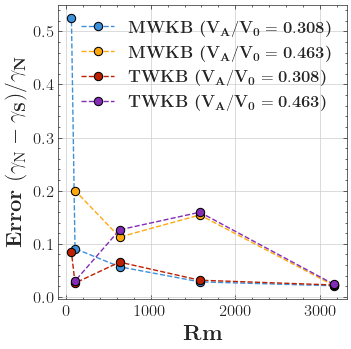

In [122]:
fig = plt.figure(figsize=(3.5,3.5))
ax = plt.subplot(111)
color_arr = ['#3F90DA', '#FFA90E', '#BD1F01', '#94A4A2', '#832DB6', '#A96B59', '#E76300', '#B9AC70', '#92DADD']
# color_arr = ['#009e73', '#0072b2', '#56b4e9', '#f0e442', '#e69f00', '#d55e00', '#cc79a7', '#7e2954']

V0 = r1*Omega0

####################################### qmagpi
ETA_ARR = [1,2,5,30,50]
Rm = r1*V0/ETA_ARR
# First VA_N_Arr[8]
tol = 5E-4
ii = np.where(np.abs(VA_h_MCI1_Bz_ETA1_divr_q2magpisq-VA_N_Arr_ETA1[8]) < tol)[0][0]
print(ii)
print(VA_N_Arr_ETA1[8])
print(VA_h_MCI1_Bz_ETA1_divr_q2magpisq[ii])
i2 = 8
di = 0
gr_temp = np.array([gr_1k1_MCI_h_Bz_ETA1_divr_q2magpisq[ii], gr_1k1_MCI_h_Bz_ETA2_divr_q2magpisq[ii], gr_1k1_MCI_h_Bz_ETA5_divr_q2magpisq[ii], gr_1k1_MCI_h_Bz_ETA30_divr_q2magpisq[ii], gr_1k1_MCI_h_Bz_ETA50_divr_q2magpisq[ii]])
GRS_bz20 = np.array([ETA1_arr[i2], ETA2_arr[i2], ETA5_arr[i2], ETA30_arr[i2-3+2*di], ETA50_arr[i2]])
error_bz20 = np.abs((GRS_bz20-gr_temp)/(GRS_bz20))
# First VA_N_Arr[9]
tol = 5E-4
i2 = 9
di = 0
ii = np.where(np.abs(VA_h_MCI1_Bz_ETA1_divr_q2magpisq-VA_N_Arr_ETA1[i2]) < tol)[0][0]
print(ii)
print(VA_N_Arr_ETA1[i2])
print(VA_h_MCI1_Bz_ETA1_divr_q2magpisq[ii])
gr_temp = np.array([gr_1k1_MCI_h_Bz_ETA1_divr_q2magpisq[ii], gr_1k1_MCI_h_Bz_ETA2_divr_q2magpisq[ii], gr_1k1_MCI_h_Bz_ETA5_divr_q2magpisq[ii], gr_1k1_MCI_h_Bz_ETA30_divr_q2magpisq[ii], gr_1k1_MCI_h_Bz_ETA50_divr_q2magpisq[ii]])
GRS_bz20 = np.array([ETA1_arr[i2], ETA2_arr[i2], ETA5_arr[i2], ETA30_arr[i2-3+2*di], ETA50_arr[i2]])
error_bz30 = np.abs((GRS_bz20-gr_temp))/(GRS_bz20)


####################################### WKB
ETA_ARR = [1,2,5,30,50]
# First VA_N_Arr[8]
tol = 5E-4
ii = np.where(np.abs(VA_h_MCI1_Bz_ETA5_divr_WKB_div4-VA_N_Arr_ETA1[8]) < tol)[0][0]
print(ii)
print(VA_N_Arr_ETA1[8])
print(VA_h_MCI1_Bz_ETA1_divr_q2magpisq[ii])
i2 = 8
di = 0
gr_temp = np.array([gr_1k1_MCI_h_Bz_ETA1_divr_WKB_div4[ii], gr_1k1_MCI_h_Bz_ETA2_divr_WKB_div4[ii], gr_1k1_MCI_h_Bz_ETA5_divr_WKB_div4[ii], gr_1k1_MCI_h_Bz_ETA30_divr_WKB_div4[ii], gr_1k1_MCI_h_Bz_ETA50_divr_WKB_div4[ii]])
GRS_bz20 = np.array([ETA1_arr[i2], ETA2_arr[i2], ETA5_arr[i2], ETA30_arr[i2-3+2*di], ETA50_arr[i2]])
error_bz20_WKB= np.abs((GRS_bz20-gr_temp)/(GRS_bz20))
# First VA_N_Arr[9]
tol = 5E-4
i2 = 9
di = 0
ii = np.where(np.abs(VA_h_MCI1_Bz_ETA1_divr_q2magpisq-VA_N_Arr_ETA1[i2]) < tol)[0][0]
print(ii)
print(ii)
print(VA_N_Arr_ETA1[i2])
print(VA_h_MCI1_Bz_ETA1_divr_q2magpisq[ii])
gr_temp = np.array([gr_1k1_MCI_h_Bz_ETA1_divr_WKB_div4[ii], gr_1k1_MCI_h_Bz_ETA2_divr_WKB_div4[ii], gr_1k1_MCI_h_Bz_ETA5_divr_WKB_div4[ii], gr_1k1_MCI_h_Bz_ETA30_divr_WKB_div4[ii], gr_1k1_MCI_h_Bz_ETA50_divr_WKB_div4[ii]])
GRS_bz20 = np.array([ETA1_arr[i2], ETA2_arr[i2], ETA5_arr[i2], ETA30_arr[i2-3+2*di], ETA50_arr[i2]])
error_bz30_WKB = np.abs((GRS_bz20-gr_temp))/(GRS_bz20)


box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend()
# plt.ylim(0,0.05)
# plt.legend()
# for j in range(0, len(ETA1_arr[8:len(VA_N_Arr_ETA1)])):
#     # First VA_N_Arr[9]
#     tol = 5E-4
#     i2 = 8 + j
#     di = 0
#     ii = np.where(np.abs(VA_h_MCI1_Bz_ETA1_divr_q2magpisq-VA_N_Arr_ETA1[i2]) < tol)[0][0]
#     print(ii)
#     print(VA_N_Arr_ETA1[i2])
#     print(VA_h_MCI1_Bz_ETA1_divr_q2magpisq[ii])
#     gr_temp = np.array([gr_1k1_MCI_h_Bz_ETA1_divr_q2magpisq[ii], gr_1k1_MCI_h_Bz_ETA2_divr_q2magpisq[ii], gr_1k1_MCI_h_Bz_ETA5_divr_q2magpisq[ii], gr_1k1_MCI_h_Bz_ETA30_divr_q2magpisq[ii], gr_1k1_MCI_h_Bz_ETA50_divr_q2magpisq[ii]])
#     GRS_bz20 = np.array([ETA1_arr[i2], ETA2_arr[i2], ETA5_arr[i2], ETA30_arr[i2-3+2*di], ETA50_arr[i2]])
#     error_bz20 = np.abs((GRS_bz20-gr_temp)/(GRS_bz20))

plt.plot(Rm, error_bz20, label = r'\textbf{MWKB ($\mathbf{V_A/V_0 = 0.308}$)}', color = color_arr[0], marker = 'o', linestyle = '--', markeredgecolor='black', markeredgewidth = 0.75) 
plt.plot(Rm, error_bz30, label = r'\textbf{MWKB ($\mathbf{V_A/V_0 = 0.463}$)}', color = color_arr[1], marker = 'o', linestyle = '--', markeredgecolor='black', markeredgewidth = 0.75) 
plt.plot(Rm, error_bz20_WKB, label = r'\textbf{TWKB ($\mathbf{V_A/V_0 = 0.308}$)}', color = color_arr[2], marker = 'o', linestyle = '--', markeredgecolor='black', markeredgewidth = 0.75) 
plt.plot(Rm, error_bz30_WKB, label = r'\textbf{TWKB ($\mathbf{V_A/V_0 = 0.463}$)}', color = color_arr[4], marker = 'o', linestyle = '--', markeredgecolor='black', markeredgewidth = 0.75) 
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.legend(fontsize = 12)
plt.ylabel(r'\textbf{Error} ($\mathbf{\gamma_{\mathrm{N}}-\gamma_{S})/\gamma_N}$', fontsize = 16)
plt.xlabel(r'\textbf{Rm}', fontsize = 16)
# plt.savefig('Shooting-NIMROD-comp/GRvsAlfvenSpeed-NIMROD-Bz-divrpi.png', bbox_inches='tight')
# plt.savefig('Shooting-NIMROD-comp/Shooting_Error_Bz.png', bbox_inches='tight', dpi = 500)
# plt.savefig('Shooting-NIMROD-comp/Shooting_Error_Bz.svg', bbox_inches='tight', format = 'svg')
plt.savefig('Shooting-NIMROD-comp/Shooting_Error_Bz.pdf', bbox_inches='tight', dpi = 500)

plt.show()
plt.close()